In [1]:
import os
import sys
from pathlib import Path

from IPython.display import display, HTML, Markdown
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import mannwhitneyu

# Project level imports
from larval_gonad.notebook import Nb
from larval_gonad.plotting import figure_element
from larval_gonad.scRNAseq import Seurat, norm_data
from larval_gonad.x_to_a import (CHROMS_CHR, MAJOR_ARMS_CHR, agg_all, x_to_a, 
                                 mann_whitney_by_arm, fe_chrom_boxplot, commonly_expressed,
                                )
from larval_gonad.scRNAseq import seurat_or_data

In [2]:
# Setup notebook
nbconfig = Nb.setup_notebook(seurat_dir='../scrnaseq-wf/data/scrnaseq_combine_force')

last updated: 2018-06-15 
Git hash: b29a83a9e5e2f65968f734d08ad85c1a313099da


## All Genes

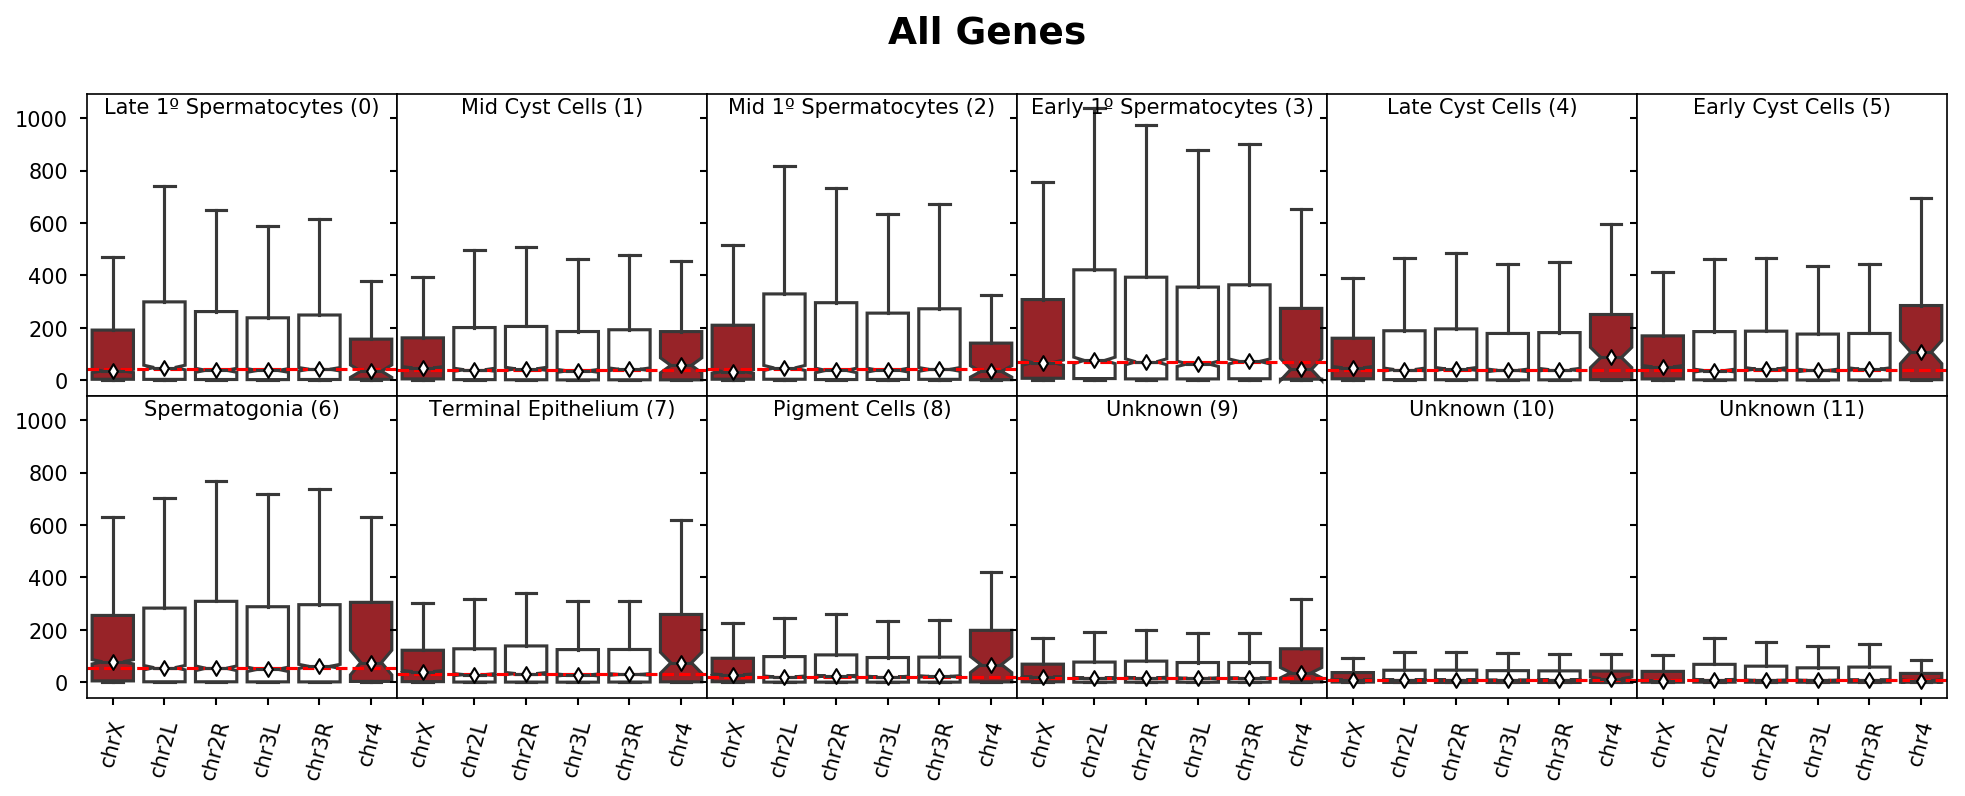

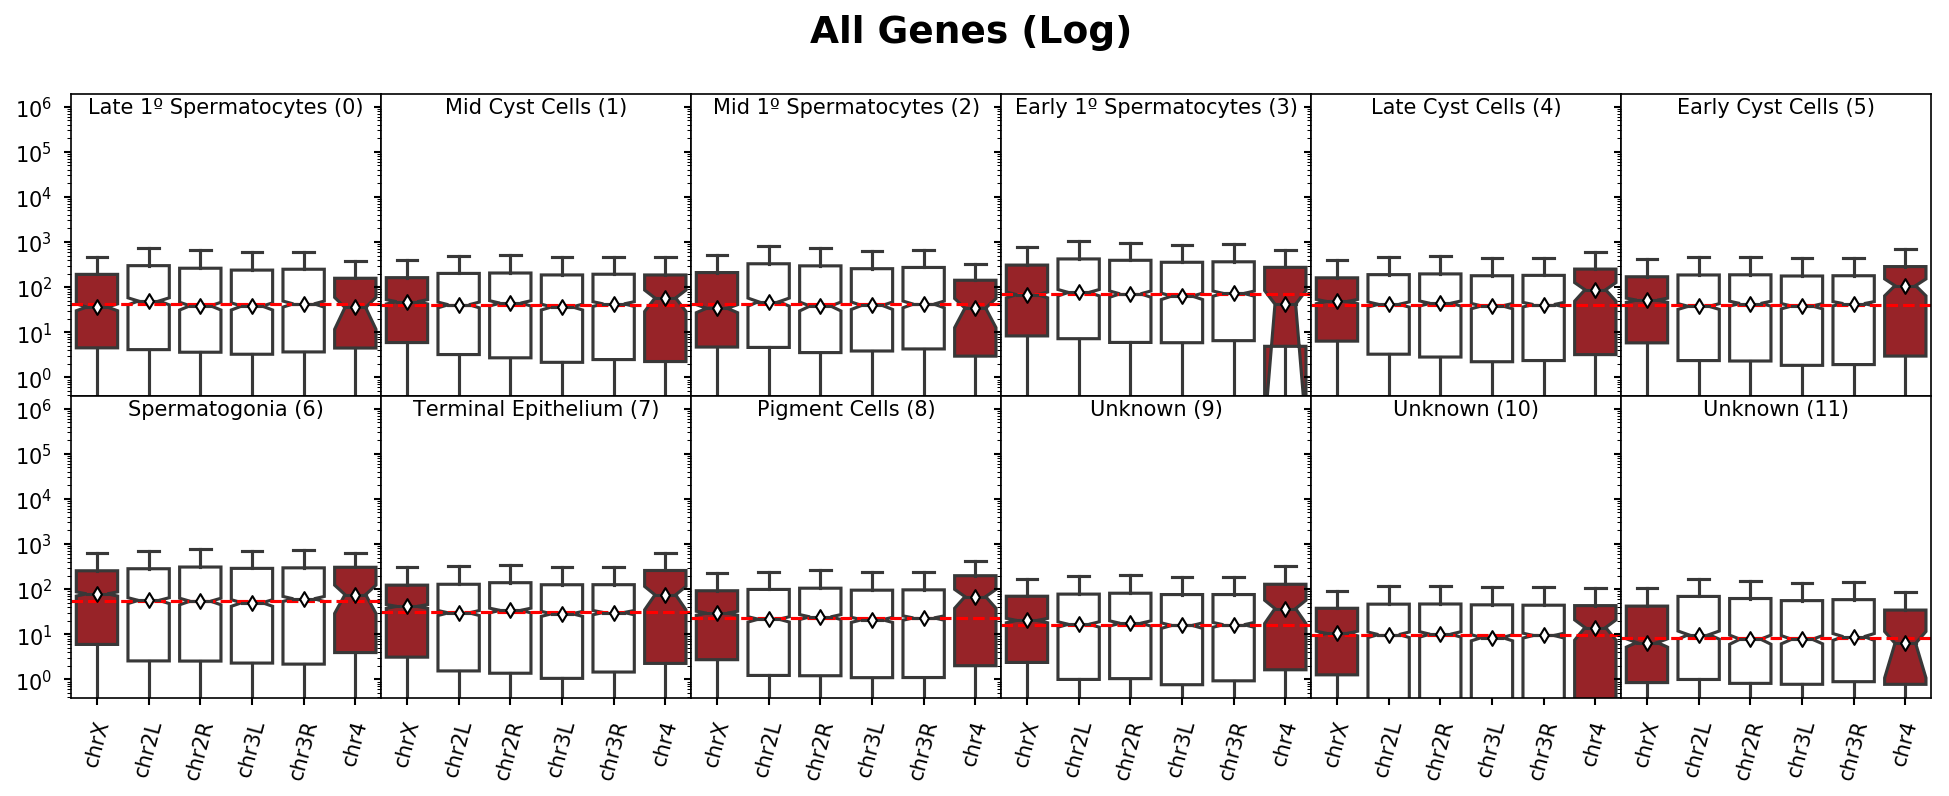

In [3]:
fig, axes = plt.subplots(2, 6, figsize=plt.figaspect(1/3), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
figLog, axesLog = plt.subplots(2, 6, figsize=plt.figaspect(1/3), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
_xtoa = []
_pvals = []
_pvalsSample = []
for c, ax, axLog in zip(range(12), axes.flatten(), axesLog.flatten()):
    cnts = agg_all('norm', seurat_dir=nbconfig.seurat_dir, cluster=c)
    data = cnts.to_frame().join(nbconfig.fbgn2chrom)
                        
    # Regular boxplot
    ax = fe_chrom_boxplot(c, data=data, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.text(0.5, .99, nbconfig.CLUSTER_ANNOT[c], ha='center', va='top', transform=ax.transAxes, fontsize=10)
                        
    # Log boxplot
    axLog = fe_chrom_boxplot(c, data=data, ax=axLog)
    axLog.set_yscale('log')
    axLog.set_xlabel('')
    axLog.set_ylabel('')
    axLog.text(0.5, .99, nbconfig.CLUSTER_ANNOT[c], ha='center', va='top', transform=axLog.transAxes, fontsize=10)
                        
    # Chrom to A ratios
    _df = x_to_a(c, data=data)
    _df.columns = [c]
    _xtoa.append(_df)
 
    # P-values for Chrom : A comparison
    _pvals.append(mann_whitney_by_arm(c, data=data))
    _pvalsSample.append(mann_whitney_by_arm(c, data=data, sample=True))
                        
for ax in axes[1, :]:
    for l in ax.get_xticklabels():
        l.set_rotation(75)
        
fig.suptitle('All Genes')
                        
for axLog in axesLog[1, :]:
    for l in axLog.get_xticklabels():
        l.set_rotation(75)
                        
figLog.suptitle('All Genes (Log)')

df_xtoa = pd.concat(_xtoa, axis=1)
df_pvals = pd.concat(_pvals)
df_pvalsSample = pd.concat(_pvalsSample)

In [4]:
df_xtoa

0         1         2         3         4         5         6   \
chrom                                                                         
chrX   0.862622  1.162035  0.811616  0.960711  1.168973  1.263886  1.409095   
chr2L  1.171966  0.994420  1.134482  1.077497  1.010026  0.923501  1.008577   
chr2R  0.919907  1.078545  0.911268  1.002656  1.062474  1.065056  0.967280   
chr3L  0.904649  0.891700  0.938979  0.893377  0.930978  0.936187  0.896356   
chr3R  1.013121  1.037584  1.001649  1.023237  0.999313  1.058876  1.095130   
chr4   0.842567  1.402674  0.818363  0.592302  2.122269  2.649561  1.357780   

             7         8         9         10        11  
chrom                                                    
chrX   1.355783  1.305682  1.231848  1.111220  0.785242  
chr2L  0.974505  0.958979  1.011660  1.045591  1.171443  
chr2R  1.106316  1.079610  1.065633  1.065968  0.931840  
chr3L  0.931796  0.934722  0.954651  0.899199  0.925791  
chr3R  0.991949  1.024234  0.990405  0.998758  1.058238  
chr4   2.441758  3.032488  2.251534  1.499368  0.753319

In [5]:
df_pvals.loc[[6, 3, 2, 0], ['chrX', 'chr4', 'chr2L']]

chrX      chr4     chr2L
cluster                              
6        0.998841  0.841730  0.512646
3        0.072126  0.156652  0.947662
2        0.000699  0.061560  0.985702
0        0.023244  0.117275  0.972880

In [6]:
df_pvalsSample.loc[[6, 3, 2, 0], ['chrX', 'chr4', 'chr2L']]

chrX      chr4     chr2L
cluster                              
6        0.971933  0.557068  0.334480
3        0.082662  0.055205  0.813033
2        0.006091  0.026657  0.936874
0        0.059550  0.038095  0.917469

Text(0.5,0.98,'All Genes (Log)')

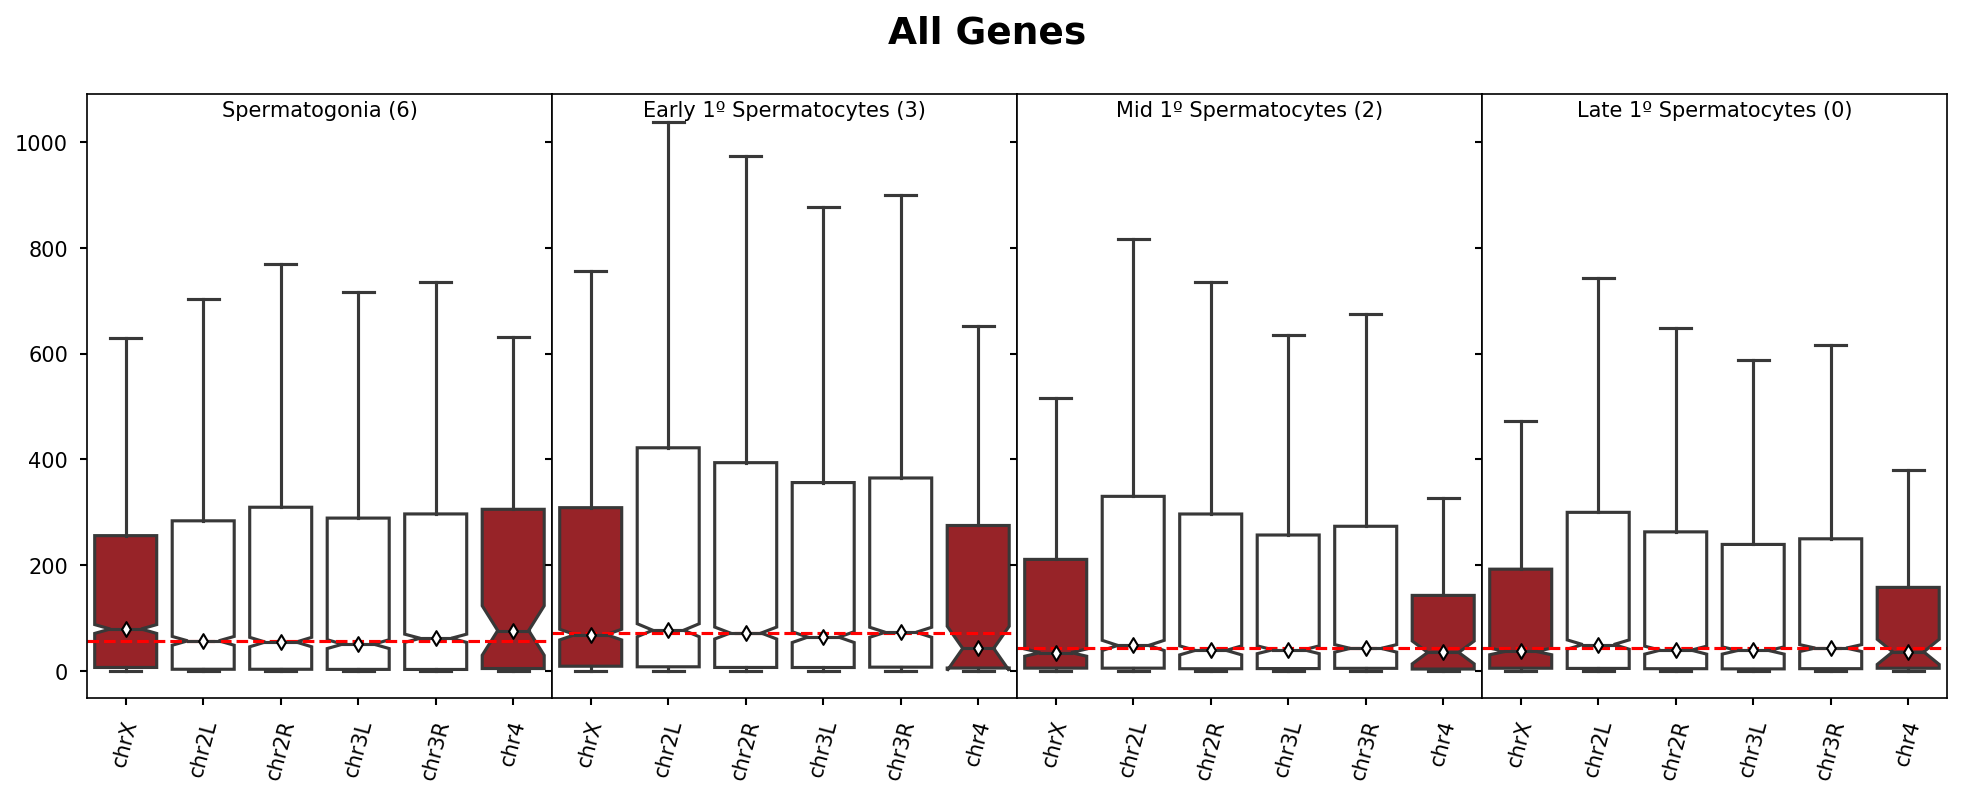

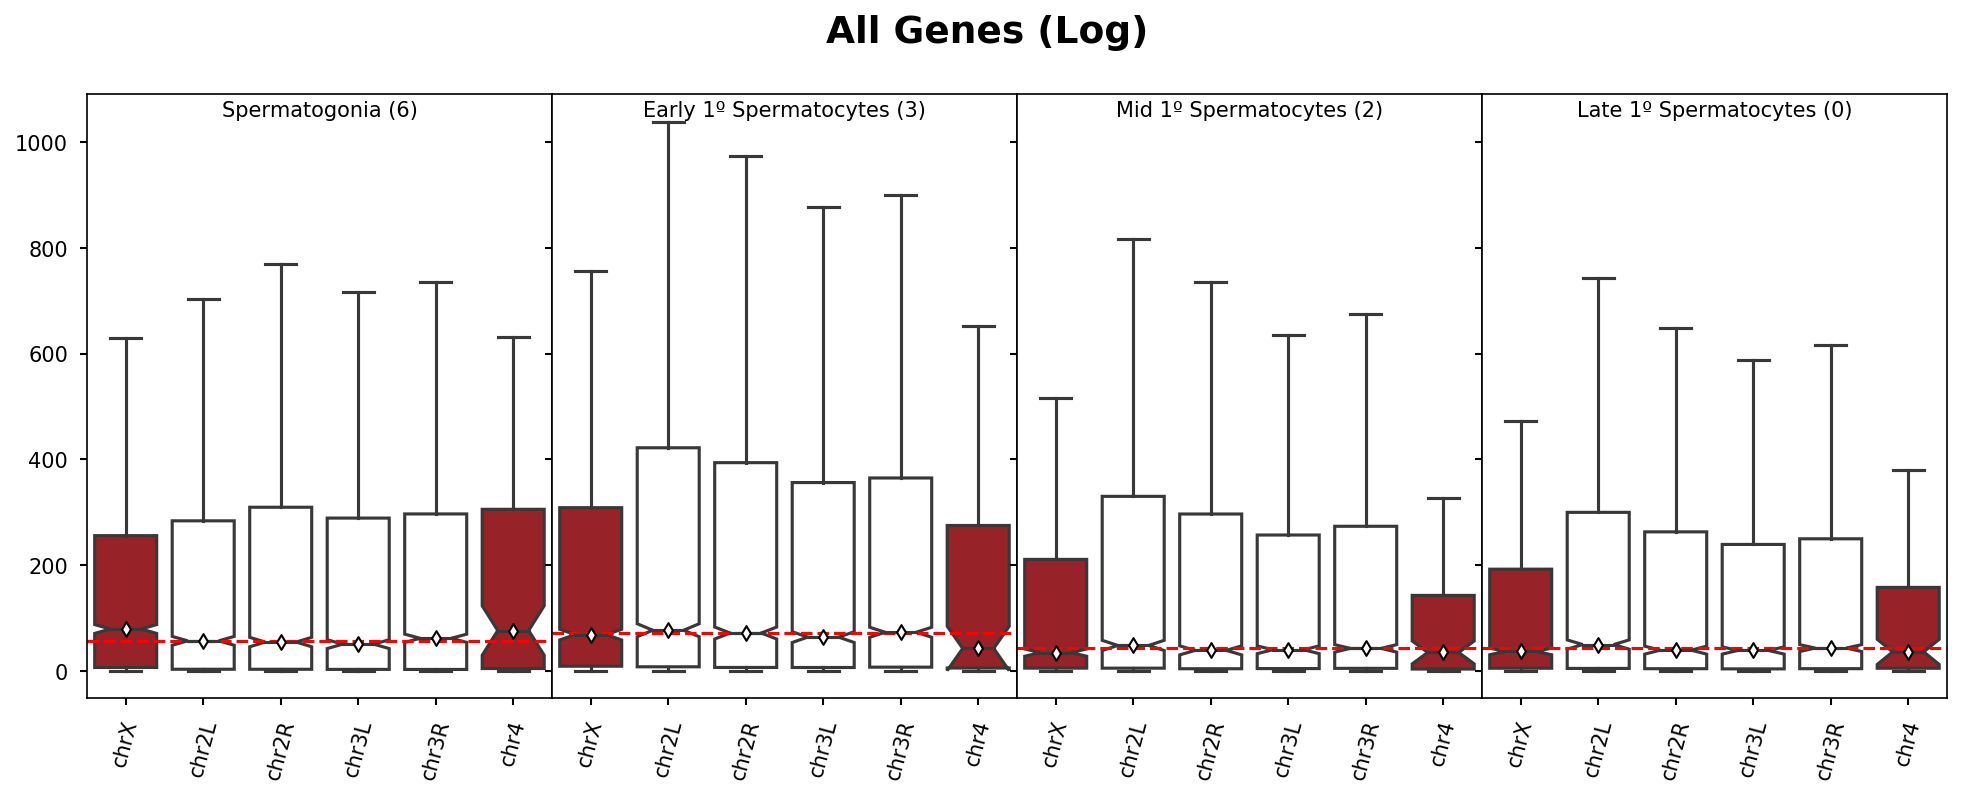

In [7]:
fig, axes = plt.subplots(1, 4, figsize=plt.figaspect(1/3), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
figLog, axesLog = plt.subplots(1, 4, figsize=plt.figaspect(1/3), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
for c, ax, axLog in zip([6, 3, 2, 0], axes.flatten(), axesLog.flatten()):
    cnts = agg_all('norm', seurat_dir=nbconfig.seurat_dir, cluster=c)
    data = cnts.to_frame().join(nbconfig.fbgn2chrom)
                        
    # Regular boxplot
    ax = fe_chrom_boxplot(c, data=data, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.text(0.5, .99, nbconfig.CLUSTER_ANNOT[c], ha='center', va='top', transform=ax.transAxes, fontsize=10)
                        
    # Log boxplot
    axLog = fe_chrom_boxplot(c, data=data, ax=axLog)
    axLog.set_xlabel('')
    axLog.set_ylabel('')
    axLog.text(0.5, .99, nbconfig.CLUSTER_ANNOT[c], ha='center', va='top', transform=axLog.transAxes, fontsize=10)
    
for ax in axes:
    for l in ax.get_xticklabels():
        l.set_rotation(75)
                        
fig.suptitle('All Genes')

for axLog in axesLog:
    for l in axLog.get_xticklabels():
        l.set_rotation(75)

figLog.suptitle('All Genes (Log)')

## Commonly Expressed

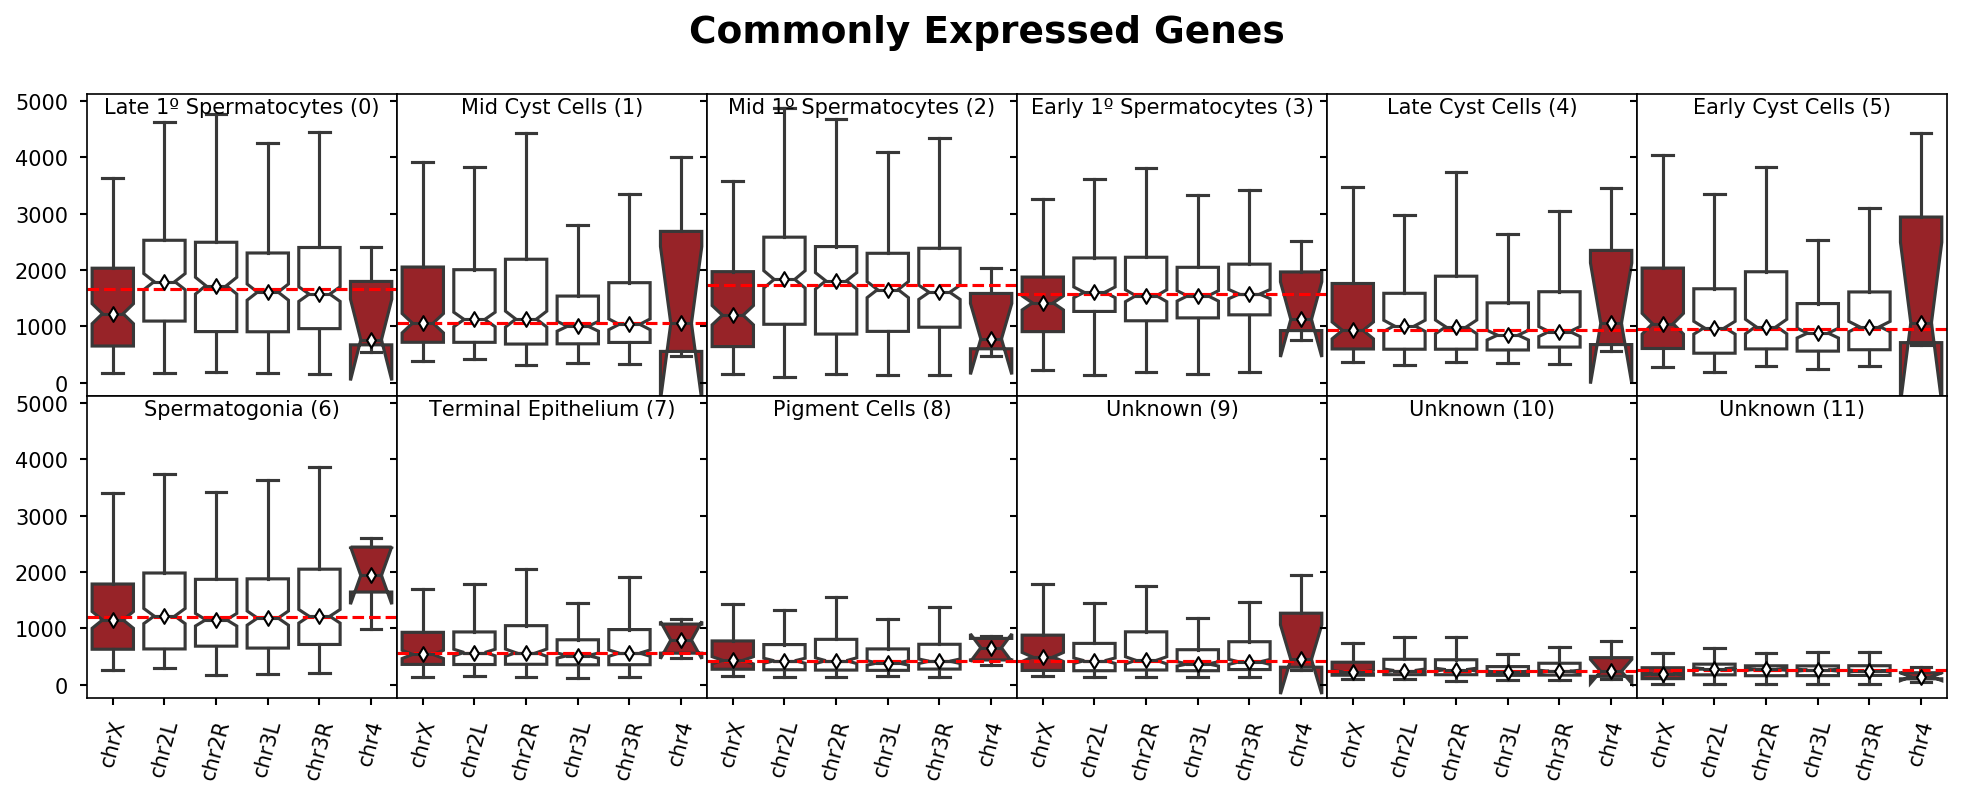

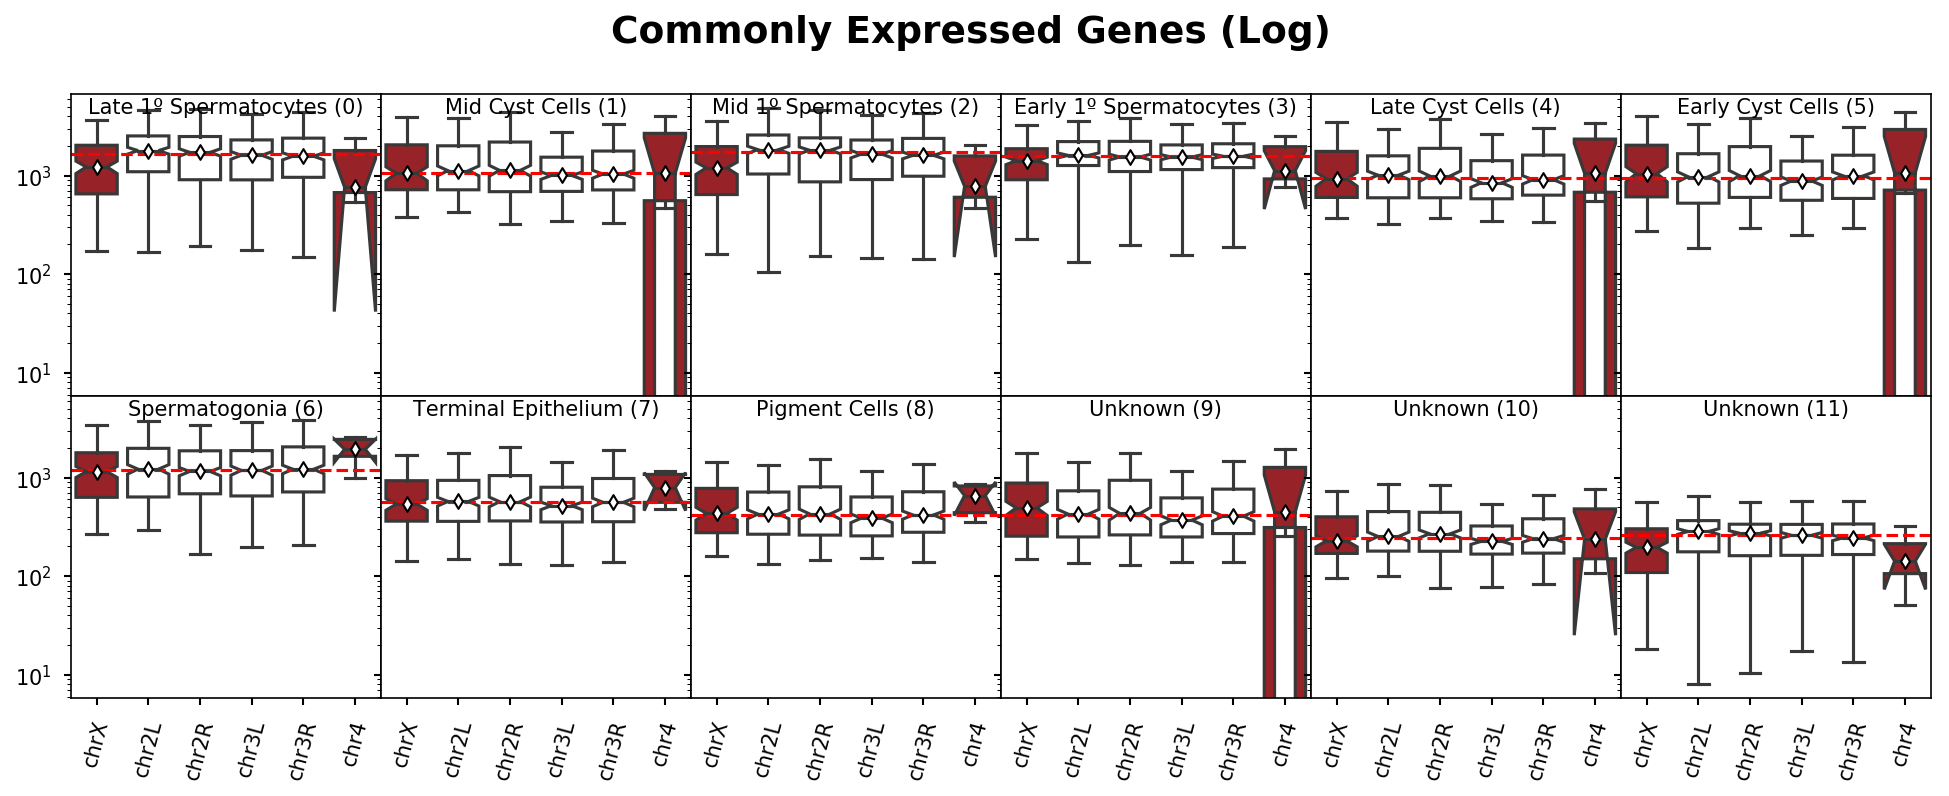

In [8]:
# Create list of commonly expressed genes
target_genes = commonly_expressed(seurat_dir=nbconfig.seurat_dir)

fig, axes = plt.subplots(2, 6, figsize=plt.figaspect(1/3), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
figLog, axesLog = plt.subplots(2, 6, figsize=plt.figaspect(1/3), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
_xtoa = []
_pvals = []
_pvalsSample = []
for c, ax, axLog in zip(range(12), axes.flatten(), axesLog.flatten()):
    cnts = agg_all('norm', seurat_dir=nbconfig.seurat_dir, cluster=c)
    data = cnts.to_frame().join(nbconfig.fbgn2chrom).loc[target_genes]
                        
    # Regular boxplot
    ax = fe_chrom_boxplot(c, data=data, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.text(0.5, .99, nbconfig.CLUSTER_ANNOT[c], ha='center', va='top', transform=ax.transAxes, fontsize=10)
                        
    # Log boxplot
    axLog = fe_chrom_boxplot(c, data=data, ax=axLog)
    axLog.set_yscale('log')
    axLog.set_xlabel('')
    axLog.set_ylabel('')
    axLog.text(0.5, .99, nbconfig.CLUSTER_ANNOT[c], ha='center', va='top', transform=axLog.transAxes, fontsize=10)
                        
    # Chrom to A ratios
    _df = x_to_a(c, data=data)
    _df.columns = [c]
    _xtoa.append(_df)
 
    # P-values for Chrom : A comparison
    _pvals.append(mann_whitney_by_arm(c, data=data))
    _pvalsSample.append(mann_whitney_by_arm(c, data=data, sample=True))
                        
for ax in axes[1, :]:
    for l in ax.get_xticklabels():
        l.set_rotation(75)
        
fig.suptitle('Commonly Expressed Genes')
                        
for axLog in axesLog[1, :]:
    for l in axLog.get_xticklabels():
        l.set_rotation(75)
                        
figLog.suptitle('Commonly Expressed Genes (Log)')

df_xtoa = pd.concat(_xtoa, axis=1)
df_pvals = pd.concat(_pvals)
df_pvalsSample = pd.concat(_pvalsSample)

In [9]:
df_xtoa

0         1         2         3         4         5         6   \
chrom                                                                         
chrX   0.737331  0.994053  0.690631  0.904555  0.993597  1.098622  0.959964   
chr2L  1.079565  1.056577  1.056890  1.024681  1.080312  1.024108  1.017361   
chr2R  1.036614  1.062651  1.041824  0.986026  1.060522  1.046178  0.962788   
chr3L  0.967756  0.942978  0.952201  0.984189  0.903583  0.924075  0.987214   
chr3R  0.946590  0.975266  0.924880  1.004380  0.971905  1.044827  1.013925   
chr4   0.458727  0.991193  0.448209  0.717607  1.128420  1.116301  1.618686   

             7         8         9         10        11  
chrom                                                    
chrX   0.959143  1.040113  1.180873  0.943909  0.747187  
chr2L  1.018907  1.020233  1.022693  1.048122  1.082104  
chr2R  1.013446  1.023860  1.039185  1.115812  1.038639  
chr3L  0.921980  0.928169  0.886656  0.935409  0.990685  
chr3R  0.999863  1.000000  0.972484  0.994447  0.932731  
chr4   1.411172  1.572058  1.075488  0.985049  0.542262

In [10]:
df_pvals.loc[[6, 3, 2, 0], ['chrX', 'chr4', 'chr2L']]

chrX      chr4     chr2L
cluster                              
6        0.208308  0.968762  0.403377
3        0.000438  0.152347  0.866745
2        0.000004  0.040714  0.904383
0        0.000047  0.079821  0.912070

In [11]:
df_pvalsSample.loc[[6, 3, 2, 0], ['chrX', 'chr4', 'chr2L']]

chrX      chr4     chr2L
cluster                              
6        0.514479  0.851023  0.545643
3        0.052168  0.189239  0.674049
2        0.004768  0.114883  0.760336
0        0.018949  0.189239  0.758190

Text(0.5,0.98,'Commonly Expressed Genes (Log)')

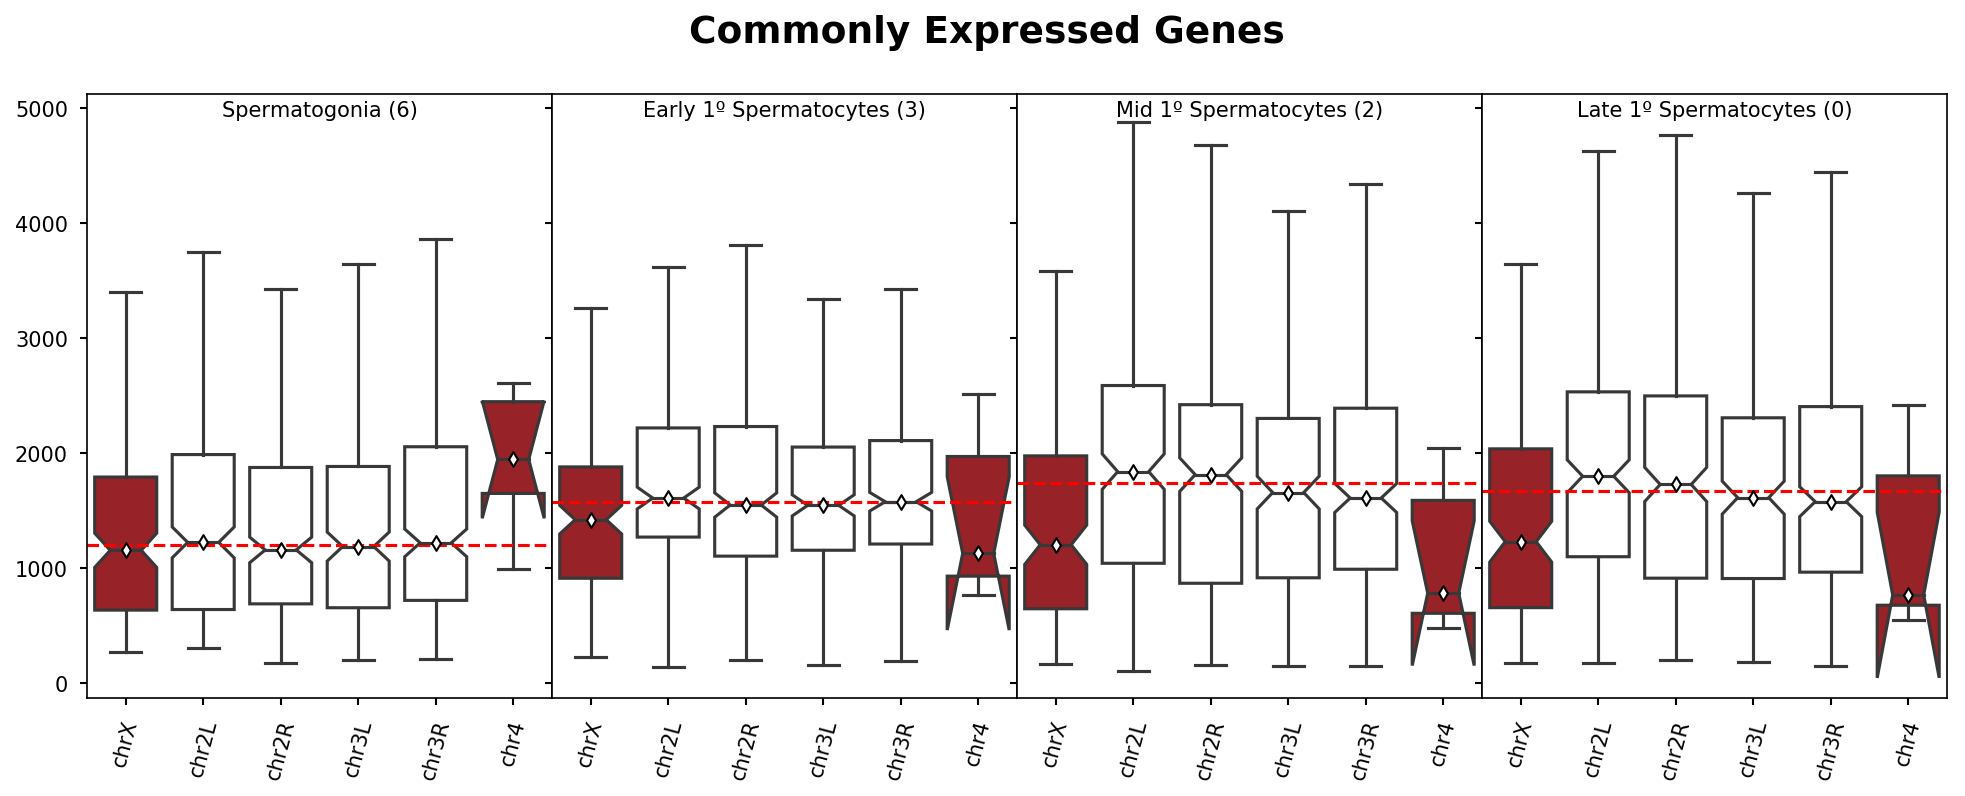

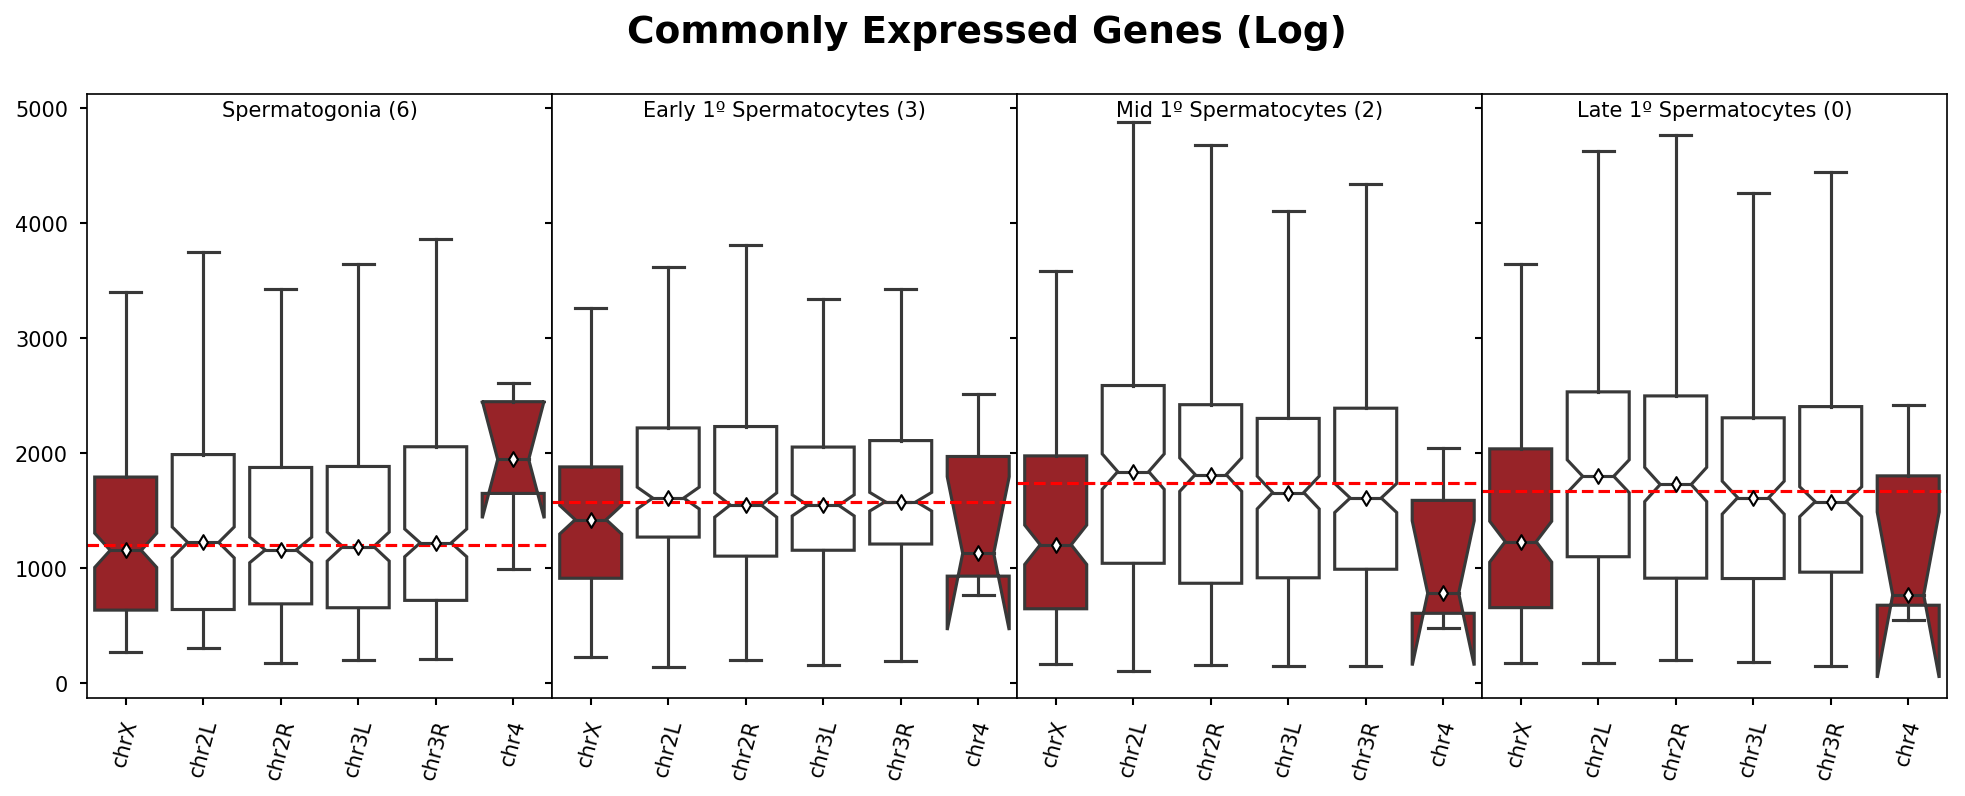

In [12]:
fig, axes = plt.subplots(1, 4, figsize=plt.figaspect(1/3), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
figLog, axesLog = plt.subplots(1, 4, figsize=plt.figaspect(1/3), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
for c, ax, axLog in zip([6, 3, 2, 0], axes.flatten(), axesLog.flatten()):
    cnts = agg_all('norm', seurat_dir=nbconfig.seurat_dir, cluster=c)
    data = cnts.to_frame().join(nbconfig.fbgn2chrom).loc[target_genes]
                        
    # Regular boxplot
    ax = fe_chrom_boxplot(c, data=data, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.text(0.5, .99, nbconfig.CLUSTER_ANNOT[c], ha='center', va='top', transform=ax.transAxes, fontsize=10)
                        
    # Log boxplot
    axLog = fe_chrom_boxplot(c, data=data, ax=axLog)
    axLog.set_xlabel('')
    axLog.set_ylabel('')
    axLog.text(0.5, .99, nbconfig.CLUSTER_ANNOT[c], ha='center', va='top', transform=axLog.transAxes, fontsize=10)
    
for ax in axes:
    for l in ax.get_xticklabels():
        l.set_rotation(75)
                        
fig.suptitle('Commonly Expressed Genes')

for axLog in axesLog:
    for l in axLog.get_xticklabels():
        l.set_rotation(75)

figLog.suptitle('Commonly Expressed Genes (Log)')

## Tau Haiwang

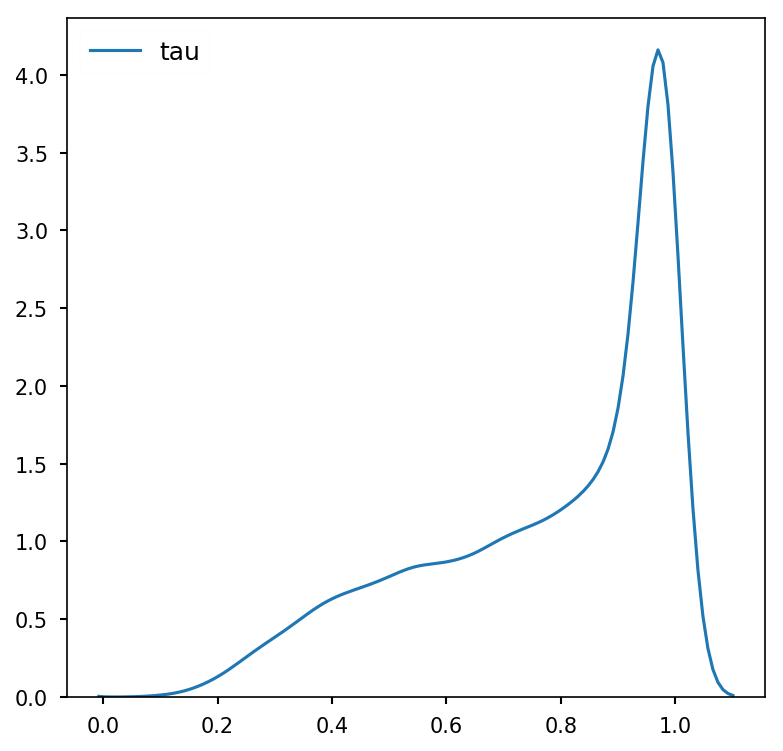

In [13]:
htau = pd.read_csv('../output/2018-02-05_tau_haiwang_male_tau.tsv', sep='\t', index_col=0)
sns.kdeplot(htau.tau.dropna())

### 0.4

1259


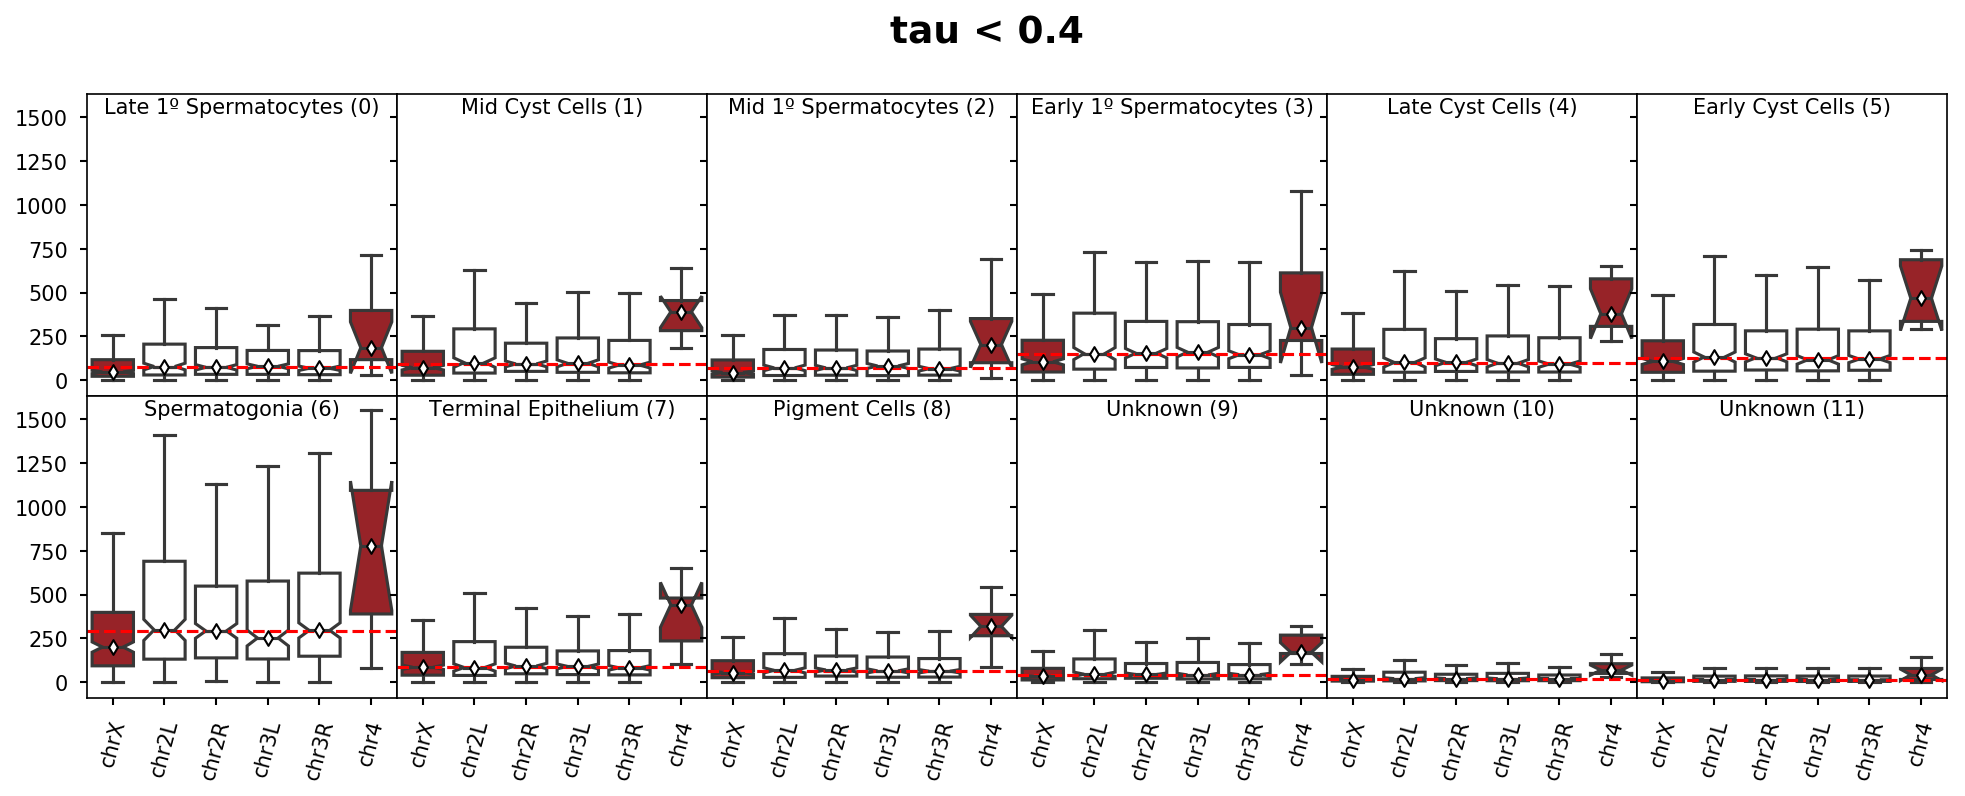

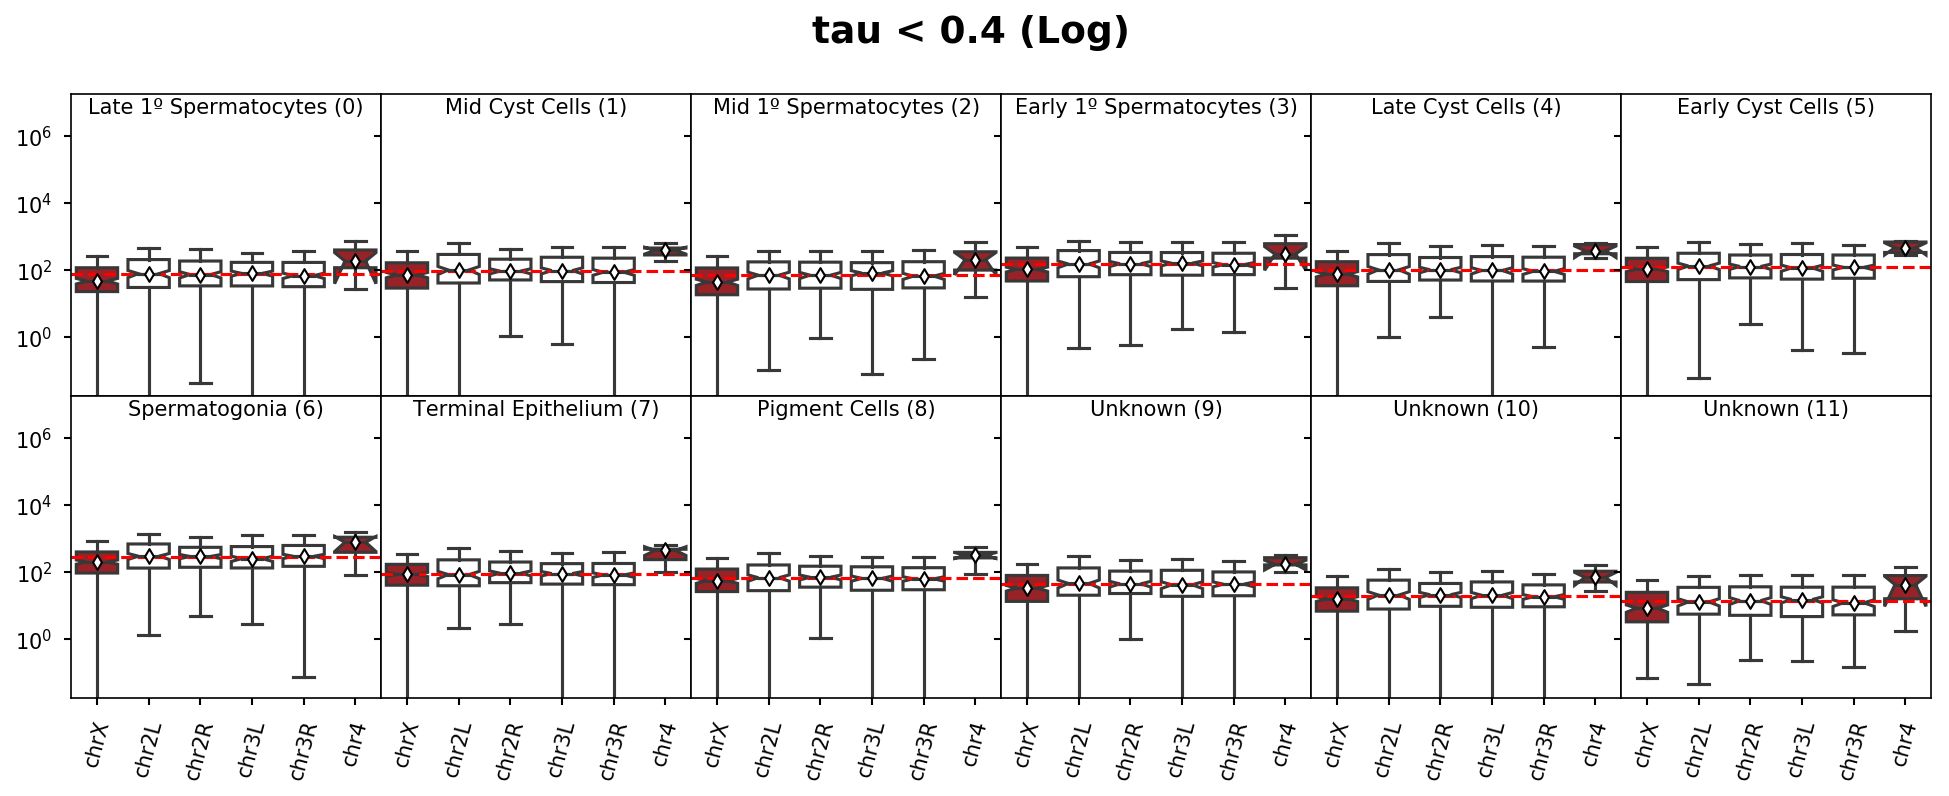

In [14]:
htau = pd.read_csv('../output/2018-02-05_tau_haiwang_male_tau.tsv', sep='\t', index_col=0)
tau_genes = htau[(htau.tau < .4)].index.tolist()
norm = norm_data(nbconfig.seurat_dir)
tau_targets = norm.index[norm.index.isin(tau_genes)].tolist()

print(len(tau_targets))

fig, axes = plt.subplots(2, 6, figsize=plt.figaspect(1/3), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
figLog, axesLog = plt.subplots(2, 6, figsize=plt.figaspect(1/3), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
_xtoa = []
_pvals = []
_pvalsSample = []
for c, ax, axLog in zip(range(12), axes.flatten(), axesLog.flatten()):
    cnts = agg_all('norm', seurat_dir=nbconfig.seurat_dir, cluster=c)
    data = cnts.to_frame().join(nbconfig.fbgn2chrom).loc[tau_targets]
                        
    # Regular boxplot
    ax = fe_chrom_boxplot(c, data=data, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.text(0.5, .99, nbconfig.CLUSTER_ANNOT[c], ha='center', va='top', transform=ax.transAxes, fontsize=10)
                        
    # Log boxplot
    axLog = fe_chrom_boxplot(c, data=data, ax=axLog)
    axLog.set_yscale('log')
    axLog.set_xlabel('')
    axLog.set_ylabel('')
    axLog.text(0.5, .99, nbconfig.CLUSTER_ANNOT[c], ha='center', va='top', transform=axLog.transAxes, fontsize=10)
                        
    # Chrom to A ratios
    _df = x_to_a(c, data=data)
    _df.columns = [c]
    _xtoa.append(_df)
 
    # P-values for Chrom : A comparison
    _pvals.append(mann_whitney_by_arm(c, data=data))
    _pvalsSample.append(mann_whitney_by_arm(c, data=data, sample=True))
                        
for ax in axes[1, :]:
    for l in ax.get_xticklabels():
        l.set_rotation(75)
        
fig.suptitle('tau < 0.4')
                        
for axLog in axesLog[1, :]:
    for l in axLog.get_xticklabels():
        l.set_rotation(75)
                        
figLog.suptitle('tau < 0.4 (Log)')

df_xtoa = pd.concat(_xtoa, axis=1)
df_pvals = pd.concat(_pvals)
df_pvalsSample = pd.concat(_pvalsSample)

In [15]:
df_xtoa

0         1         2         3         4         5         6   \
chrom                                                                         
chrX   0.638002  0.770866  0.625577  0.691740  0.780603  0.854467  0.692536   
chr2L  1.054916  1.080416  1.002427  1.000659  1.043498  1.054736  1.030086   
chr2R  0.993589  0.999024  1.002391  1.016115  1.047967  1.018211  1.010050   
chr3L  1.072195  1.035883  1.158412  1.055503  0.997574  0.925641  0.871015   
chr3R  0.922042  0.928567  0.939346  0.957066  0.945117  0.962582  1.020518   
chr4   2.502553  4.171058  2.890422  1.975859  3.887050  3.719282  2.684267   

             7         8         9         10        11  
chrom                                                    
chrX   0.967016  0.838464  0.759296  0.791622  0.601873  
chr2L  0.951272  1.030109  1.039714  1.034810  0.925302  
chr2R  1.047609  1.062377  1.007752  1.057201  1.007263  
chr3L  1.020566  0.983385  0.948662  1.019663  1.087286  
chr3R  0.928446  0.953828  0.988888  0.918205  0.870582  
chr4   4.981816  4.825218  3.875273  3.462396  3.028766

In [16]:
df_pvals.loc[[6, 3, 2, 0], ['chrX', 'chr4', 'chr2L']]

chrX      chr4     chr2L
cluster                                  
6        6.654590e-07  0.975083  0.697763
3        2.198402e-06  0.962752  0.484189
2        5.880602e-06  0.969429  0.462310
0        3.309580e-06  0.984488  0.575559

In [17]:
df_pvalsSample.loc[[6, 3, 2, 0], ['chrX', 'chr4', 'chr2L']]

chrX      chr4     chr2L
cluster                              
6        0.000006  0.891813  0.447093
3        0.000007  0.933340  0.217476
2        0.000008  0.933340  0.196569
0        0.000004  0.961306  0.235113

Text(0.5,0.98,'tau < 0.4 (Log)')

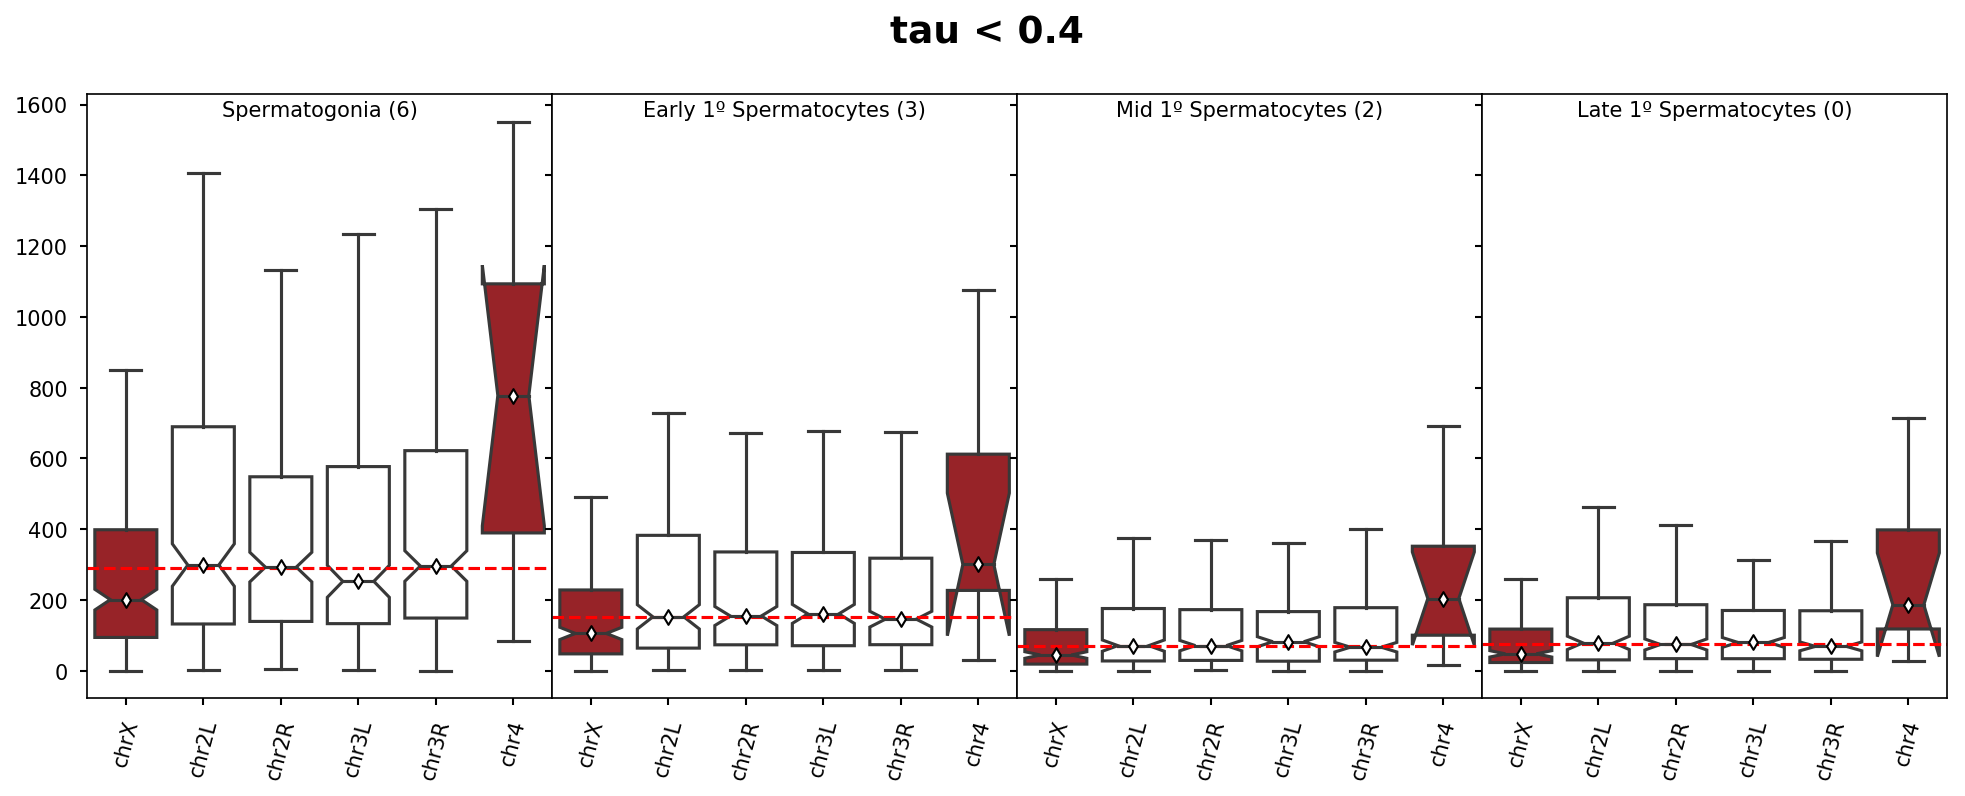

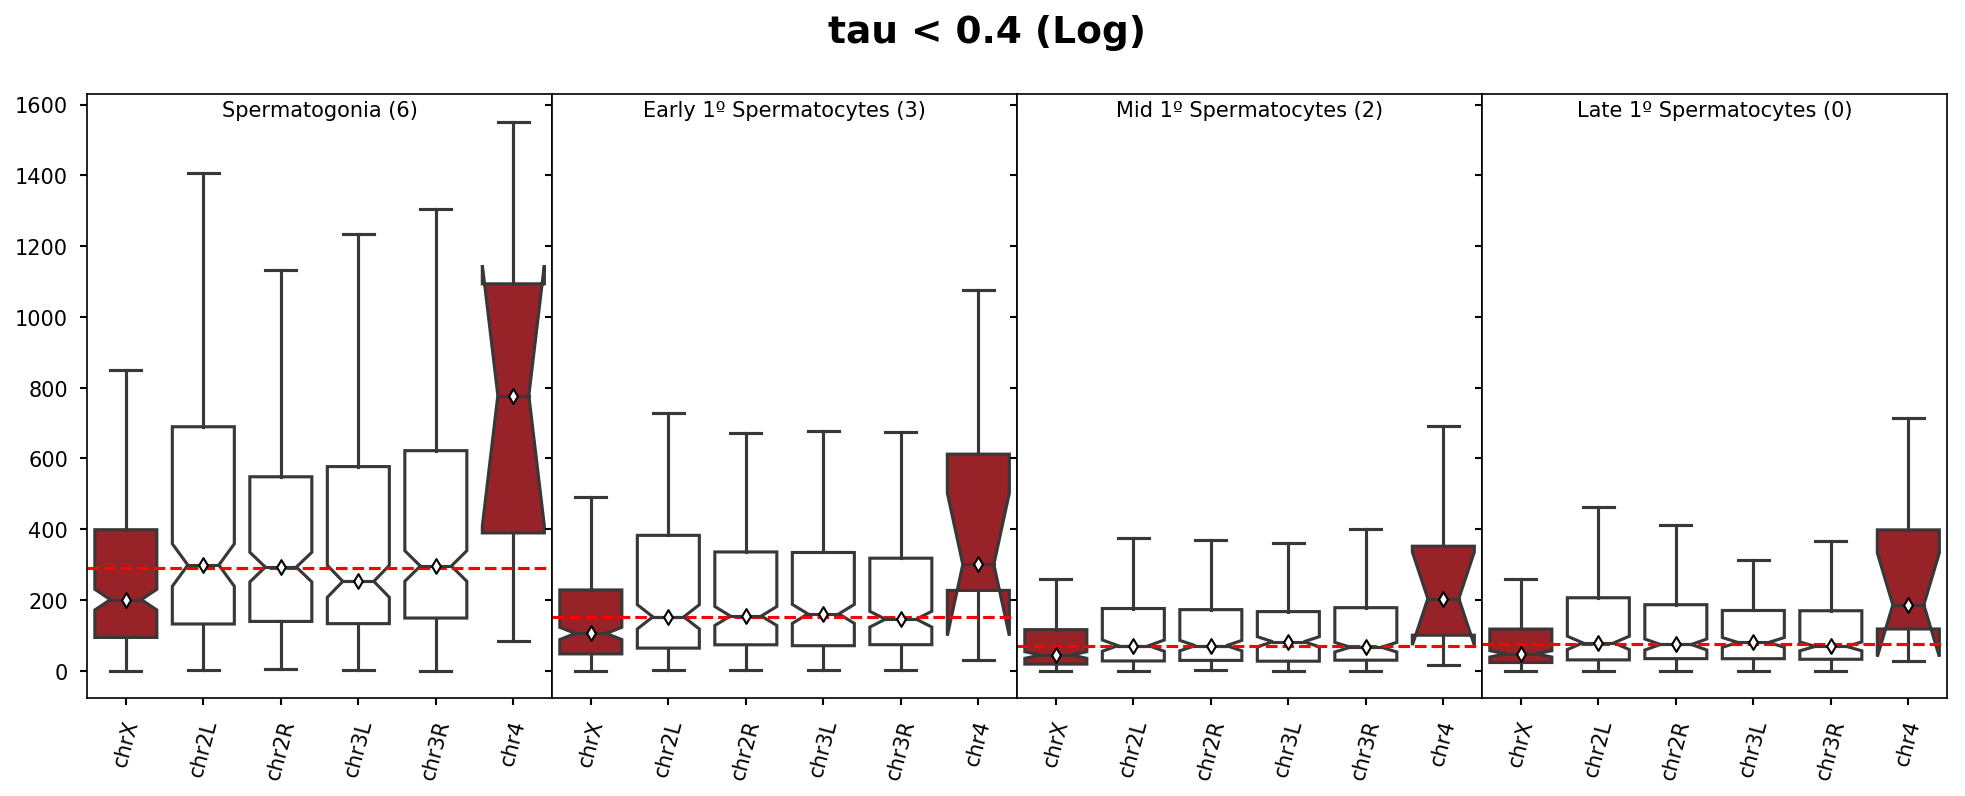

In [18]:
fig, axes = plt.subplots(1, 4, figsize=plt.figaspect(1/3), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
figLog, axesLog = plt.subplots(1, 4, figsize=plt.figaspect(1/3), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
for c, ax, axLog in zip([6, 3, 2, 0], axes.flatten(), axesLog.flatten()):
    cnts = agg_all('norm', seurat_dir=nbconfig.seurat_dir, cluster=c)
    data = cnts.to_frame().join(nbconfig.fbgn2chrom).loc[tau_targets]
                        
    # Regular boxplot
    ax = fe_chrom_boxplot(c, data=data, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.text(0.5, .99, nbconfig.CLUSTER_ANNOT[c], ha='center', va='top', transform=ax.transAxes, fontsize=10)
                        
    # Log boxplot
    axLog = fe_chrom_boxplot(c, data=data, ax=axLog)
    axLog.set_xlabel('')
    axLog.set_ylabel('')
    axLog.text(0.5, .99, nbconfig.CLUSTER_ANNOT[c], ha='center', va='top', transform=axLog.transAxes, fontsize=10)
    
for ax in axes:
    for l in ax.get_xticklabels():
        l.set_rotation(75)
                        
fig.suptitle('tau < 0.4')

for axLog in axesLog:
    for l in axLog.get_xticklabels():
        l.set_rotation(75)

figLog.suptitle('tau < 0.4 (Log)')

### 0.6

3584


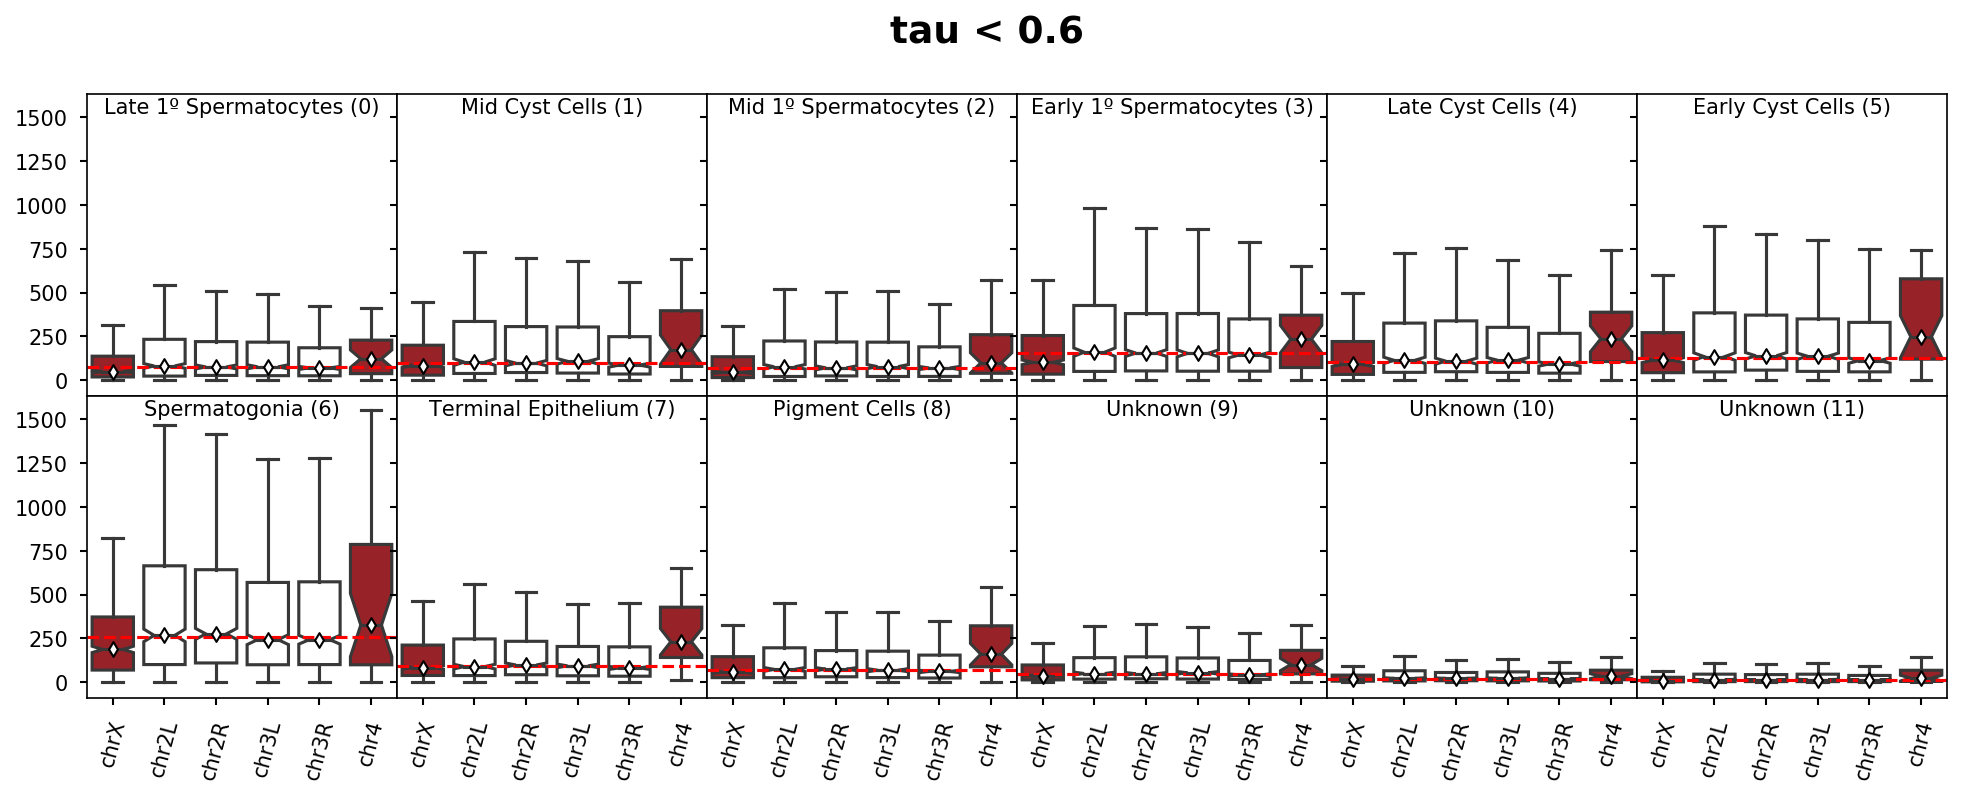

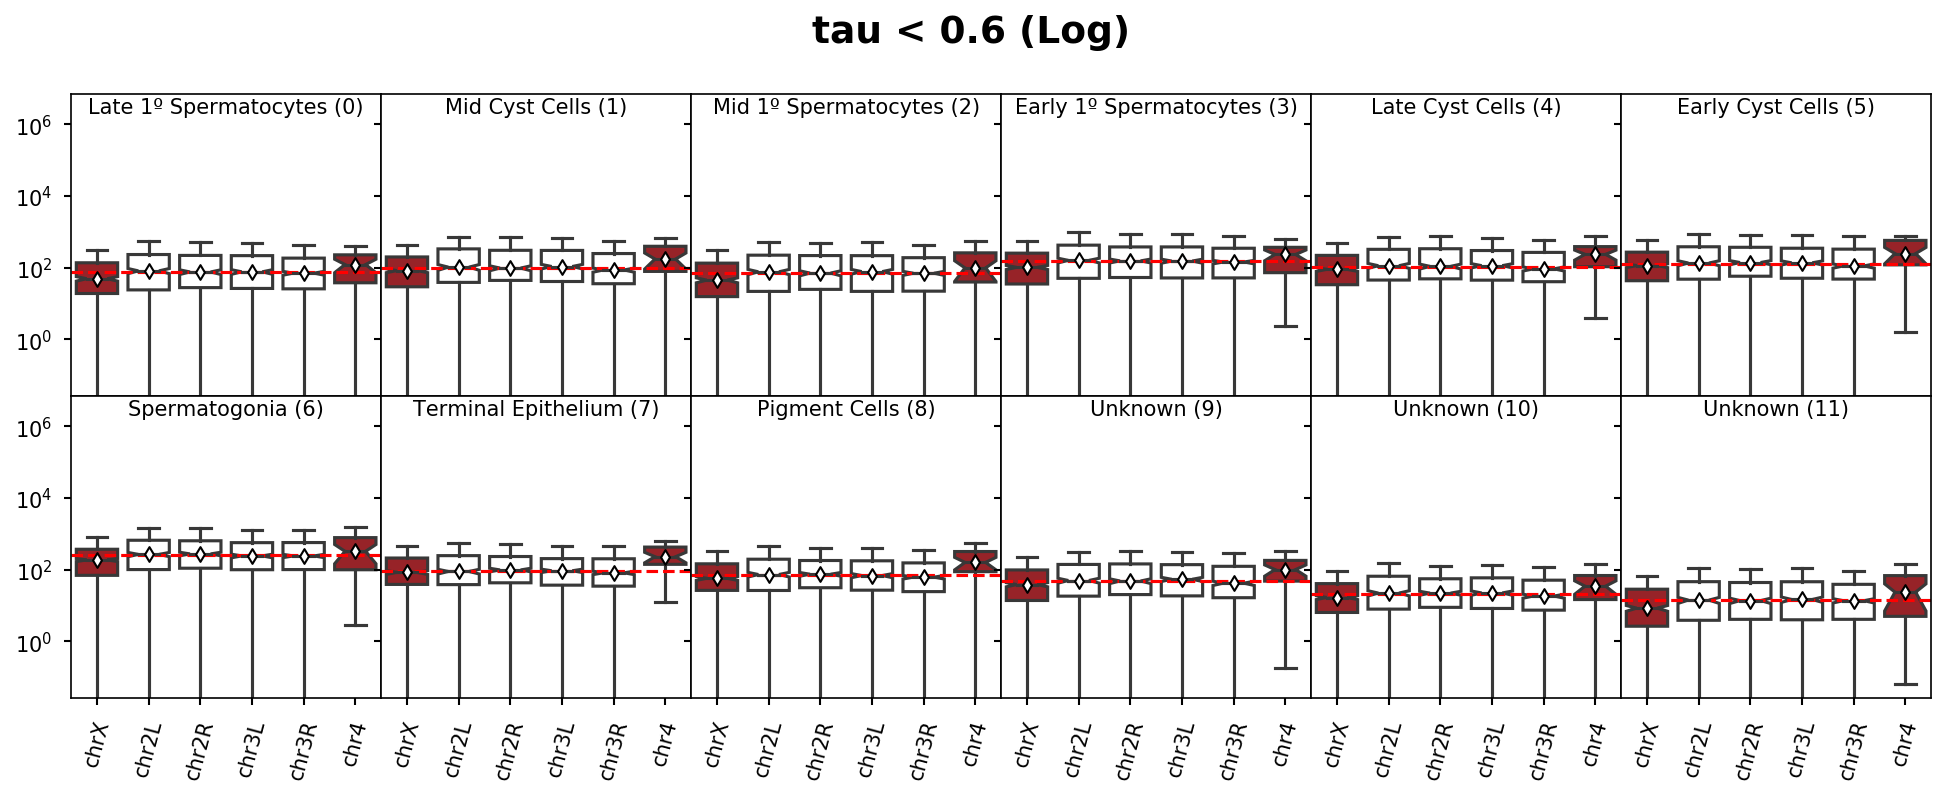

In [19]:
htau = pd.read_csv('../output/2018-02-05_tau_haiwang_male_tau.tsv', sep='\t', index_col=0)
tau_genes = htau[(htau.tau < .6)].index.tolist()
norm = norm_data(nbconfig.seurat_dir)
tau_targets = norm.index[norm.index.isin(tau_genes)].tolist()

print(len(tau_targets))

fig, axes = plt.subplots(2, 6, figsize=plt.figaspect(1/3), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
figLog, axesLog = plt.subplots(2, 6, figsize=plt.figaspect(1/3), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
_xtoa = []
_pvals = []
_pvalsSample = []
for c, ax, axLog in zip(range(12), axes.flatten(), axesLog.flatten()):
    cnts = agg_all('norm', seurat_dir=nbconfig.seurat_dir, cluster=c)
    data = cnts.to_frame().join(nbconfig.fbgn2chrom).loc[tau_targets]
                        
    # Regular boxplot
    ax = fe_chrom_boxplot(c, data=data, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.text(0.5, .99, nbconfig.CLUSTER_ANNOT[c], ha='center', va='top', transform=ax.transAxes, fontsize=10)
                        
    # Log boxplot
    axLog = fe_chrom_boxplot(c, data=data, ax=axLog)
    axLog.set_yscale('log')
    axLog.set_xlabel('')
    axLog.set_ylabel('')
    axLog.text(0.5, .99, nbconfig.CLUSTER_ANNOT[c], ha='center', va='top', transform=axLog.transAxes, fontsize=10)
                        
    # Chrom to A ratios
    _df = x_to_a(c, data=data)
    _df.columns = [c]
    _xtoa.append(_df)
 
    # P-values for Chrom : A comparison
    _pvals.append(mann_whitney_by_arm(c, data=data))
    _pvalsSample.append(mann_whitney_by_arm(c, data=data, sample=True))
                        
for ax in axes[1, :]:
    for l in ax.get_xticklabels():
        l.set_rotation(75)
        
fig.suptitle('tau < 0.6')
                        
for axLog in axesLog[1, :]:
    for l in axLog.get_xticklabels():
        l.set_rotation(75)
                        
figLog.suptitle('tau < 0.6 (Log)')

df_xtoa = pd.concat(_xtoa, axis=1)
df_pvals = pd.concat(_pvals)
df_pvalsSample = pd.concat(_pvalsSample)

In [20]:
df_xtoa

0         1         2         3         4         5         6   \
chrom                                                                         
chrX   0.650819  0.848253  0.623024  0.667397  0.855155  0.884467  0.726749   
chr2L  1.076143  1.059587  1.062368  1.044930  1.079786  1.043202  1.037354   
chr2R  1.002941  0.998103  0.977927  1.011511  1.035029  1.077816  1.070136   
chr3L  1.012593  1.104474  1.077003  1.000339  1.084347  1.058181  0.942594   
chr3R  0.929134  0.882937  0.968928  0.940356  0.882544  0.867351  0.941327   
chr4   1.616360  1.783073  1.366473  1.528570  2.242653  1.917502  1.265609   

             7         8         9         10        11  
chrom                                                    
chrX   0.932727  0.830623  0.810200  0.794783  0.600407  
chr2L  0.989515  1.060452  1.052786  1.054282  1.004198  
chr2R  1.091407  1.080262  1.018906  1.051945  0.972456  
chr3L  1.035388  0.994109  1.138577  1.062271  1.044938  
chr3R  0.907256  0.894659  0.886100  0.871376  0.967530  
chr4   2.553610  2.307740  2.125242  1.646813  1.674776

In [21]:
df_pvals.loc[[6, 3, 2, 0], ['chrX', 'chr4', 'chr2L']]

chrX      chr4     chr2L
cluster                                  
6        1.280704e-09  0.718017  0.767483
3        2.018147e-09  0.757812  0.720967
2        2.539121e-09  0.790699  0.672355
0        2.201924e-09  0.846768  0.696210

In [22]:
df_pvalsSample.loc[[6, 3, 2, 0], ['chrX', 'chr4', 'chr2L']]

chrX      chr4     chr2L
cluster                              
6        0.000010  0.826494  0.800256
3        0.000010  0.866357  0.716480
2        0.000009  0.945739  0.630958
0        0.000017  0.930697  0.699023

Text(0.5,0.98,'tau < 0.6 (Log)')

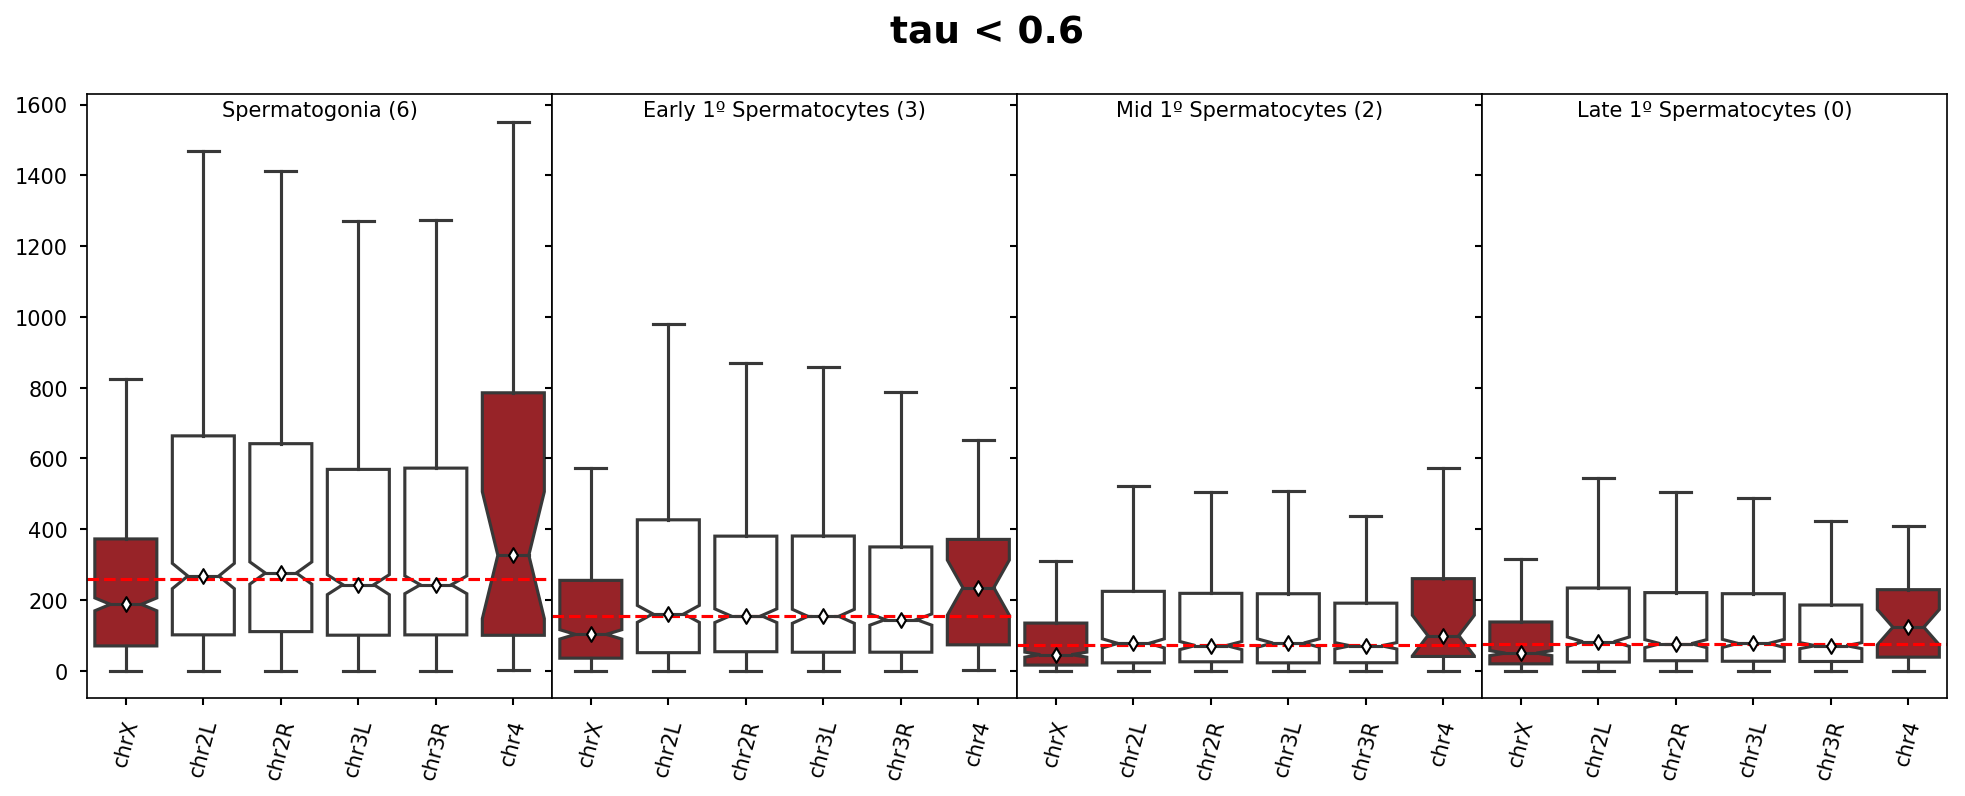

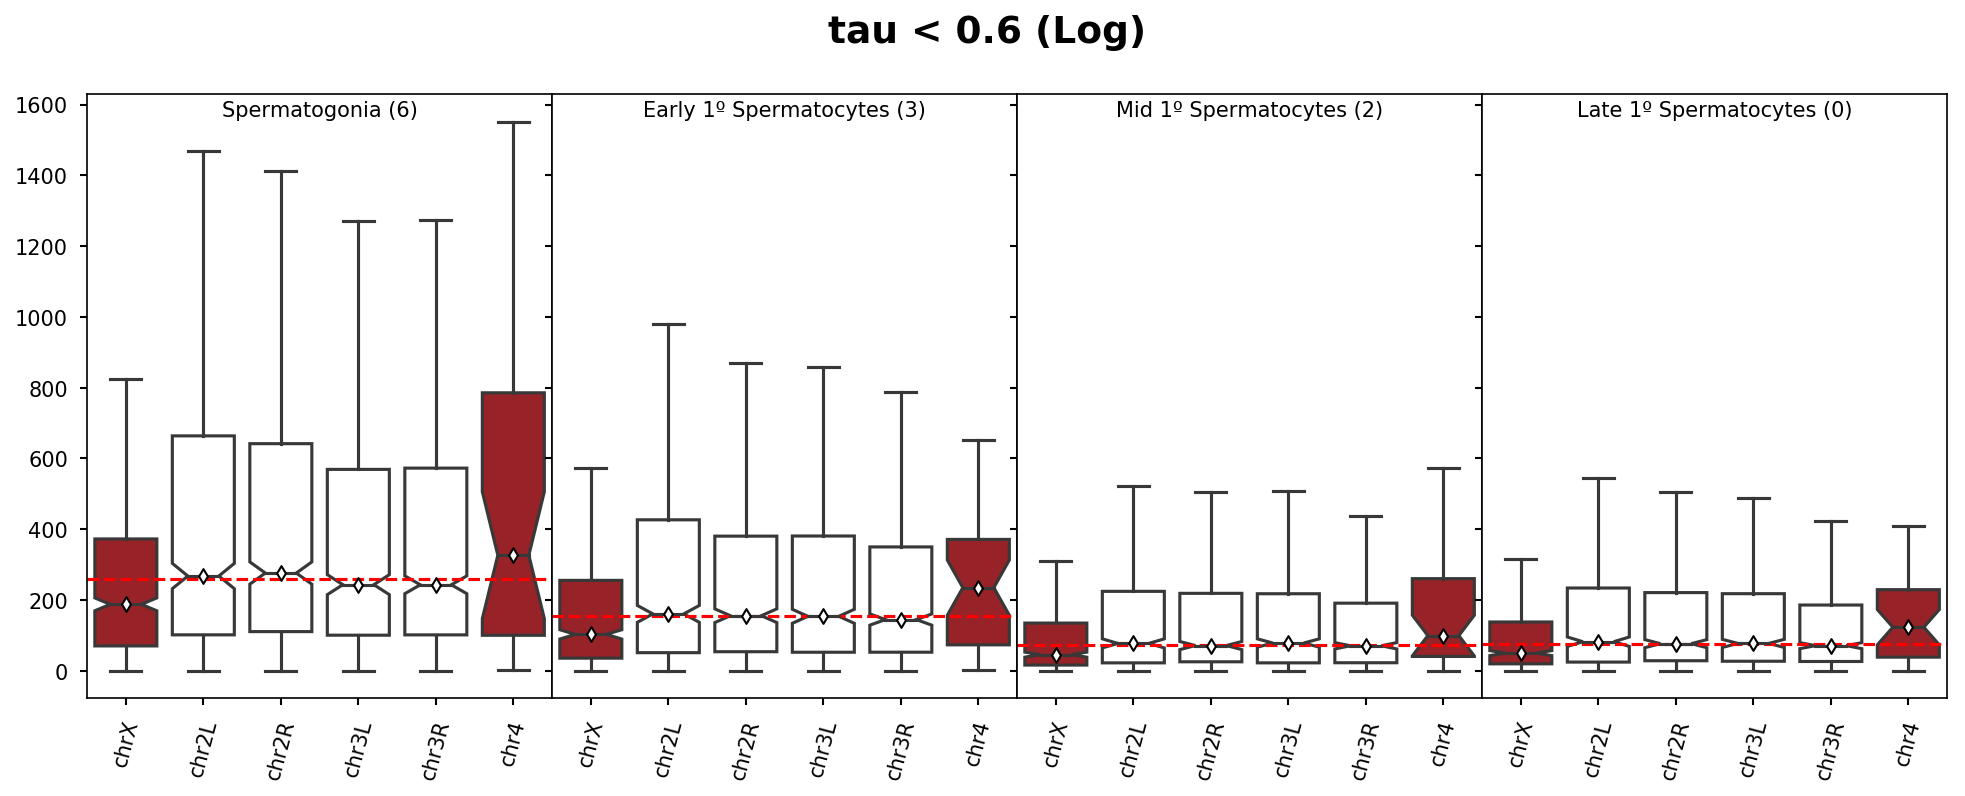

In [23]:
fig, axes = plt.subplots(1, 4, figsize=plt.figaspect(1/3), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
figLog, axesLog = plt.subplots(1, 4, figsize=plt.figaspect(1/3), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
for c, ax, axLog in zip([6, 3, 2, 0], axes.flatten(), axesLog.flatten()):
    cnts = agg_all('norm', seurat_dir=nbconfig.seurat_dir, cluster=c)
    data = cnts.to_frame().join(nbconfig.fbgn2chrom).loc[tau_targets]
                        
    # Regular boxplot
    ax = fe_chrom_boxplot(c, data=data, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.text(0.5, .99, nbconfig.CLUSTER_ANNOT[c], ha='center', va='top', transform=ax.transAxes, fontsize=10)
                        
    # Log boxplot
    axLog = fe_chrom_boxplot(c, data=data, ax=axLog)
    axLog.set_xlabel('')
    axLog.set_ylabel('')
    axLog.text(0.5, .99, nbconfig.CLUSTER_ANNOT[c], ha='center', va='top', transform=axLog.transAxes, fontsize=10)
    
for ax in axes:
    for l in ax.get_xticklabels():
        l.set_rotation(75)
                        
fig.suptitle('tau < 0.6')

for axLog in axesLog:
    for l in axLog.get_xticklabels():
        l.set_rotation(75)

figLog.suptitle('tau < 0.6 (Log)')

## TSPS Haiwang

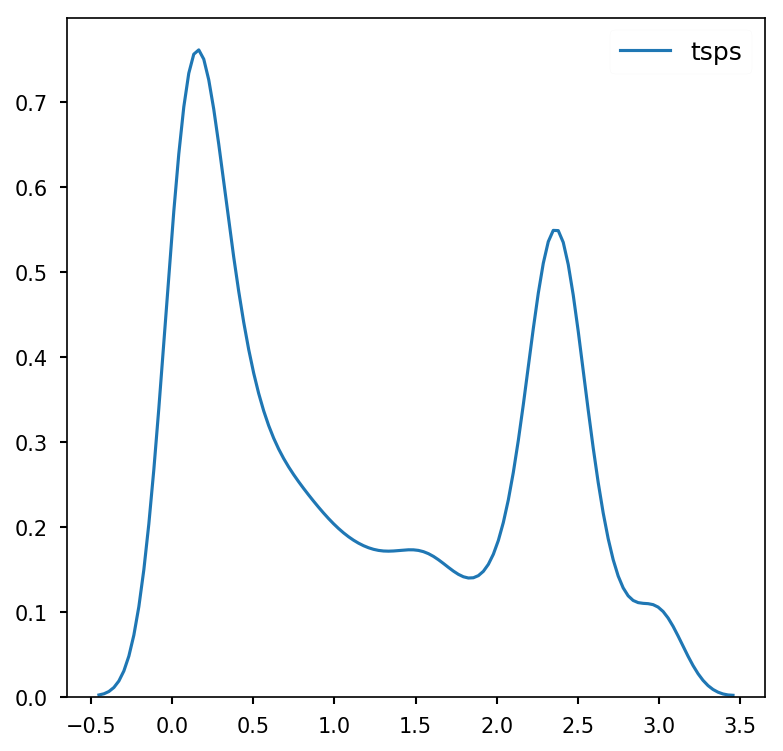

In [24]:
htsps = pd.read_csv('../output/2018-02-05_tau_haiwang_male_tsps.tsv', sep='\t', index_col=0)
sns.kdeplot(htsps.tsps.dropna())

### 1

7760


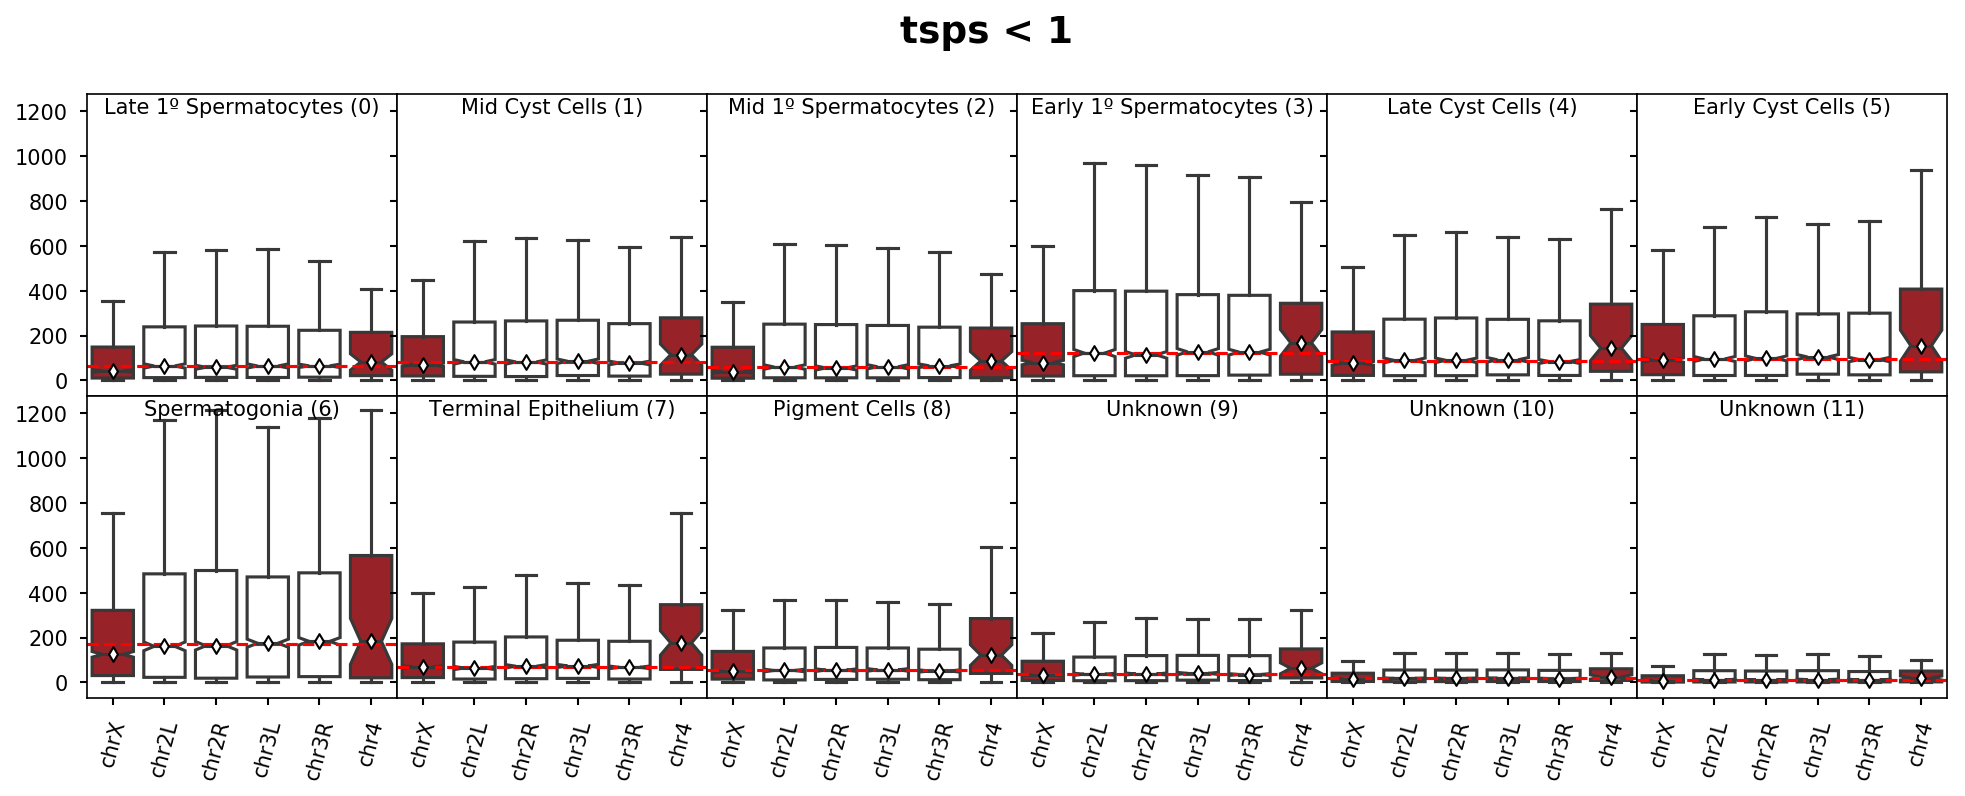

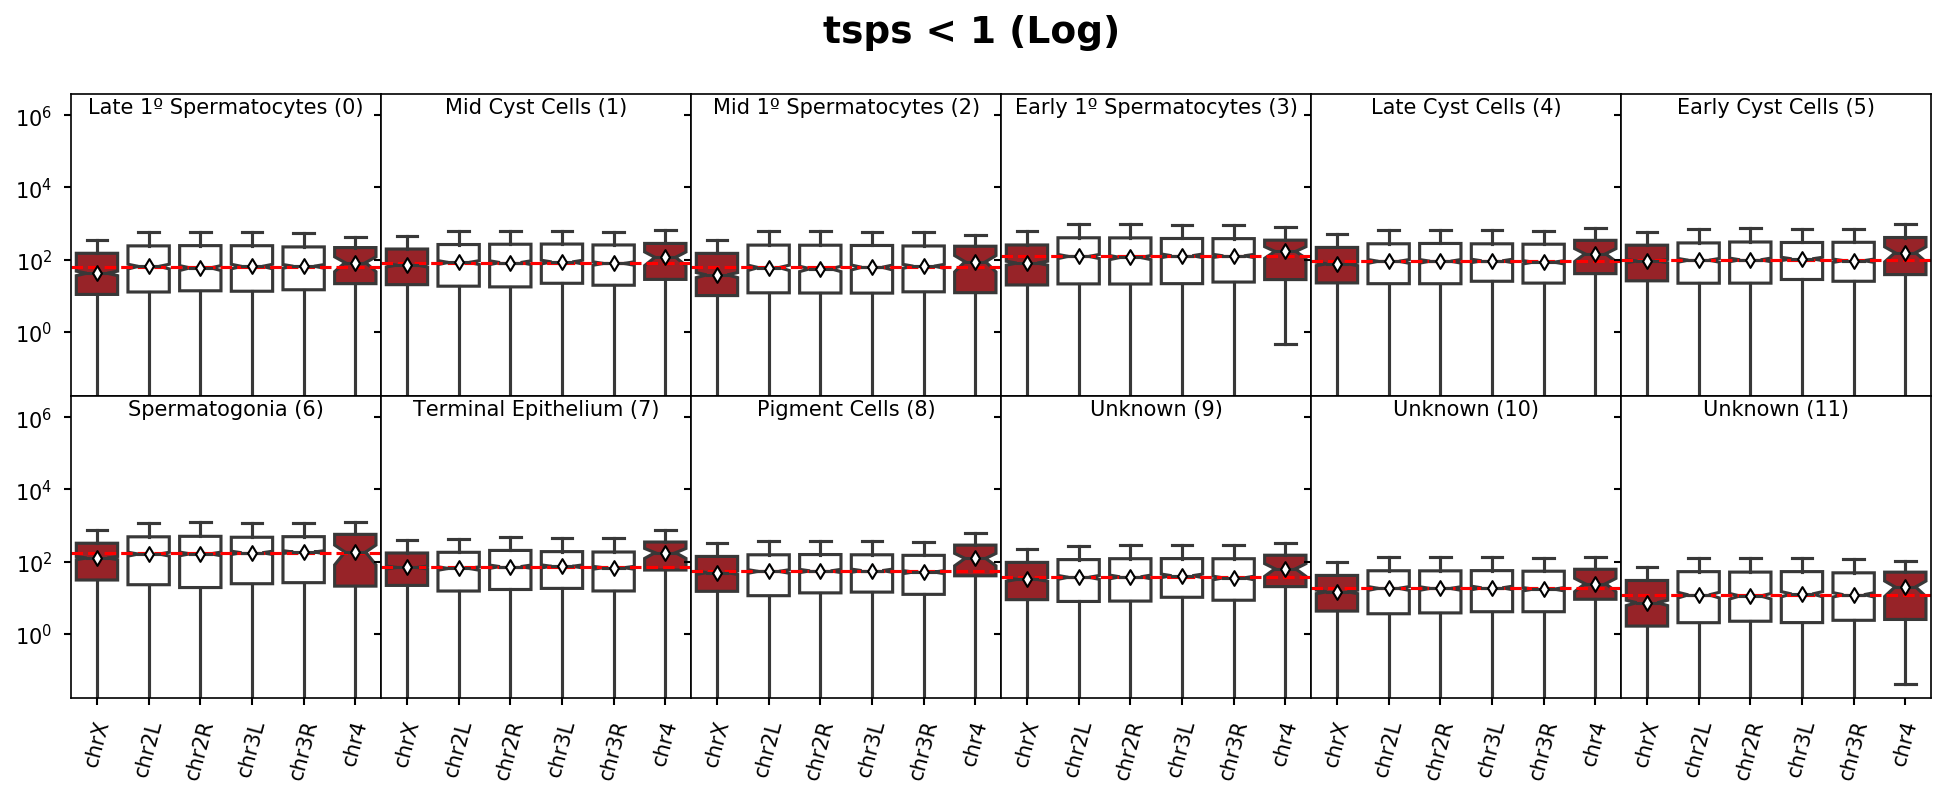

In [25]:
htsps = pd.read_csv('../output/2018-02-05_tau_haiwang_male_tsps.tsv', sep='\t', index_col=0)
tsps_genes = htsps[(htsps.tsps < 1)].index.tolist()
norm = norm_data(nbconfig.seurat_dir)
tsps_targets = norm.index[norm.index.isin(tsps_genes)].tolist()

print(len(tsps_targets))

fig, axes = plt.subplots(2, 6, figsize=plt.figaspect(1/3), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
figLog, axesLog = plt.subplots(2, 6, figsize=plt.figaspect(1/3), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
_xtoa = []
_pvals = []
_pvalsSample = []
for c, ax, axLog in zip(range(12), axes.flatten(), axesLog.flatten()):
    cnts = agg_all('norm', seurat_dir=nbconfig.seurat_dir, cluster=c)
    data = cnts.to_frame().join(nbconfig.fbgn2chrom).loc[tsps_targets]
                        
    # Regular boxplot
    ax = fe_chrom_boxplot(c, data=data, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.text(0.5, .99, nbconfig.CLUSTER_ANNOT[c], ha='center', va='top', transform=ax.transAxes, fontsize=10)
                        
    # Log boxplot
    axLog = fe_chrom_boxplot(c, data=data, ax=axLog)
    axLog.set_yscale('log')
    axLog.set_xlabel('')
    axLog.set_ylabel('')
    axLog.text(0.5, .99, nbconfig.CLUSTER_ANNOT[c], ha='center', va='top', transform=axLog.transAxes, fontsize=10)
                        
    # Chrom to A ratios
    _df = x_to_a(c, data=data)
    _df.columns = [c]
    _xtoa.append(_df)
 
    # P-values for Chrom : A comparison
    _pvals.append(mann_whitney_by_arm(c, data=data))
    _pvalsSample.append(mann_whitney_by_arm(c, data=data, sample=True))
                        
for ax in axes[1, :]:
    for l in ax.get_xticklabels():
        l.set_rotation(75)
        
fig.suptitle('tsps < 1')
                        
for axLog in axesLog[1, :]:
    for l in axLog.get_xticklabels():
        l.set_rotation(75)
                        
figLog.suptitle('tsps < 1 (Log)')

df_xtoa = pd.concat(_xtoa, axis=1)
df_pvals = pd.concat(_pvals)
df_pvalsSample = pd.concat(_pvalsSample)

In [26]:
df_xtoa

0         1         2         3         4         5         6   \
chrom                                                                         
chrX   0.654850  0.850296  0.621719  0.649733  0.860517  0.939850  0.734437   
chr2L  1.013015  1.012467  0.991227  0.995826  1.008653  0.988942  0.944315   
chr2R  0.922590  1.005365  0.922005  0.929785  1.014377  1.014879  0.958440   
chr3L  1.013223  1.045107  1.009797  1.038653  1.039408  1.079896  1.025932   
chr3R  1.021827  0.950798  1.082842  1.028667  0.953547  0.962589  1.074118   
chr4   1.293404  1.404265  1.442016  1.365200  1.627441  1.602602  1.073313   

             7         8         9         10        11  
chrom                                                    
chrX   0.995611  0.917364  0.857383  0.808606  0.609261  
chr2L  0.933503  0.996144  0.981815  1.007365  1.002263  
chr2R  1.048321  1.027309  1.009774  1.003094  0.934139  
chr3L  1.068751  1.045449  1.084065  1.039850  1.060130  
chr3R  0.977634  0.954064  0.944165  0.958238  1.014304  
chr4   2.554526  2.276796  1.691957  1.359558  1.666060

In [27]:
df_pvals.loc[[6, 3, 2, 0], ['chrX', 'chr4', 'chr2L']]

chrX      chr4     chr2L
cluster                                  
6        5.126540e-05  0.748873  0.222295
3        1.324582e-09  0.674396  0.355861
2        1.635160e-10  0.690244  0.404090
0        1.671432e-09  0.719425  0.392305

In [28]:
df_pvalsSample.loc[[6, 3, 2, 0], ['chrX', 'chr4', 'chr2L']]

chrX      chr4     chr2L
cluster                              
6        0.003235  0.918036  0.463346
3        0.000015  0.940709  0.595722
2        0.000005  0.951201  0.632085
0        0.000016  0.950374  0.635621

Text(0.5,0.98,'tsps < 1 (Log)')

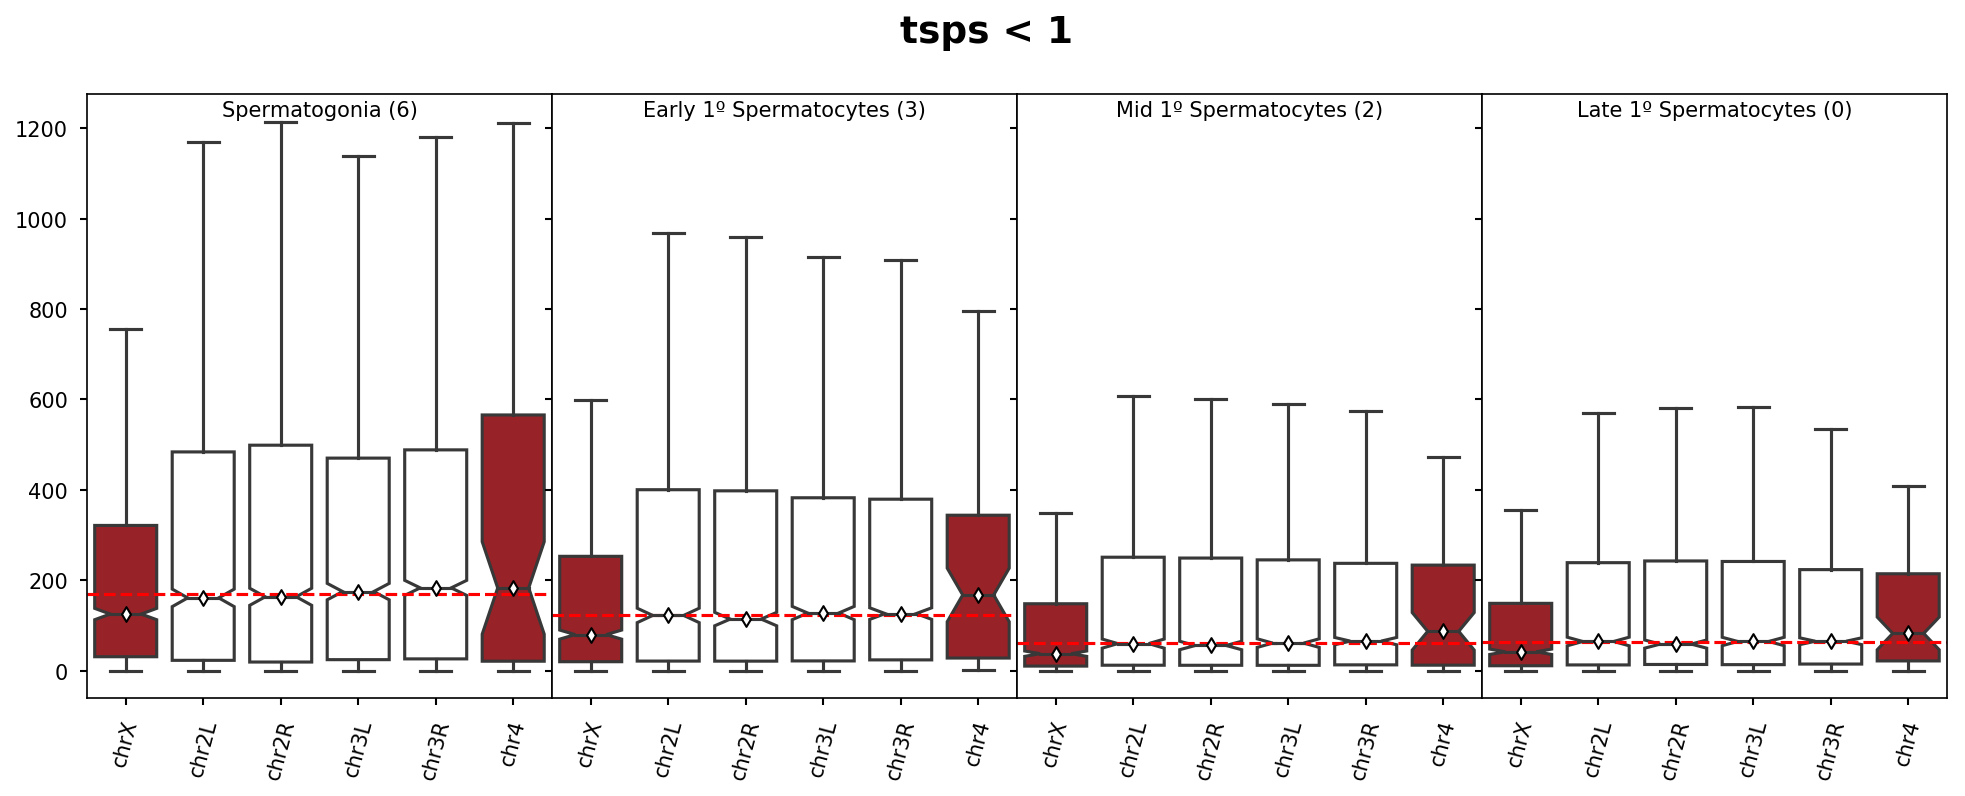

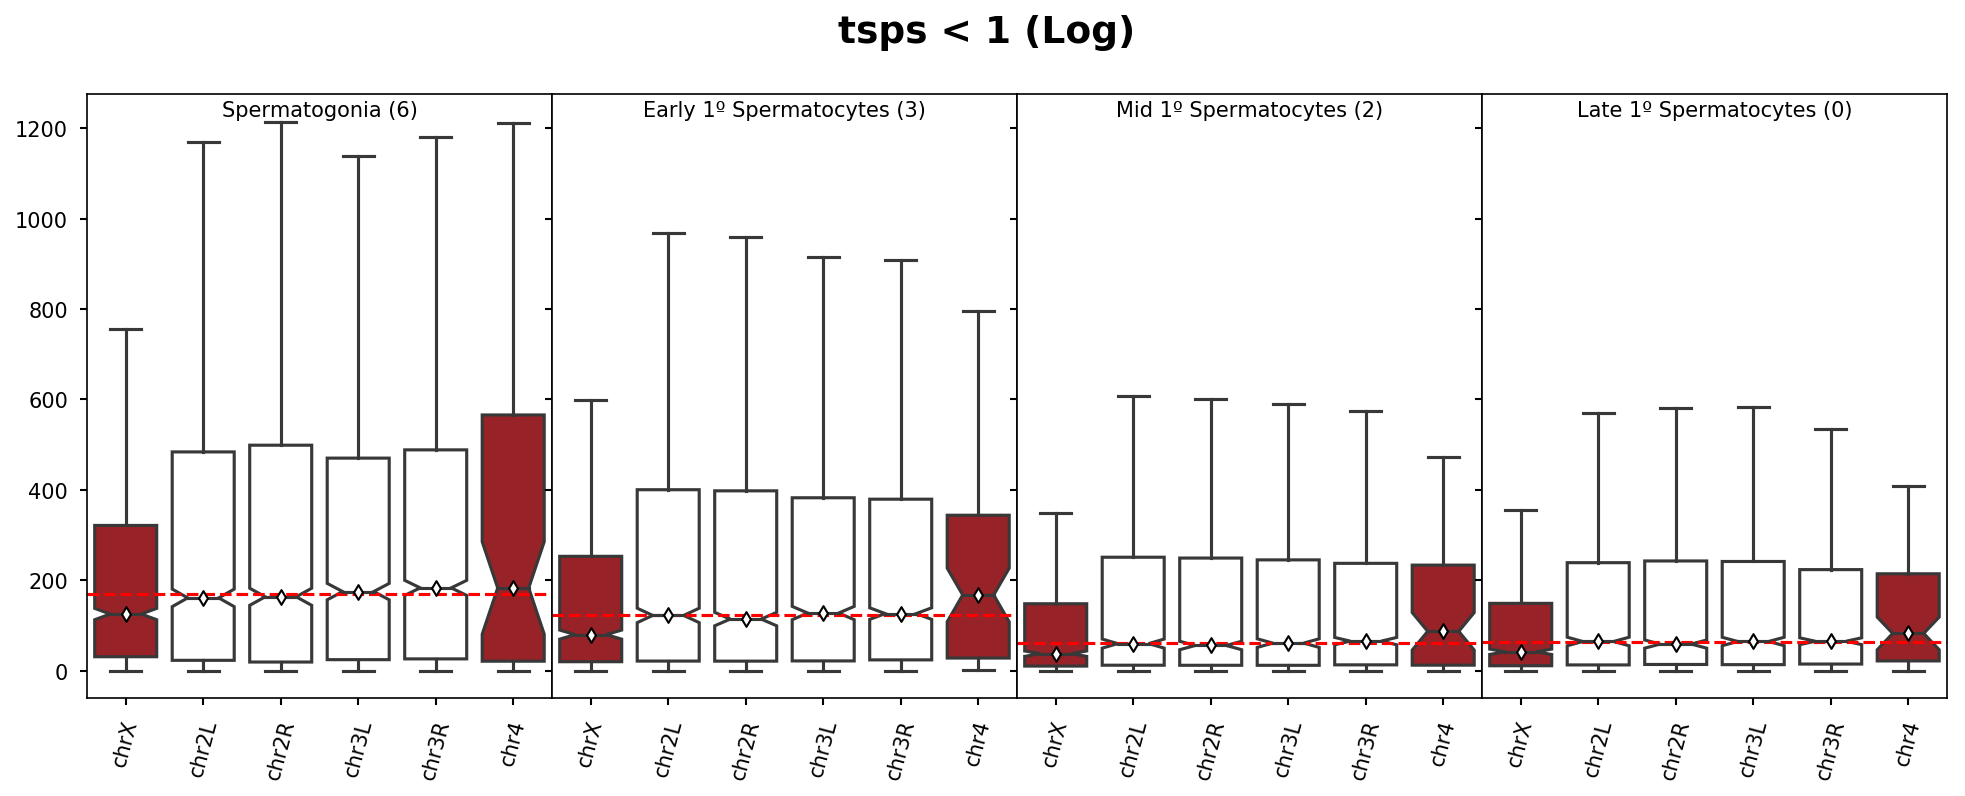

In [29]:
fig, axes = plt.subplots(1, 4, figsize=plt.figaspect(1/3), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
figLog, axesLog = plt.subplots(1, 4, figsize=plt.figaspect(1/3), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
for c, ax, axLog in zip([6, 3, 2, 0], axes.flatten(), axesLog.flatten()):
    cnts = agg_all('norm', seurat_dir=nbconfig.seurat_dir, cluster=c)
    data = cnts.to_frame().join(nbconfig.fbgn2chrom).loc[tsps_targets]
                        
    # Regular boxplot
    ax = fe_chrom_boxplot(c, data=data, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.text(0.5, .99, nbconfig.CLUSTER_ANNOT[c], ha='center', va='top', transform=ax.transAxes, fontsize=10)
                        
    # Log boxplot
    axLog = fe_chrom_boxplot(c, data=data, ax=axLog)
    axLog.set_xlabel('')
    axLog.set_ylabel('')
    axLog.text(0.5, .99, nbconfig.CLUSTER_ANNOT[c], ha='center', va='top', transform=axLog.transAxes, fontsize=10)
    
for ax in axes:
    for l in ax.get_xticklabels():
        l.set_rotation(75)
                        
fig.suptitle('tsps < 1')

for axLog in axesLog:
    for l in axLog.get_xticklabels():
        l.set_rotation(75)

figLog.suptitle('tsps < 1 (Log)')

## Tau modENCODE

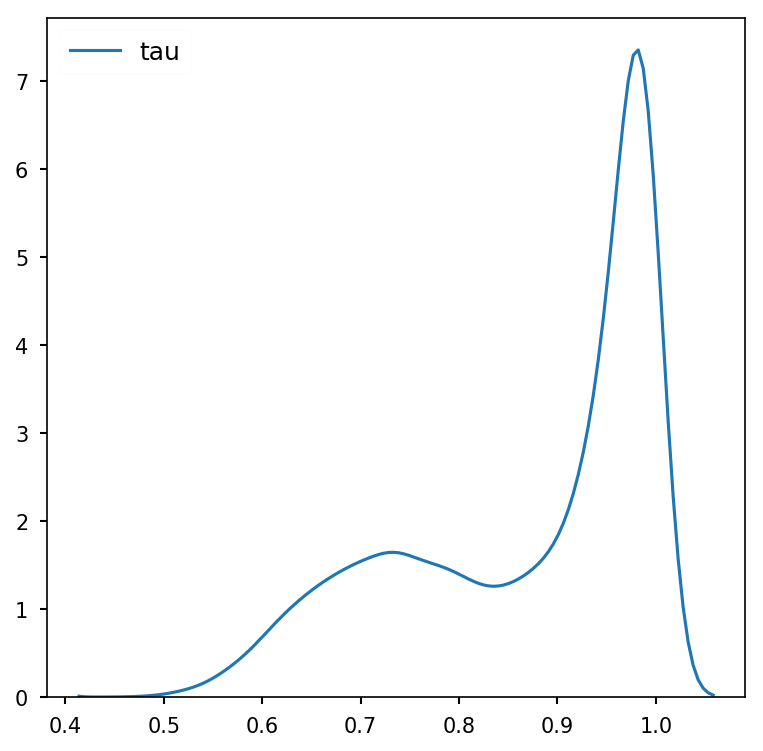

In [30]:
mtau = pd.read_csv('../output/2018-02-05_tau_modENCODE_tau.tsv', sep='\t', header=None)
mtau.columns = ['FBgn', 'tau']
mtau.set_index('FBgn', inplace=True)
sns.kdeplot(mtau.tau.dropna())

### 0.7

2341


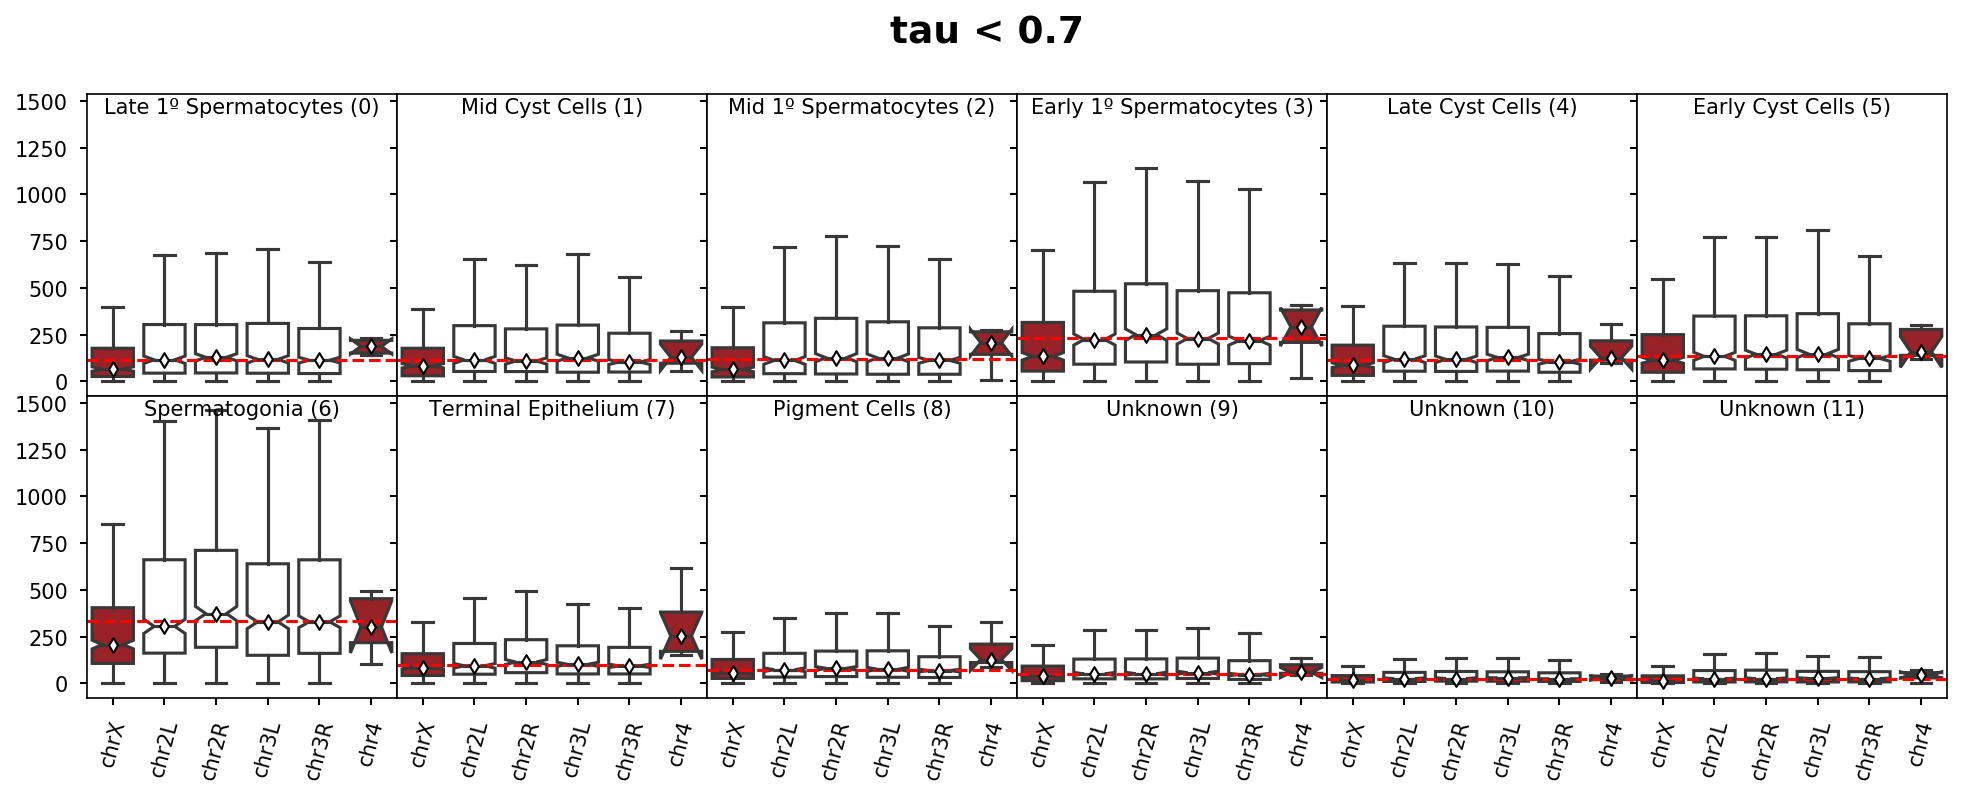

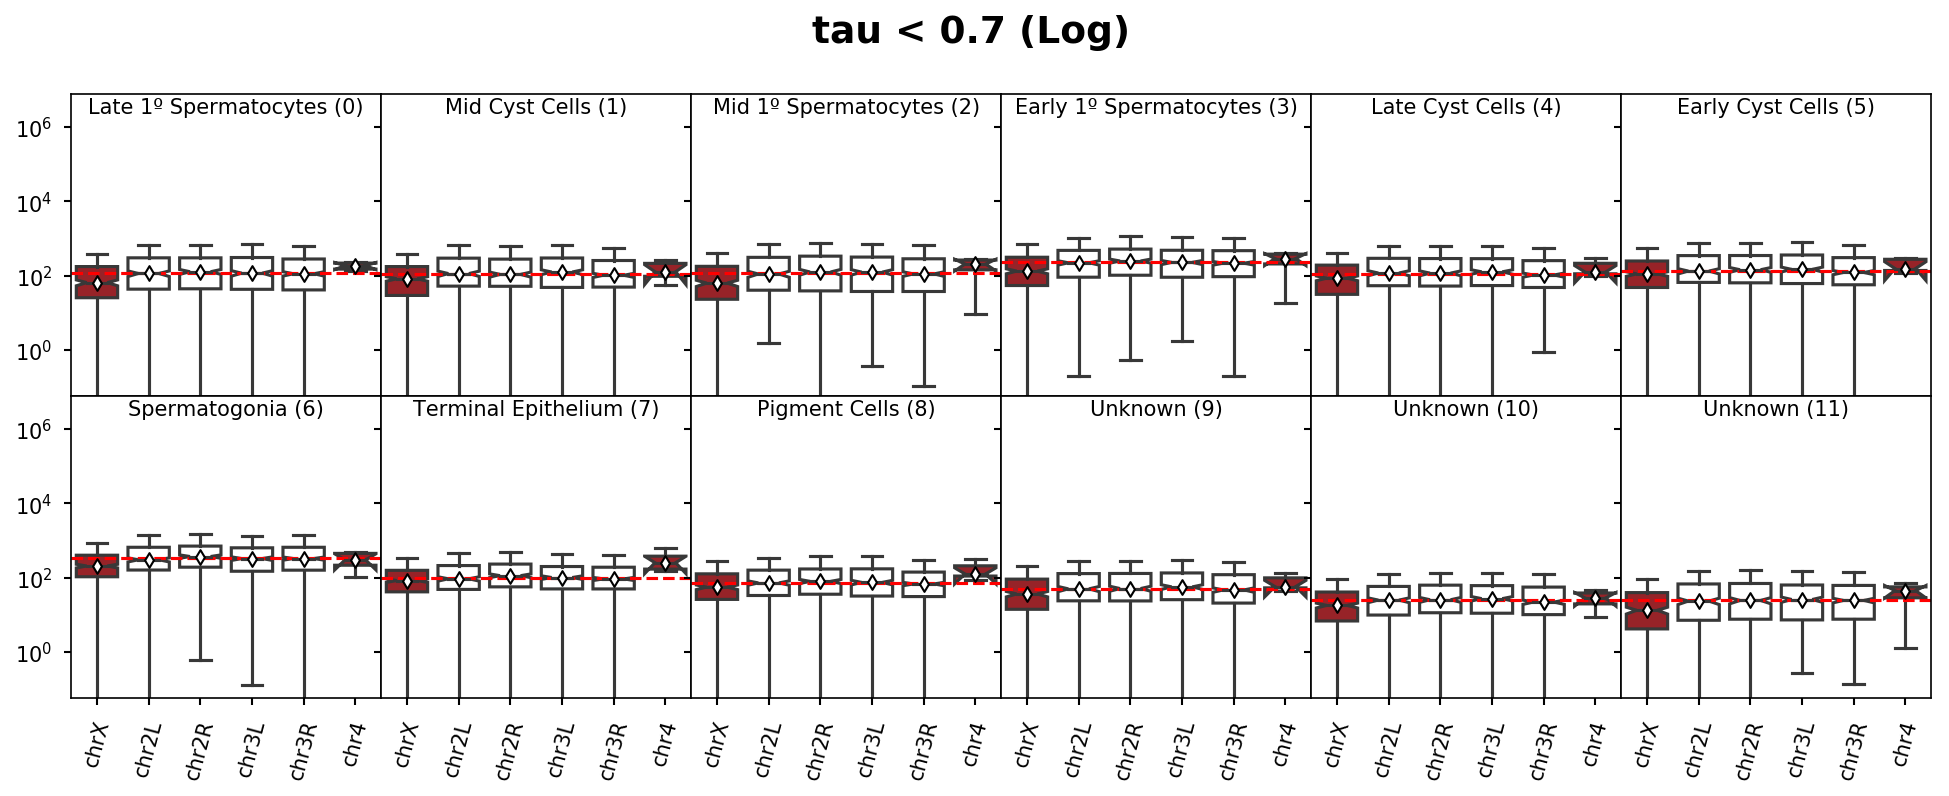

In [31]:
mtau = pd.read_csv('../output/2018-02-05_tau_modENCODE_tau.tsv', sep='\t', header=None)
mtau.columns = ['FBgn', 'tau']
mtau.set_index('FBgn', inplace=True)

tau_genes = mtau[(mtau.tau < .7)].index.tolist()
norm = norm_data(nbconfig.seurat_dir)
tau_targets = norm.index[norm.index.isin(tau_genes)].tolist()

print(len(tau_targets))

fig, axes = plt.subplots(2, 6, figsize=plt.figaspect(1/3), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
figLog, axesLog = plt.subplots(2, 6, figsize=plt.figaspect(1/3), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
_xtoa = []
_pvals = []
_pvalsSample = []
for c, ax, axLog in zip(range(12), axes.flatten(), axesLog.flatten()):
    cnts = agg_all('norm', seurat_dir=nbconfig.seurat_dir, cluster=c)
    data = cnts.to_frame().join(nbconfig.fbgn2chrom).loc[tau_targets]
                        
    # Regular boxplot
    ax = fe_chrom_boxplot(c, data=data, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.text(0.5, .99, nbconfig.CLUSTER_ANNOT[c], ha='center', va='top', transform=ax.transAxes, fontsize=10)
                        
    # Log boxplot
    axLog = fe_chrom_boxplot(c, data=data, ax=axLog)
    axLog.set_yscale('log')
    axLog.set_xlabel('')
    axLog.set_ylabel('')
    axLog.text(0.5, .99, nbconfig.CLUSTER_ANNOT[c], ha='center', va='top', transform=axLog.transAxes, fontsize=10)
                        
    # Chrom to A ratios
    _df = x_to_a(c, data=data)
    _df.columns = [c]
    _xtoa.append(_df)
 
    # P-values for Chrom : A comparison
    _pvals.append(mann_whitney_by_arm(c, data=data))
    _pvalsSample.append(mann_whitney_by_arm(c, data=data, sample=True))
                        
for ax in axes[1, :]:
    for l in ax.get_xticklabels():
        l.set_rotation(75)
        
fig.suptitle('tau < 0.7')
                        
for axLog in axesLog[1, :]:
    for l in axLog.get_xticklabels():
        l.set_rotation(75)
                        
figLog.suptitle('tau < 0.7 (Log)')

df_xtoa = pd.concat(_xtoa, axis=1)
df_pvals = pd.concat(_pvals)
df_pvalsSample = pd.concat(_pvalsSample)

In [32]:
df_xtoa

0         1         2         3         4         5         6   \
chrom                                                                         
chrX   0.563595  0.742596  0.543092  0.579945  0.758067  0.822963  0.618795   
chr2L  0.990529  1.026505  0.953874  0.971316  1.041018  0.979124  0.909511   
chr2R  1.103486  0.974189  1.079385  1.084835  1.034851  1.065078  1.113594   
chr3L  1.009594  1.128670  1.070296  0.994707  1.121763  1.088532  0.980801   
chr3R  0.974055  0.924635  0.957879  0.945896  0.921708  0.898125  0.982576   
chr4   1.604663  1.149826  1.765332  1.265796  1.110644  1.149246  0.901658   

             7         8         9         10        11  
chrom                                                    
chrX   0.843956  0.767284  0.724004  0.735866  0.543350  
chr2L  0.939941  0.996409  0.993144  1.020796  0.960323  
chr2R  1.141225  1.096238  1.012863  1.044664  0.998501  
chr3L  1.017715  1.026510  1.121650  1.117786  1.058368  
chr3R  0.934319  0.934685  0.929095  0.902423  0.999826  
chr4   2.544579  1.738110  1.142748  1.165316  1.839023

In [33]:
df_pvals.loc[[6, 3, 2, 0], ['chrX', 'chr4', 'chr2L']]

chrX      chr4     chr2L
cluster                                  
6        5.024552e-16  0.459465  0.271689
3        6.066712e-13  0.640877  0.427098
2        8.856307e-12  0.787279  0.526780
0        2.514661e-12  0.750252  0.540000

In [34]:
df_pvalsSample.loc[[6, 3, 2, 0], ['chrX', 'chr4', 'chr2L']]

chrX      chr4     chr2L
cluster                                  
6        3.886648e-11  0.304640  0.319334
3        3.340757e-08  0.738548  0.584714
2        2.937244e-07  0.695360  0.681660
0        1.513067e-07  0.738548  0.732158

Text(0.5,0.98,'tau < 0.7 (Log)')

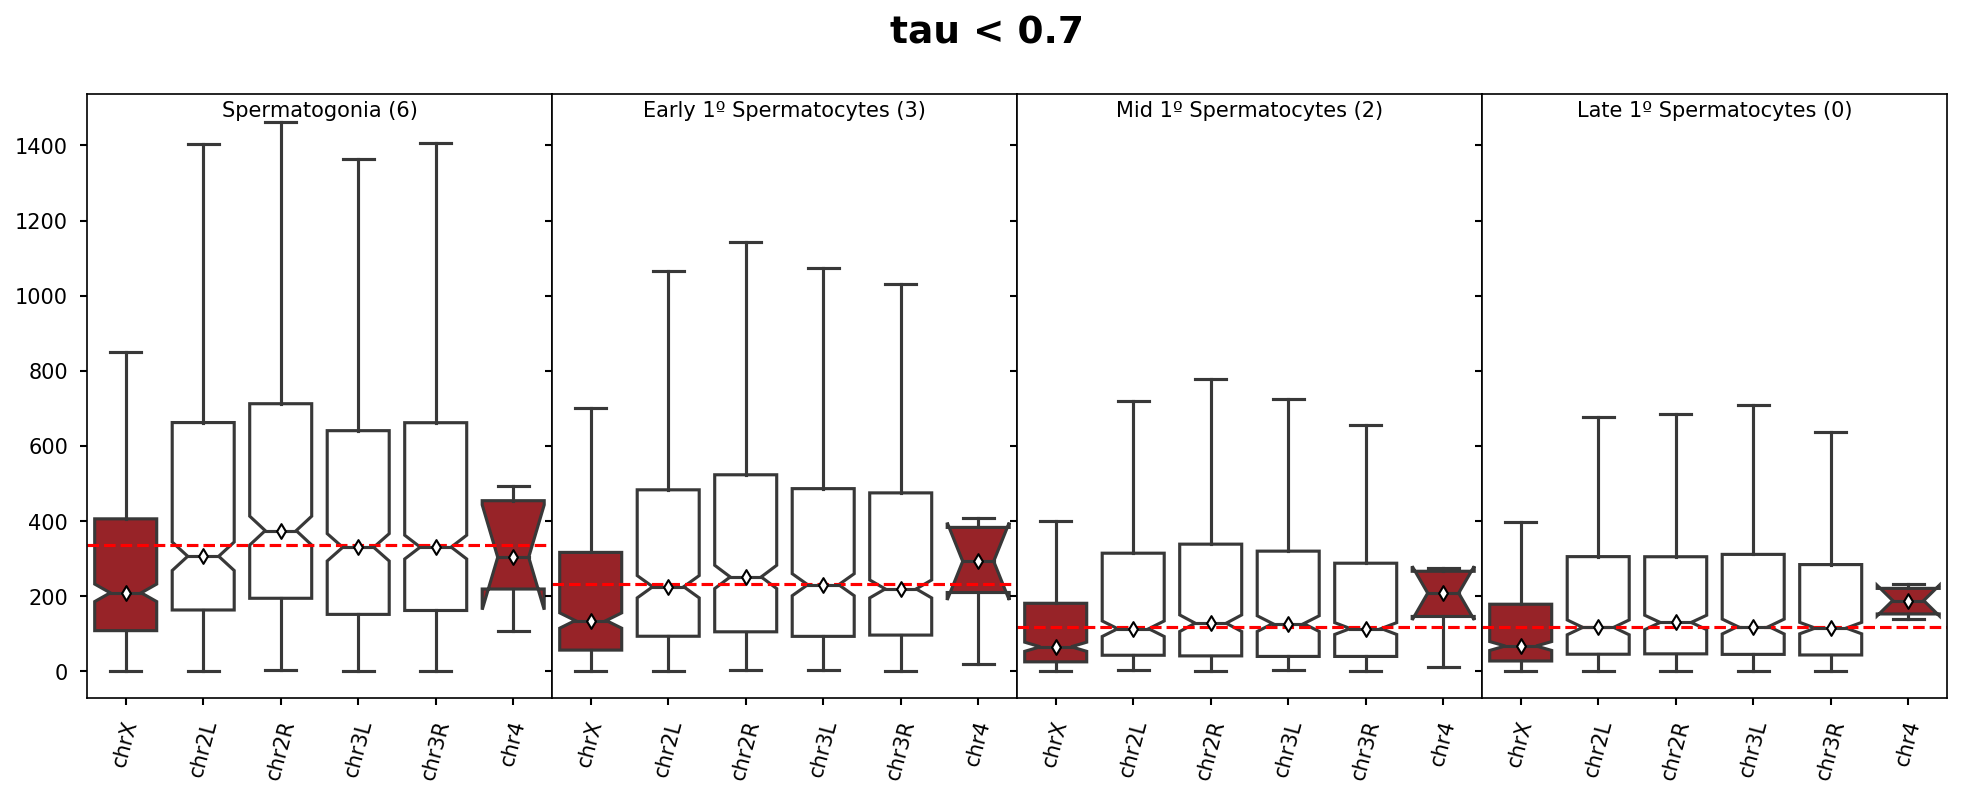

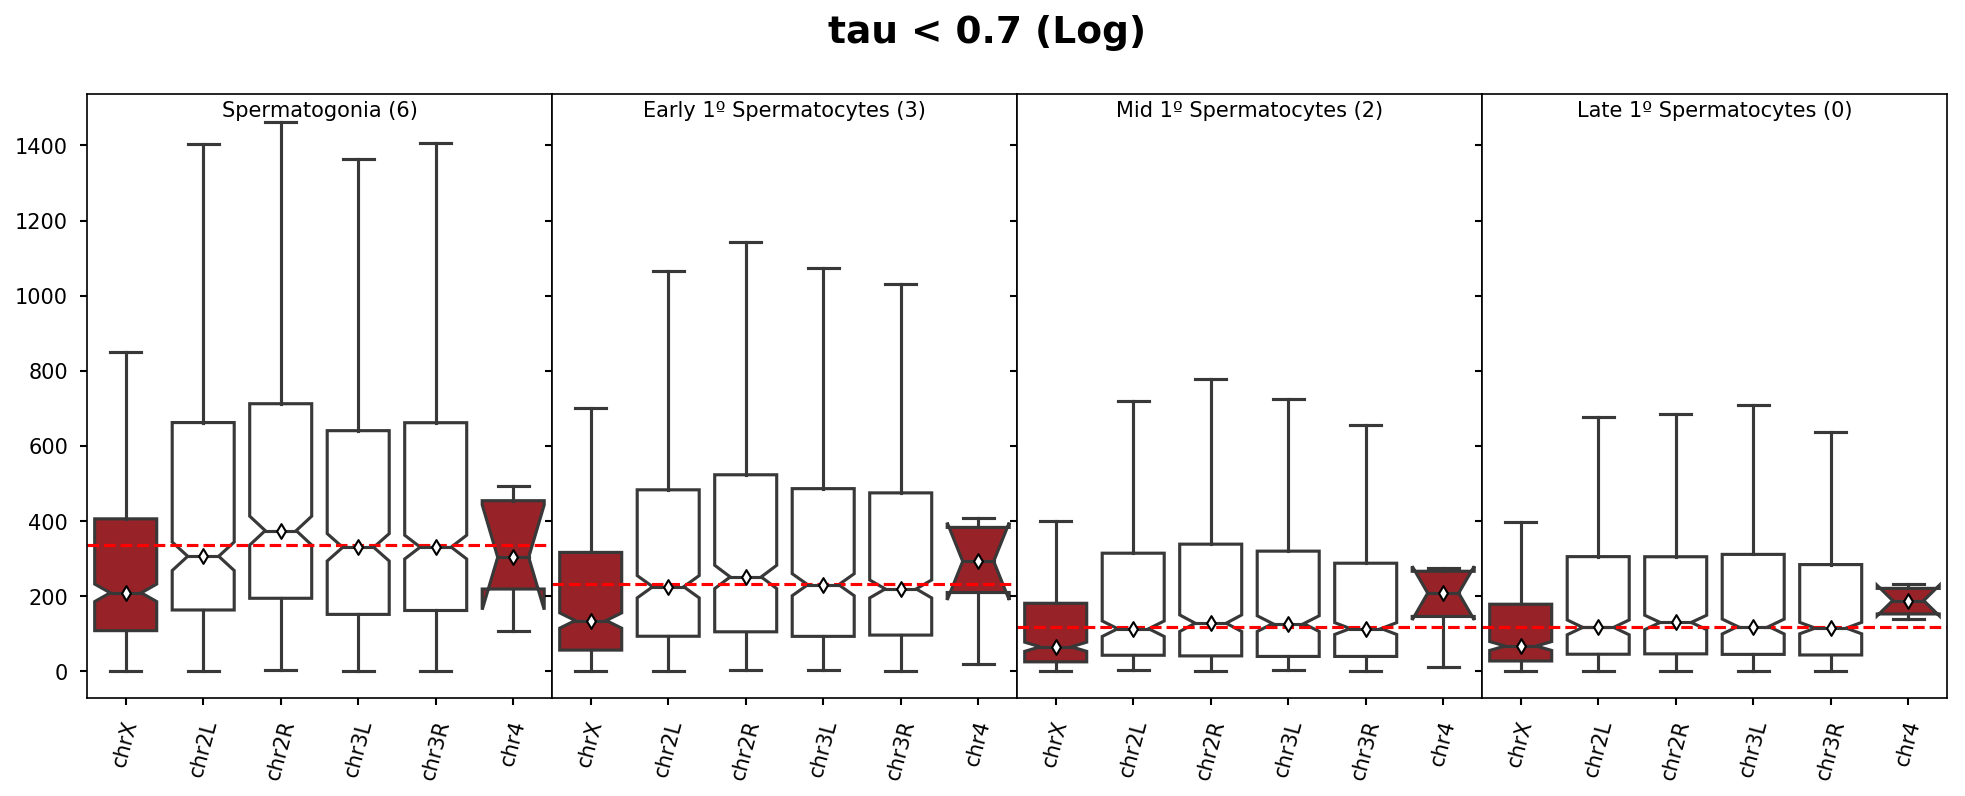

In [35]:
fig, axes = plt.subplots(1, 4, figsize=plt.figaspect(1/3), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
figLog, axesLog = plt.subplots(1, 4, figsize=plt.figaspect(1/3), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
for c, ax, axLog in zip([6, 3, 2, 0], axes.flatten(), axesLog.flatten()):
    cnts = agg_all('norm', seurat_dir=nbconfig.seurat_dir, cluster=c)
    data = cnts.to_frame().join(nbconfig.fbgn2chrom).loc[tau_targets]
                        
    # Regular boxplot
    ax = fe_chrom_boxplot(c, data=data, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.text(0.5, .99, nbconfig.CLUSTER_ANNOT[c], ha='center', va='top', transform=ax.transAxes, fontsize=10)
                        
    # Log boxplot
    axLog = fe_chrom_boxplot(c, data=data, ax=axLog)
    axLog.set_xlabel('')
    axLog.set_ylabel('')
    axLog.text(0.5, .99, nbconfig.CLUSTER_ANNOT[c], ha='center', va='top', transform=axLog.transAxes, fontsize=10)
    
for ax in axes:
    for l in ax.get_xticklabels():
        l.set_rotation(75)
                        
fig.suptitle('tau < 0.7')

for axLog in axesLog:
    for l in axLog.get_xticklabels():
        l.set_rotation(75)

figLog.suptitle('tau < 0.7 (Log)')

## TSPS modENCODE

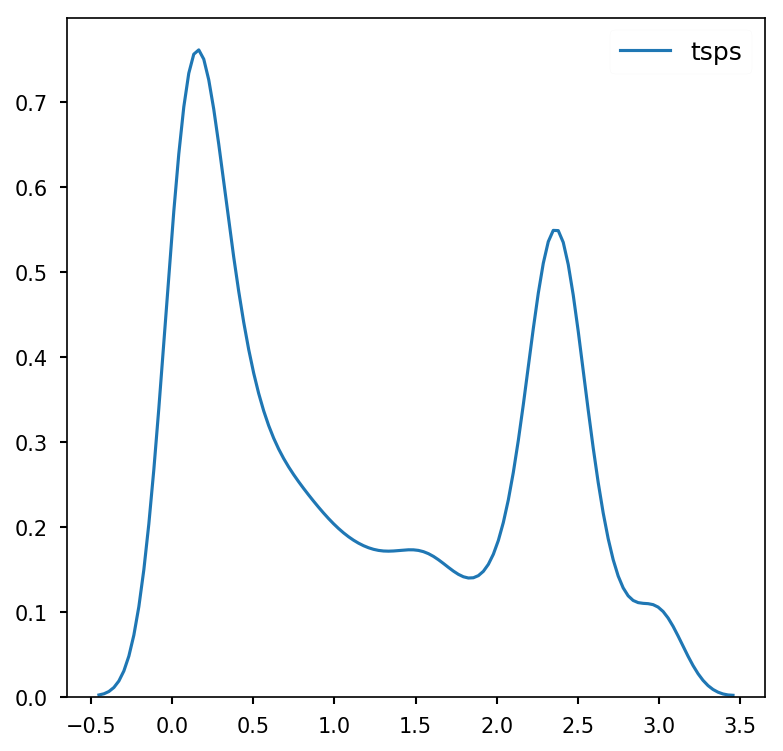

In [36]:
mtsps = pd.read_csv('../output/2018-02-05_tau_modENCODE_tsps.tsv', sep='\t', header=None)
mtsps.columns = ['FBgn', 'tsps']
mtsps.set_index('FBgn', inplace=True)
sns.kdeplot(htsps.tsps.dropna())

### 1

6222


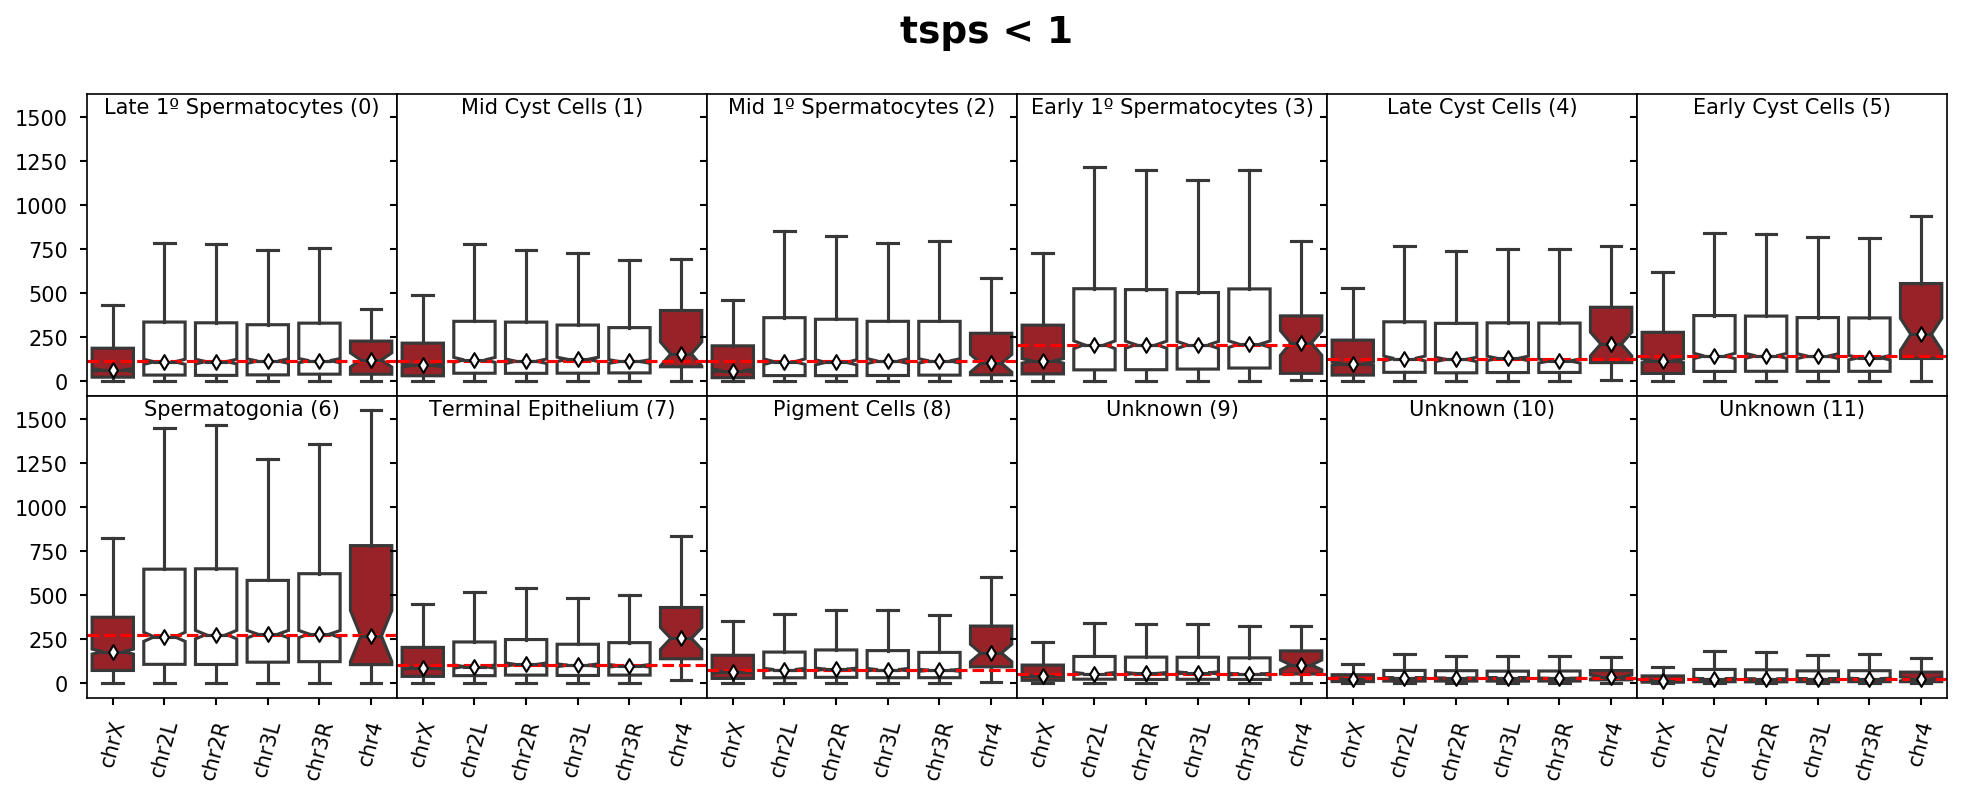

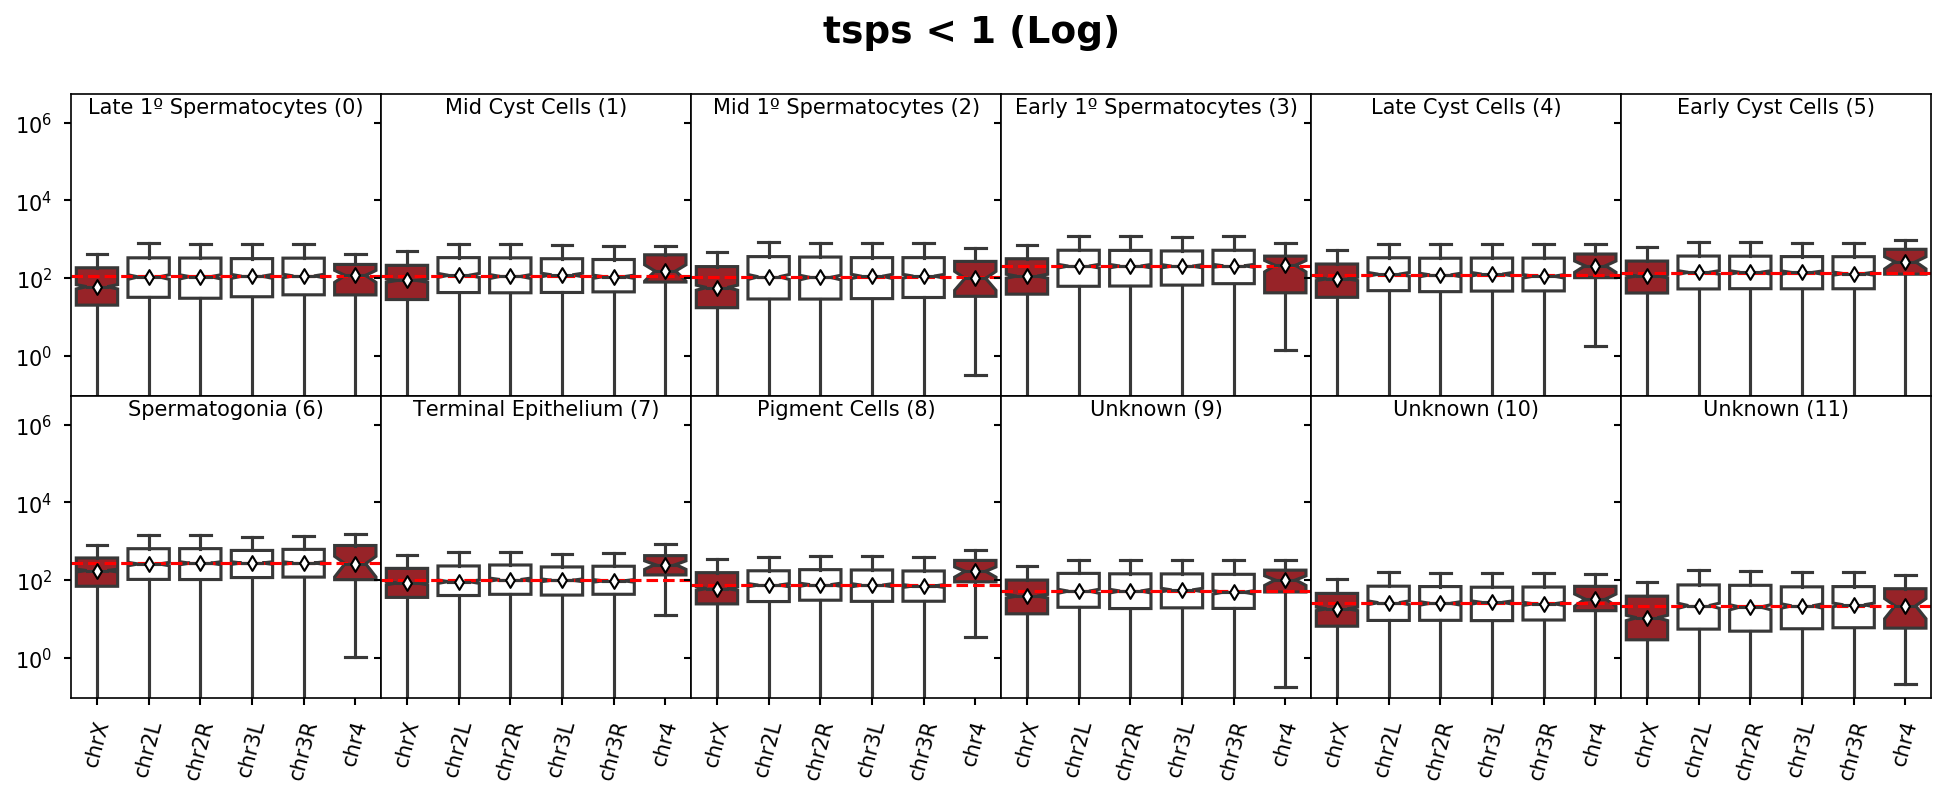

In [37]:
mtsps = pd.read_csv('../output/2018-02-05_tau_modENCODE_tsps.tsv', sep='\t', header=None)
mtsps.columns = ['FBgn', 'tsps']
mtsps.set_index('FBgn', inplace=True)
tsps_genes = mtsps[(mtsps.tsps < 1)].index.tolist()
norm = norm_data(nbconfig.seurat_dir)
tsps_targets = norm.index[norm.index.isin(tsps_genes)].tolist()

print(len(tsps_targets))

fig, axes = plt.subplots(2, 6, figsize=plt.figaspect(1/3), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
figLog, axesLog = plt.subplots(2, 6, figsize=plt.figaspect(1/3), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
_xtoa = []
_pvals = []
_pvalsSample = []
for c, ax, axLog in zip(range(12), axes.flatten(), axesLog.flatten()):
    cnts = agg_all('norm', seurat_dir=nbconfig.seurat_dir, cluster=c)
    data = cnts.to_frame().join(nbconfig.fbgn2chrom).loc[tsps_targets]
                        
    # Regular boxplot
    ax = fe_chrom_boxplot(c, data=data, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.text(0.5, .99, nbconfig.CLUSTER_ANNOT[c], ha='center', va='top', transform=ax.transAxes, fontsize=10)
                        
    # Log boxplot
    axLog = fe_chrom_boxplot(c, data=data, ax=axLog)
    axLog.set_yscale('log')
    axLog.set_xlabel('')
    axLog.set_ylabel('')
    axLog.text(0.5, .99, nbconfig.CLUSTER_ANNOT[c], ha='center', va='top', transform=axLog.transAxes, fontsize=10)
                        
    # Chrom to A ratios
    _df = x_to_a(c, data=data)
    _df.columns = [c]
    _xtoa.append(_df)
 
    # P-values for Chrom : A comparison
    _pvals.append(mann_whitney_by_arm(c, data=data))
    _pvalsSample.append(mann_whitney_by_arm(c, data=data, sample=True))
                        
for ax in axes[1, :]:
    for l in ax.get_xticklabels():
        l.set_rotation(75)
        
fig.suptitle('tsps < 1')
                        
for axLog in axesLog[1, :]:
    for l in axLog.get_xticklabels():
        l.set_rotation(75)
                        
figLog.suptitle('tsps < 1 (Log)')

df_xtoa = pd.concat(_xtoa, axis=1)
df_pvals = pd.concat(_pvals)
df_pvalsSample = pd.concat(_pvalsSample)

In [38]:
df_xtoa

0         1         2         3         4         5         6   \
chrom                                                                         
chrX   0.545434  0.768721  0.523618  0.550360  0.793268  0.819758  0.651915   
chr2L  0.972884  1.044357  0.988664  0.997621  1.043727  1.016402  0.961340   
chr2R  0.983670  0.978208  0.954624  0.998630  1.001924  1.019430  1.008302   
chr3L  1.010410  1.071815  1.019172  0.992426  1.048213  1.009143  1.018747   
chr3R  1.030476  0.964553  1.027858  1.013715  0.926569  0.945332  1.019635   
chr4   1.066996  1.344540  0.903520  1.046514  1.724921  1.903290  0.977878   

             7         8         9         10        11  
chrom                                                    
chrX   0.852081  0.825242  0.745469  0.713057  0.489870  
chr2L  0.932692  1.013150  1.000000  1.026204  1.007931  
chr2R  1.053795  1.039912  1.006647  0.986743  0.922132  
chr3L  1.009334  1.009755  1.073956  1.043258  0.990684  
chr3R  0.975957  0.961486  0.936788  0.959144  1.055066  
chr4   2.556499  2.296916  1.941284  1.270427  0.991293

In [39]:
df_pvals.loc[[6, 3, 2, 0], ['chrX', 'chr4', 'chr2L']]

chrX      chr4     chr2L
cluster                                  
6        1.695462e-22  0.568829  0.355021
3        1.102638e-24  0.265142  0.506007
2        2.190298e-23  0.278204  0.557472
0        3.154390e-23  0.354216  0.526463

In [40]:
df_pvalsSample.loc[[6, 3, 2, 0], ['chrX', 'chr4', 'chr2L']]

chrX      chr4     chr2L
cluster                                  
6        3.216593e-13  0.143197  0.586026
3        1.155707e-14  0.020831  0.647875
2        5.441832e-14  0.019924  0.677665
0        1.490909e-14  0.039164  0.604613

Text(0.5,0.98,'tsps < 1 (Log)')

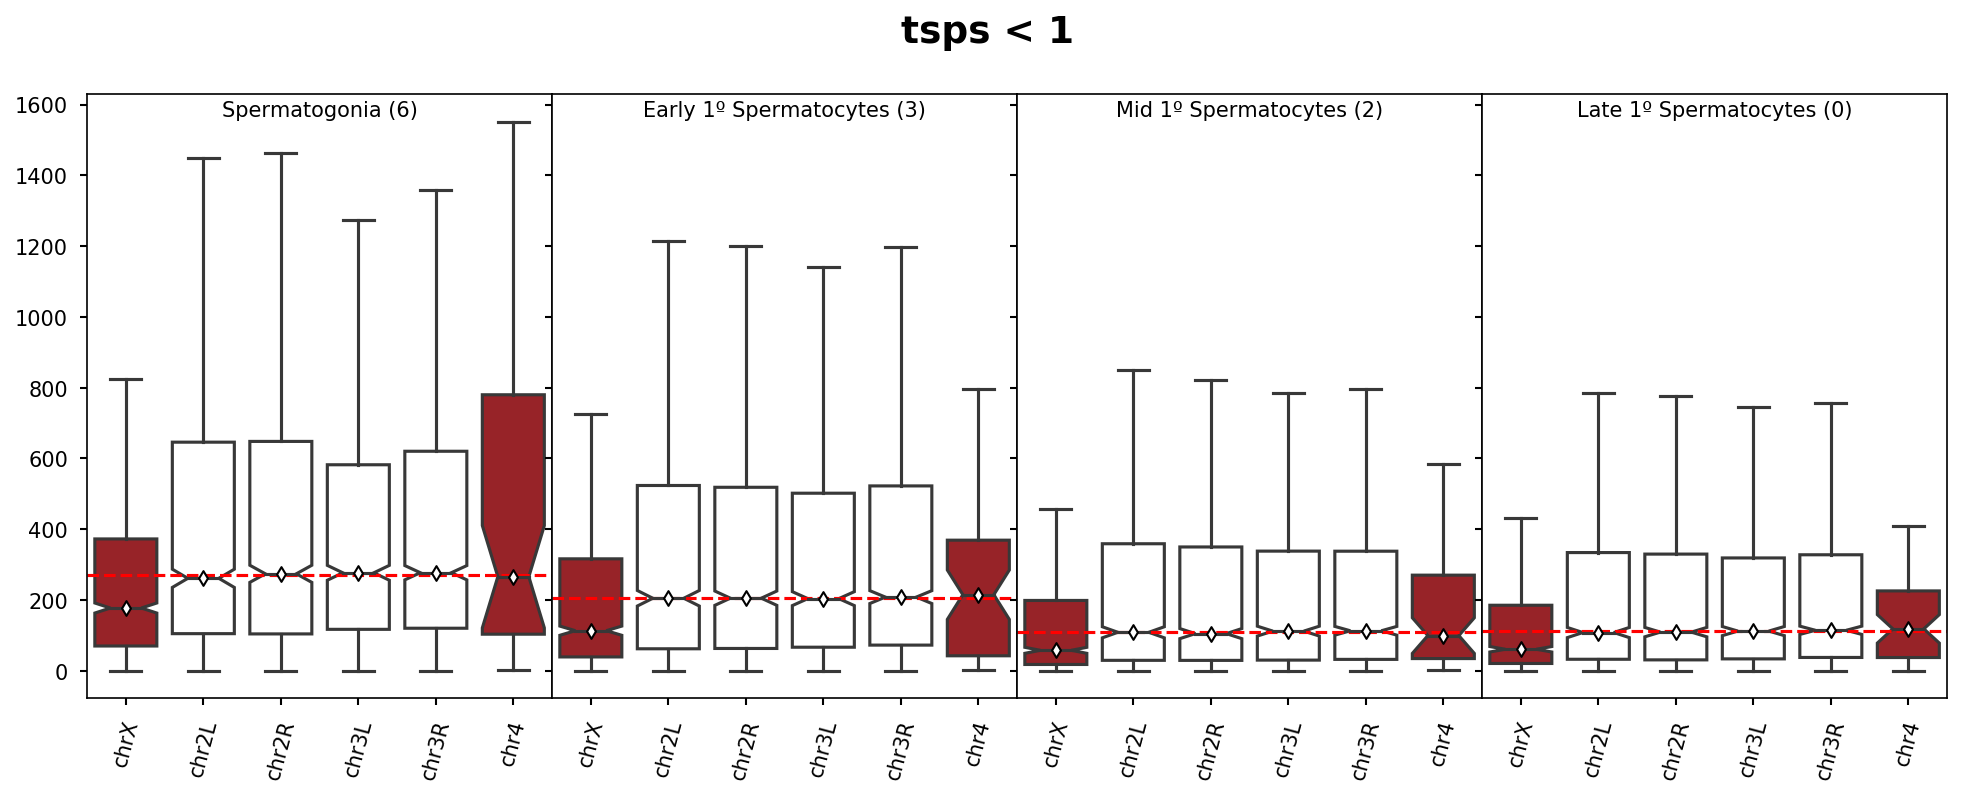

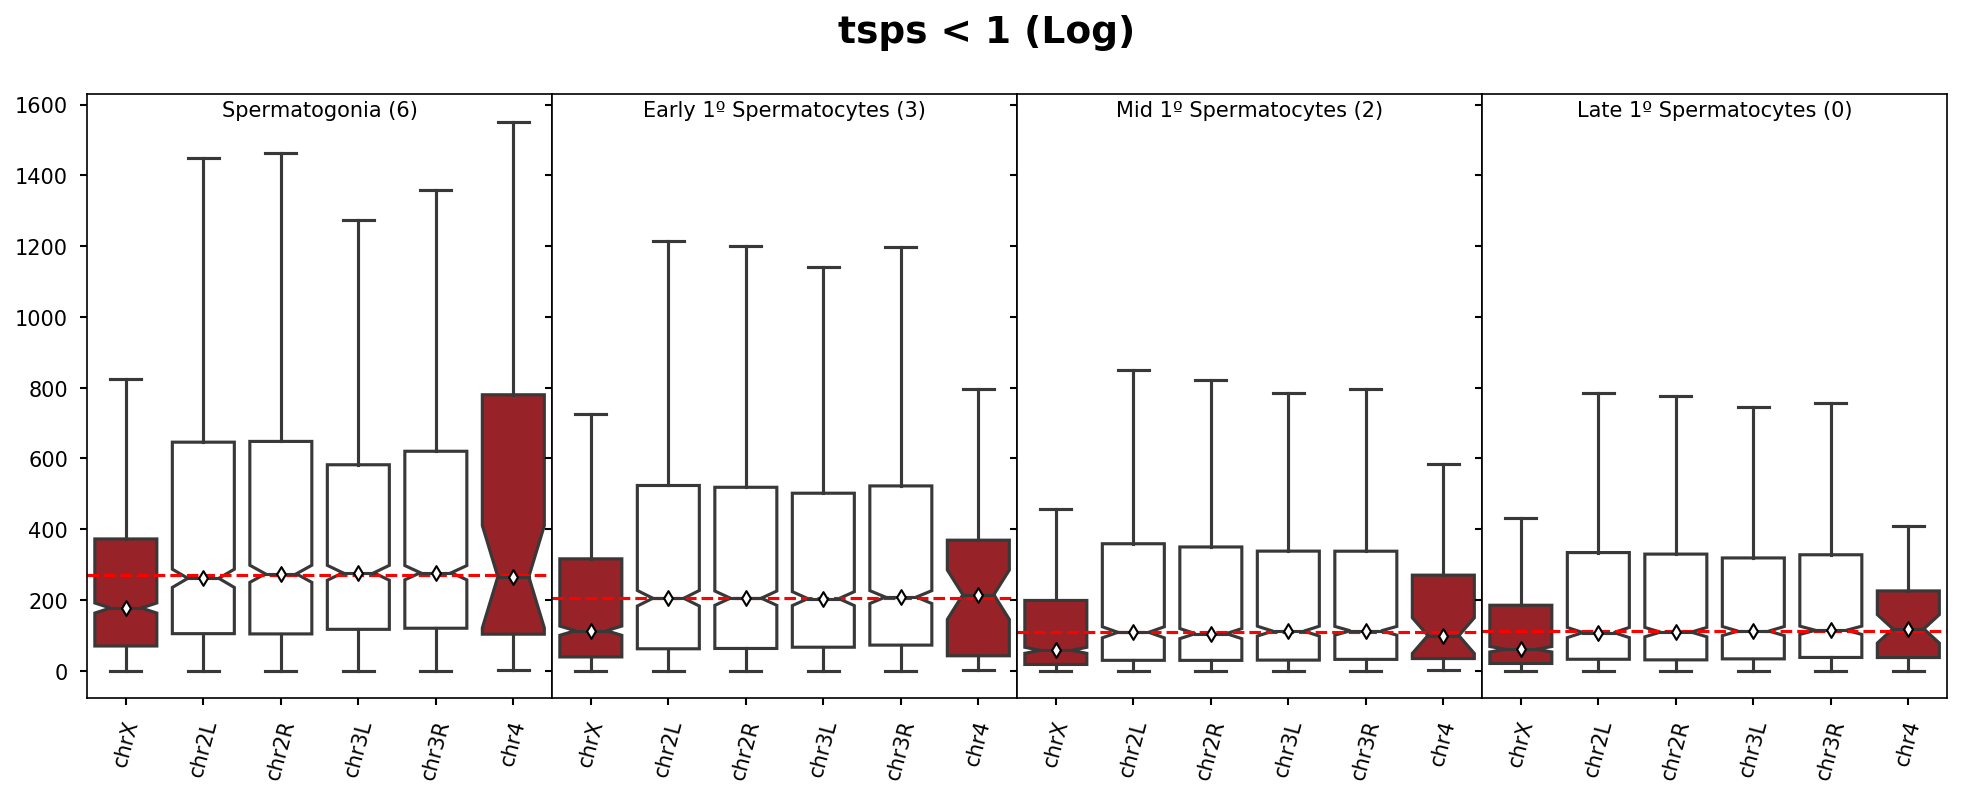

In [41]:
fig, axes = plt.subplots(1, 4, figsize=plt.figaspect(1/3), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
figLog, axesLog = plt.subplots(1, 4, figsize=plt.figaspect(1/3), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
for c, ax, axLog in zip([6, 3, 2, 0], axes.flatten(), axesLog.flatten()):
    cnts = agg_all('norm', seurat_dir=nbconfig.seurat_dir, cluster=c)
    data = cnts.to_frame().join(nbconfig.fbgn2chrom).loc[tsps_targets]
                        
    # Regular boxplot
    ax = fe_chrom_boxplot(c, data=data, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.text(0.5, .99, nbconfig.CLUSTER_ANNOT[c], ha='center', va='top', transform=ax.transAxes, fontsize=10)
                        
    # Log boxplot
    axLog = fe_chrom_boxplot(c, data=data, ax=axLog)
    axLog.set_xlabel('')
    axLog.set_ylabel('')
    axLog.text(0.5, .99, nbconfig.CLUSTER_ANNOT[c], ha='center', va='top', transform=axLog.transAxes, fontsize=10)
    
for ax in axes:
    for l in ax.get_xticklabels():
        l.set_rotation(75)
                        
fig.suptitle('tsps < 1')

for axLog in axesLog:
    for l in axLog.get_xticklabels():
        l.set_rotation(75)

figLog.suptitle('tsps < 1 (Log)')

## Ribosomal Genes

In [20]:
# FBgns generated looking up RIBOSOMAL PROTEINS gene group
fb_ribo = ['FBgn0000100', 'FBgn0001995', 'FBgn0002579', 'FBgn0002590', 'FBgn0002593', 'FBgn0002622', 'FBgn0002626', 'FBgn0003274', 'FBgn0003279', 'FBgn0003517',
'FBgn0003714', 'FBgn0003941', 'FBgn0003942', 'FBgn0004403', 'FBgn0004404', 'FBgn0004867', 'FBgn0005533', 'FBgn0005593', 'FBgn0010078', 'FBgn0010198',
'FBgn0010265', 'FBgn0010408', 'FBgn0010409', 'FBgn0010411', 'FBgn0010412', 'FBgn0011272', 'FBgn0011284', 'FBgn0011787', 'FBgn0013325', 'FBgn0014023',
'FBgn0014026', 'FBgn0015288', 'FBgn0015521', 'FBgn0015756', 'FBgn0016726', 'FBgn0017545', 'FBgn0017579', 'FBgn0019936', 'FBgn0020910', 'FBgn0023170',
'FBgn0023519', 'FBgn0024733', 'FBgn0026261', 'FBgn0026372', 'FBgn0026741', 'FBgn0027494', 'FBgn0028648', 'FBgn0028697', 'FBgn0029718', 'FBgn0029785',
'FBgn0029897', 'FBgn0030136', 'FBgn0030433', 'FBgn0030552', 'FBgn0030572', 'FBgn0030616', 'FBgn0030686', 'FBgn0030692', 'FBgn0030786', 'FBgn0031231',
'FBgn0031357', 'FBgn0031639', 'FBgn0031651', 'FBgn0031660', 'FBgn0031980', 'FBgn0032053', 'FBgn0032236', 'FBgn0032404', 'FBgn0032518', 'FBgn0032720',
'FBgn0032849', 'FBgn0032987', 'FBgn0033208', 'FBgn0033480', 'FBgn0033485', 'FBgn0033555', 'FBgn0033699', 'FBgn0033907', 'FBgn0033912', 'FBgn0034001',
'FBgn0034138', 'FBgn0034361', 'FBgn0034579', 'FBgn0034727', 'FBgn0034743', 'FBgn0034822', 'FBgn0034837', 'FBgn0034893', 'FBgn0034968', 'FBgn0034986',
'FBgn0035122', 'FBgn0035272', 'FBgn0035335', 'FBgn0035374', 'FBgn0035422', 'FBgn0035534', 'FBgn0035753', 'FBgn0036135', 'FBgn0036213', 'FBgn0036335',
'FBgn0036462', 'FBgn0036557', 'FBgn0036774', 'FBgn0036825', 'FBgn0036853', 'FBgn0036990', 'FBgn0037328', 'FBgn0037330', 'FBgn0037351', 'FBgn0037529',
'FBgn0037566', 'FBgn0037608', 'FBgn0037686', 'FBgn0037892', 'FBgn0037899', 'FBgn0038234', 'FBgn0038277', 'FBgn0038281', 'FBgn0038307', 'FBgn0038319',
'FBgn0038426', 'FBgn0038474', 'FBgn0038678', 'FBgn0038834', 'FBgn0038923', 'FBgn0039129', 'FBgn0039159', 'FBgn0039300', 'FBgn0039359', 'FBgn0039406',
'FBgn0039555', 'FBgn0039713', 'FBgn0039739', 'FBgn0039757', 'FBgn0039765', 'FBgn0039835', 'FBgn0039857', 'FBgn0040007', 'FBgn0040389', 'FBgn0040907',
'FBgn0042112', 'FBgn0044030', 'FBgn0044510', 'FBgn0044511', 'FBgn0050481', 'FBgn0051450', 'FBgn0053002', 'FBgn0064225', 'FBgn0066084', 'FBgn0083983',
'FBgn0085211', 'FBgn0086472', 'FBgn0086710', 'FBgn0260407', 'FBgn0261380', 'FBgn0261592', 'FBgn0261596', 'FBgn0261597', 'FBgn0261599', 'FBgn0261602',
'FBgn0261608', 'FBgn0263863', 'FBgn0285947', 'FBgn0285948', 'FBgn0285949', 'FBgn0285950', 'FBgn0285951', 'FBgn0286213',]

# Remove mitochondrial ribo
ribo_genes = []
for fb in fb_ribo:
    try:
        symbol = nbconfig.fbgn2symbol[fb]
    except KeyError:
        continue
        
    if symbol.startswith('mRp') | (symbol == 'bonsai') | (symbol == 'tko'):
        continue
        
    ribo_genes.append(fb)

92


In [36]:
_df = nbconfig.fbgn2chrom[nbconfig.fbgn2chrom.index.isin(ribo_genes)].chrom.value_counts().to_frame()
_df.columns = ['Number of Gene']
_df.index.name = 'chrom'
_df

Number of Gene
chrom                
chr3R              23
chr2R              21
chr2L              19
chrX               15
chr3L              13
chr4                1

92


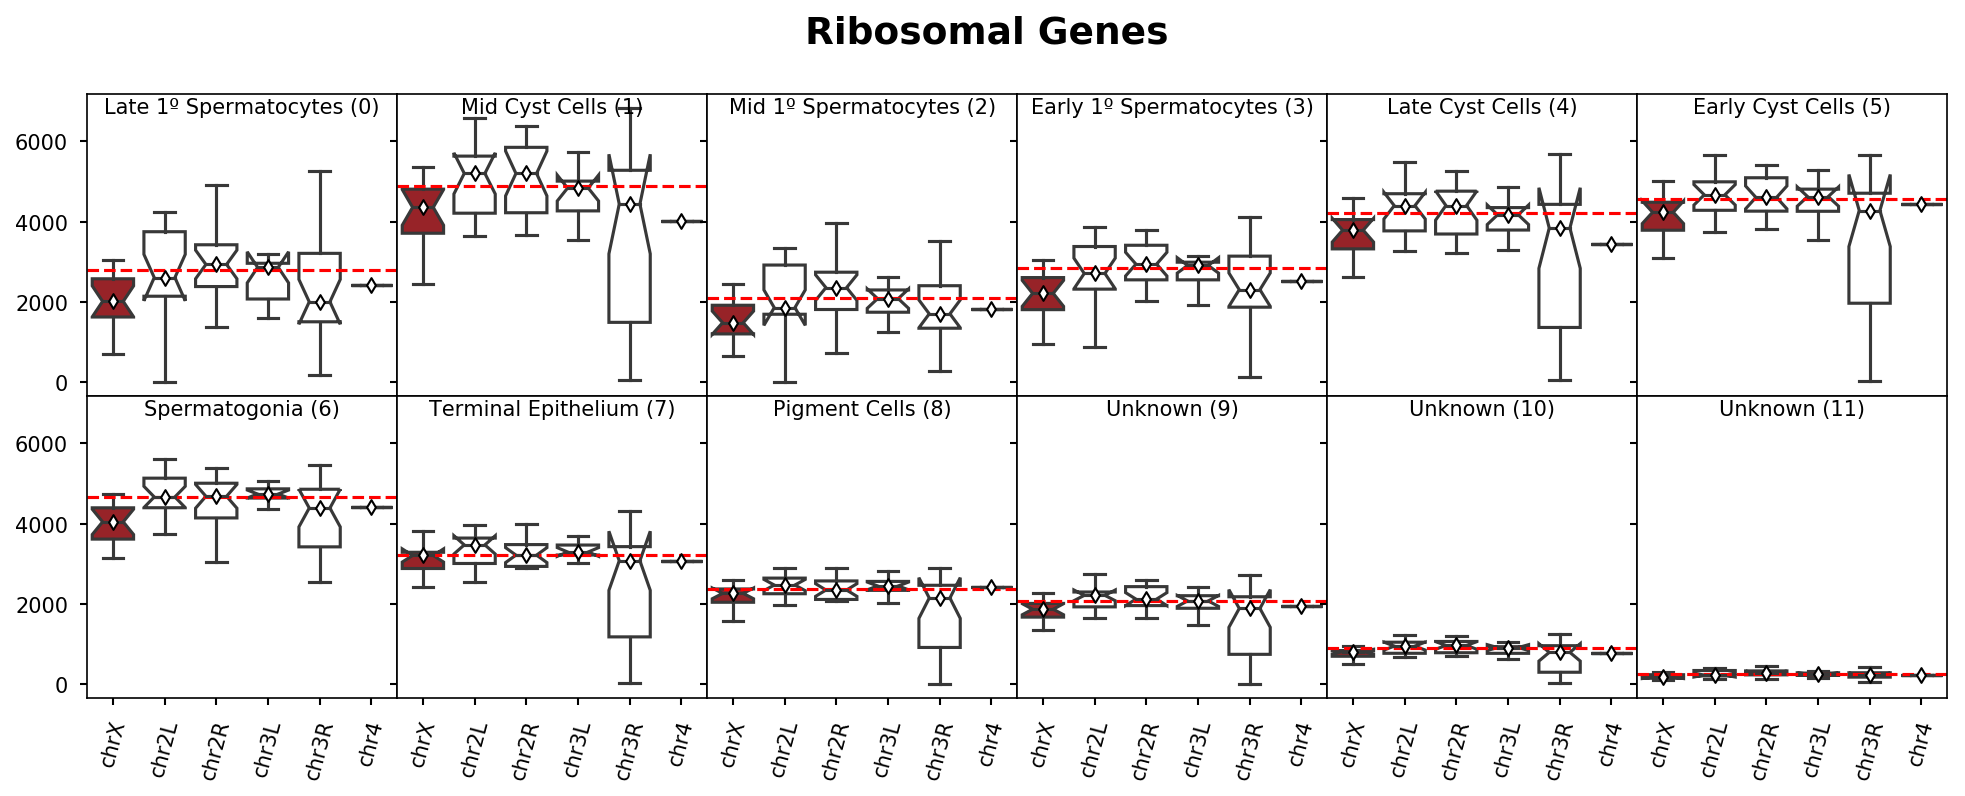

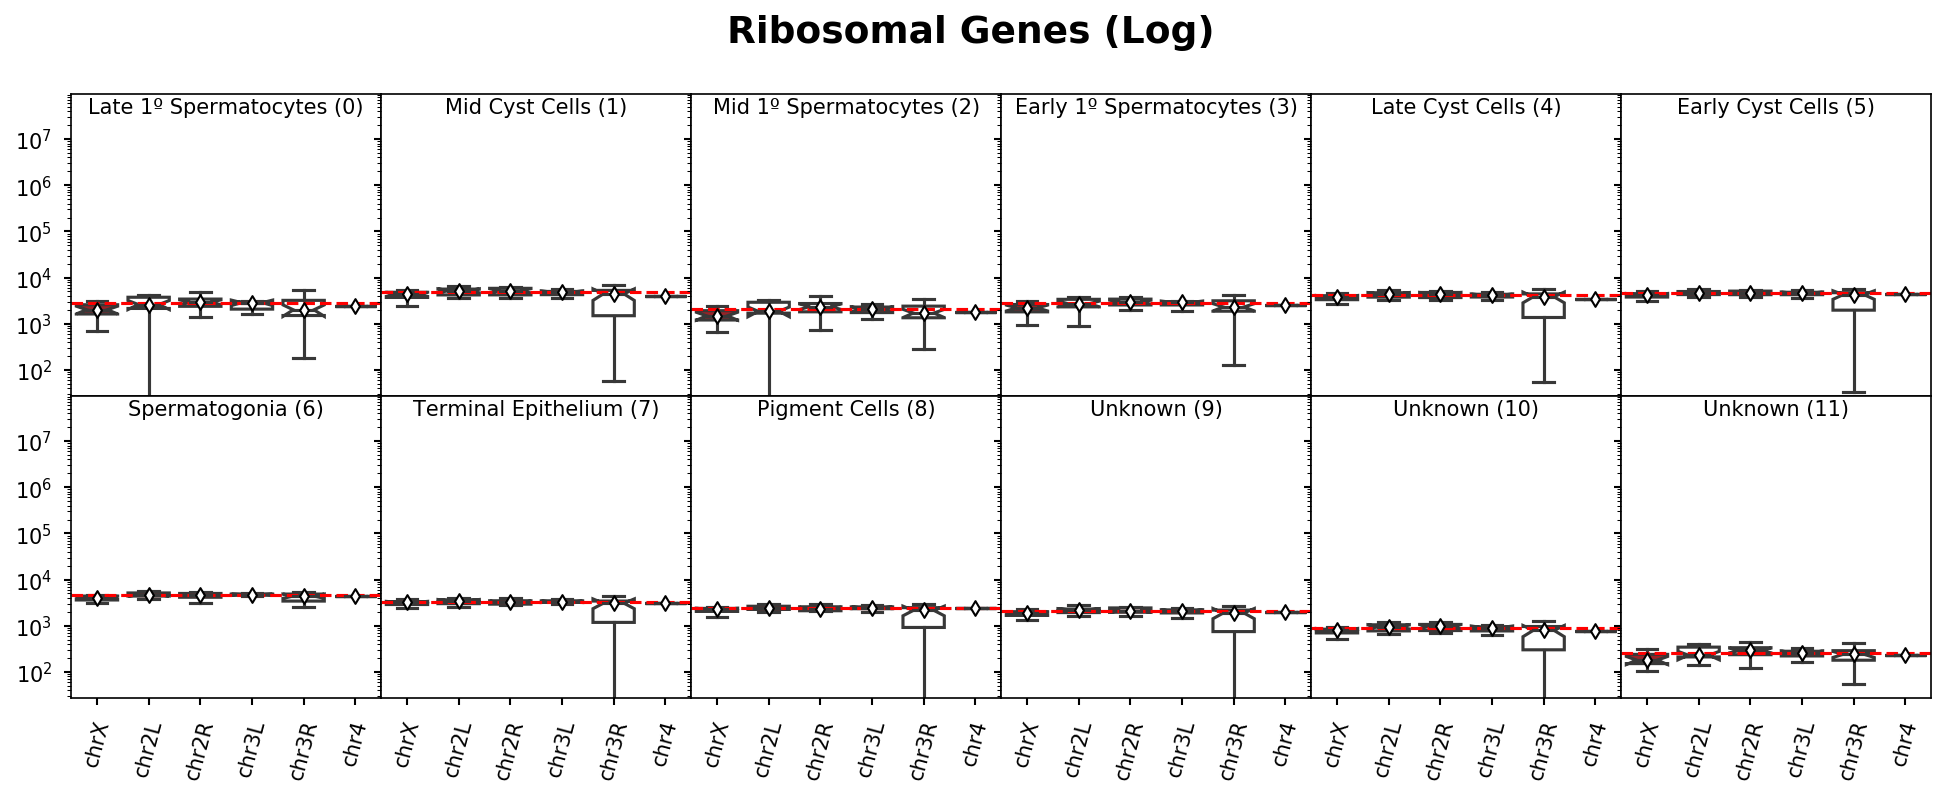

In [26]:
norm = norm_data(nbconfig.seurat_dir)
ribo_targets = norm.index[norm.index.isin(ribo_genes)].tolist()
print(len(ribo_targets))

fig, axes = plt.subplots(2, 6, figsize=plt.figaspect(1/3), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
figLog, axesLog = plt.subplots(2, 6, figsize=plt.figaspect(1/3), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
_xtoa = []
_pvals = []
_pvalsSample = []
for c, ax, axLog in zip(range(12), axes.flatten(), axesLog.flatten()):
    cnts = agg_all('norm', seurat_dir=nbconfig.seurat_dir, cluster=c)
    data = cnts.to_frame().join(nbconfig.fbgn2chrom).loc[ribo_targets]
                        
    # Regular boxplot
    ax = fe_chrom_boxplot(c, data=data, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.text(0.5, .99, nbconfig.CLUSTER_ANNOT[c], ha='center', va='top', transform=ax.transAxes, fontsize=10)
                        
    # Log boxplot
    axLog = fe_chrom_boxplot(c, data=data, ax=axLog)
    axLog.set_yscale('log')
    axLog.set_xlabel('')
    axLog.set_ylabel('')
    axLog.text(0.5, .99, nbconfig.CLUSTER_ANNOT[c], ha='center', va='top', transform=axLog.transAxes, fontsize=10)
                        
    # Chrom to A ratios
    _df = x_to_a(c, data=data)
    _df.columns = [c]
    _xtoa.append(_df)
 
    # P-values for Chrom : A comparison
    _pvals.append(mann_whitney_by_arm(c, data=data))
    _pvalsSample.append(mann_whitney_by_arm(c, data=data, sample=True))
                        
for ax in axes[1, :]:
    for l in ax.get_xticklabels():
        l.set_rotation(75)
        
fig.suptitle('Ribosomal Genes')
                        
for axLog in axesLog[1, :]:
    for l in axLog.get_xticklabels():
        l.set_rotation(75)
                        
figLog.suptitle('Ribosomal Genes (Log)')

df_xtoa = pd.concat(_xtoa, axis=1)
df_pvals = pd.concat(_pvals)
df_pvalsSample = pd.concat(_pvalsSample)

In [27]:
df_xtoa

0         1         2         3         4         5         6   \
chrom                                                                         
chrX   0.717647  0.893365  0.704074  0.776288  0.900514  0.930054  0.865993   
chr2L  0.928513  1.066739  0.882160  0.949920  1.045820  1.025517  0.998725   
chr2R  1.044992  1.066383  1.118397  1.031434  1.046461  1.011347  1.002230   
chr3L  1.019471  0.992115  0.988542  1.020031  0.991678  1.015905  1.014339   
chr3R  0.713544  0.910348  0.808830  0.808590  0.913210  0.939640  0.939729   
chr4   0.859514  0.821845  0.866412  0.882017  0.820404  0.976273  0.944760   

             7         8         9         10        11  
chrom                                                    
chrX   0.995721  0.949912  0.906618  0.897276  0.702393  
chr2L  1.077620  1.037139  1.073874  1.049558  0.899276  
chr2R  0.998543  0.985057  1.028665  1.067330  1.142670  
chr3L  1.022848  1.027573  1.006535  1.009064  1.012119  
chr3R  0.954792  0.901682  0.915889  0.877010  0.940039  
chr4   0.954920  1.021375  0.943357  0.852343  0.921288

In [28]:
df_pvals.loc[[6, 3, 2, 0], ['chrX', 'chr4', 'chr2L']]

chrX      chr4     chr2L
cluster                              
6        0.001213  0.302435  0.742582
3        0.003038  0.302435  0.695589
2        0.007701  0.402277  0.708489
0        0.006840  0.367892  0.717993

In [29]:
df_pvalsSample.loc[[6, 3, 2, 0], ['chrX', 'chr4', 'chr2L']]

chrX     chr4     chr2L
cluster                             
6        0.000180  0.50000  0.289488
3        0.001073  0.97725  0.374011
2        0.002397  0.97725  0.430451
0        0.002726  0.97725  0.396337

Text(0.5,0.98,'Ribosomal Genes (Log)')

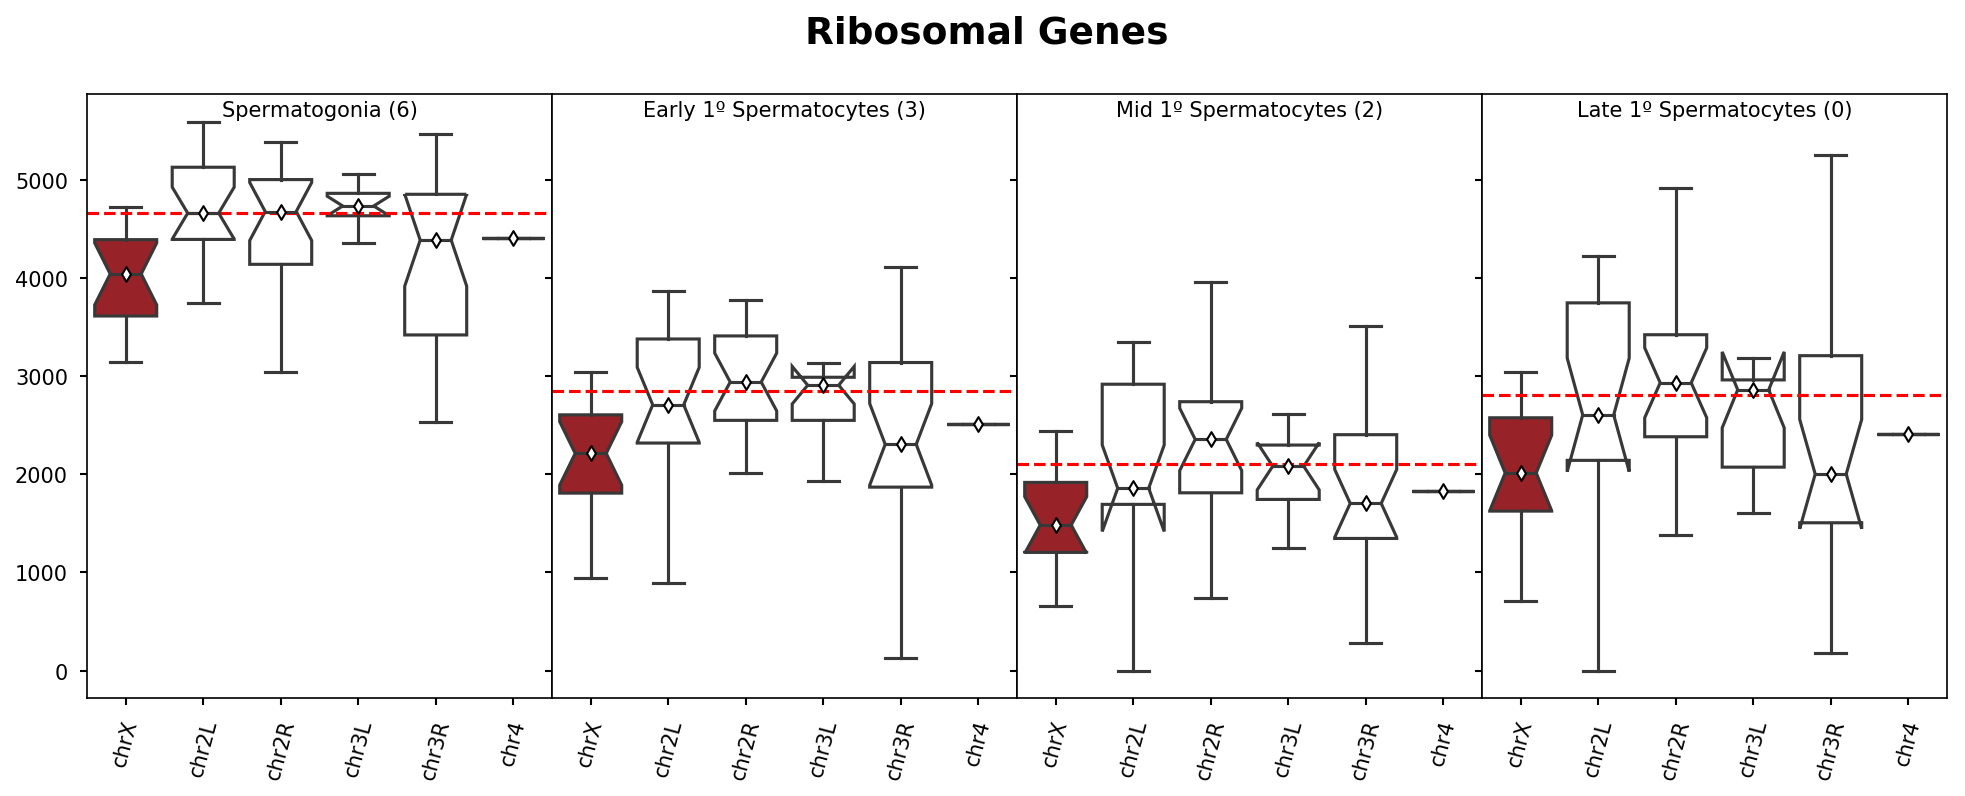

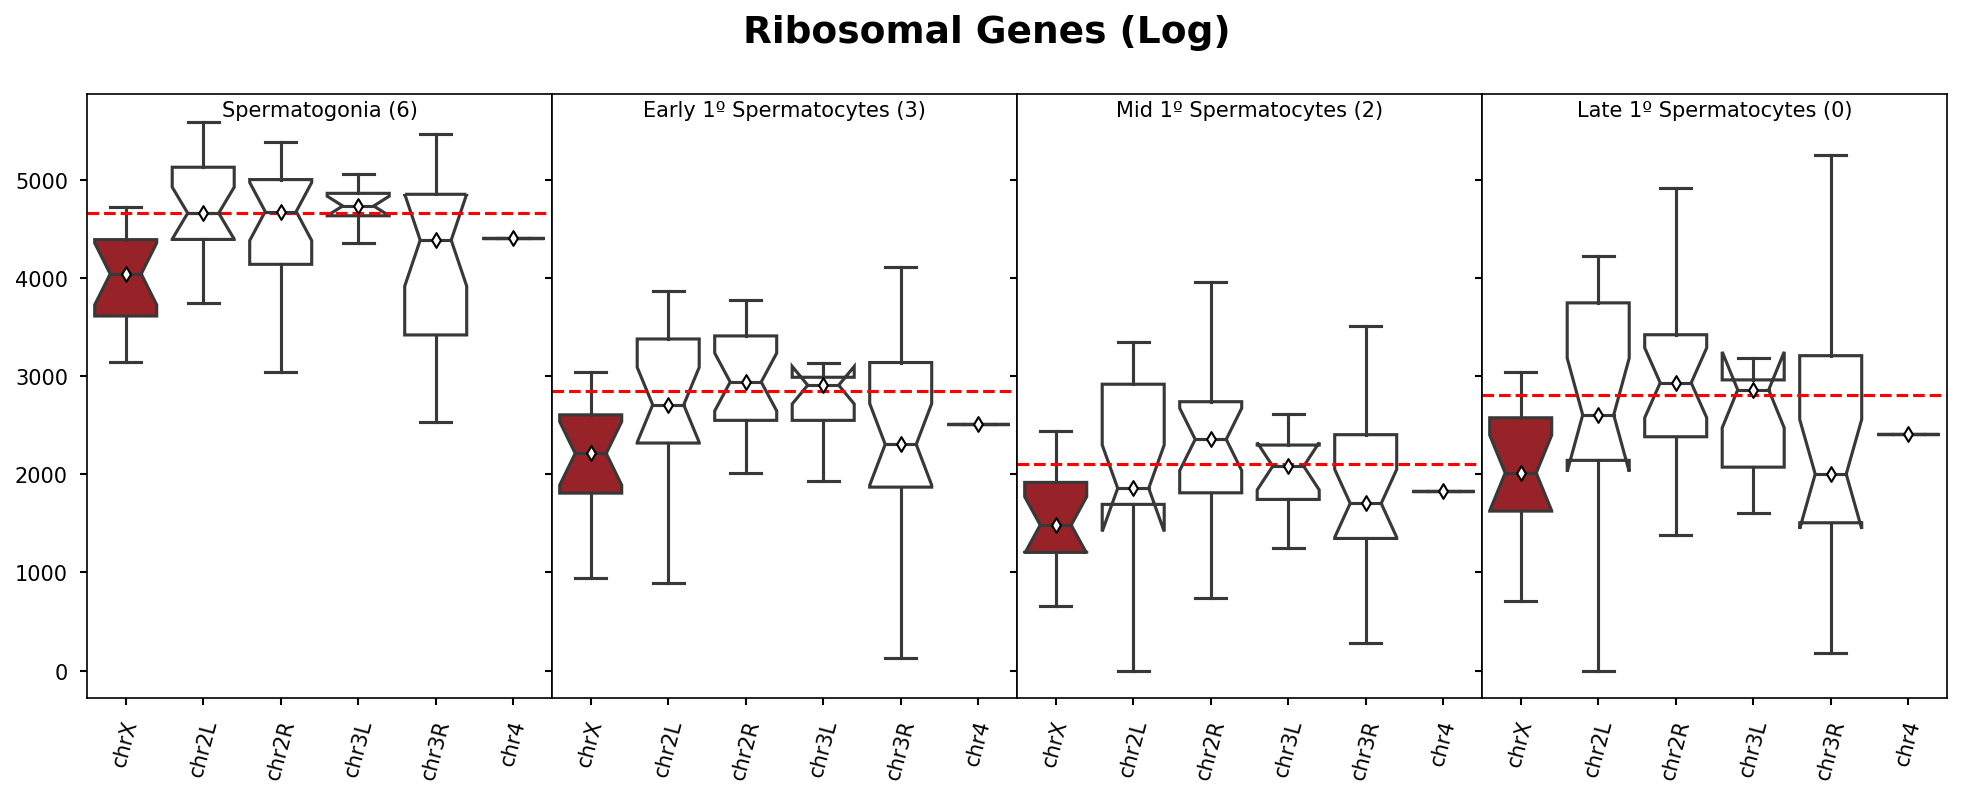

In [30]:
fig, axes = plt.subplots(1, 4, figsize=plt.figaspect(1/3), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
figLog, axesLog = plt.subplots(1, 4, figsize=plt.figaspect(1/3), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
for c, ax, axLog in zip([6, 3, 2, 0], axes.flatten(), axesLog.flatten()):
    cnts = agg_all('norm', seurat_dir=nbconfig.seurat_dir, cluster=c)
    data = cnts.to_frame().join(nbconfig.fbgn2chrom).loc[ribo_targets]
                        
    # Regular boxplot
    ax = fe_chrom_boxplot(c, data=data, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.text(0.5, .99, nbconfig.CLUSTER_ANNOT[c], ha='center', va='top', transform=ax.transAxes, fontsize=10)
                        
    # Log boxplot
    axLog = fe_chrom_boxplot(c, data=data, ax=axLog)
    axLog.set_xlabel('')
    axLog.set_ylabel('')
    axLog.text(0.5, .99, nbconfig.CLUSTER_ANNOT[c], ha='center', va='top', transform=axLog.transAxes, fontsize=10)
    
for ax in axes:
    for l in ax.get_xticklabels():
        l.set_rotation(75)
                        
fig.suptitle('Ribosomal Genes')

for axLog in axesLog:
    for l in axLog.get_xticklabels():
        l.set_rotation(75)

figLog.suptitle('Ribosomal Genes (Log)')

## Proteosome

In [37]:
# FBgns generated looking up PROTEASOME SUBUNITS gene group
fb_proteo = [
    'FBgn0050382', 'FBgn0263121', 'FBgn0086134', 'FBgn0261394', 'FBgn0261395', 'FBgn0004066', 'FBgn0265606', 'FBgn0017556', 'FBgn0016697', 'FBgn0250843',
    'FBgn0032492', 'FBgn0023175', 'FBgn0010590', 'FBgn0023174', 'FBgn0029812', 'FBgn0037296', 'FBgn0026380', 'FBgn0032596', 'FBgn0031442', 'FBgn0031443',
    'FBgn0029134', 'FBgn0034842', 'FBgn0002284', 'FBgn0250746', 'FBgn0028695', 'FBgn0028692', 'FBgn0261396', 'FBgn0028690', 'FBgn0028689', 'FBgn0028688',
    'FBgn0002787', 'FBgn0028691', 'FBgn0015283', 'FBgn0028694', 'FBgn0028693', 'FBgn0036465', 'FBgn0028687', 'FBgn0015282', 'FBgn0028686', 'FBgn0037742',
    'FBgn0028685', 'FBgn0036224', 'FBgn0028684', 'FBgn0020369', 'FBgn0039788', 'FBgn0029745', 'FBgn0051742', 'FBgn0011327', 'FBgn0030370', 'FBgn0033886',
]

In [41]:
_df = nbconfig.fbgn2chrom[nbconfig.fbgn2chrom.index.isin(fb_proteo)].chrom.value_counts().to_frame()
_df.columns = ['Number of Gene']
_df.index.name = 'chrom'
_df

Number of Gene
chrom                
chr3R              14
chr2R              13
chr2L               8
chr3L               8
chrX                7

49


/data/fearjm/Projects/larval_gonad/larval_gonad/x_to_a.py:529: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  med_by_chrom = data.groupby('chrom').median().loc[CHROMS_CHR[:-1]].reset_index()
/data/fearjm/Projects/larval_gonad/larval_gonad/x_to_a.py:56: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  med_by_chrom = data.groupby('chrom').median().loc[CHROMS_CHR[:-1]]


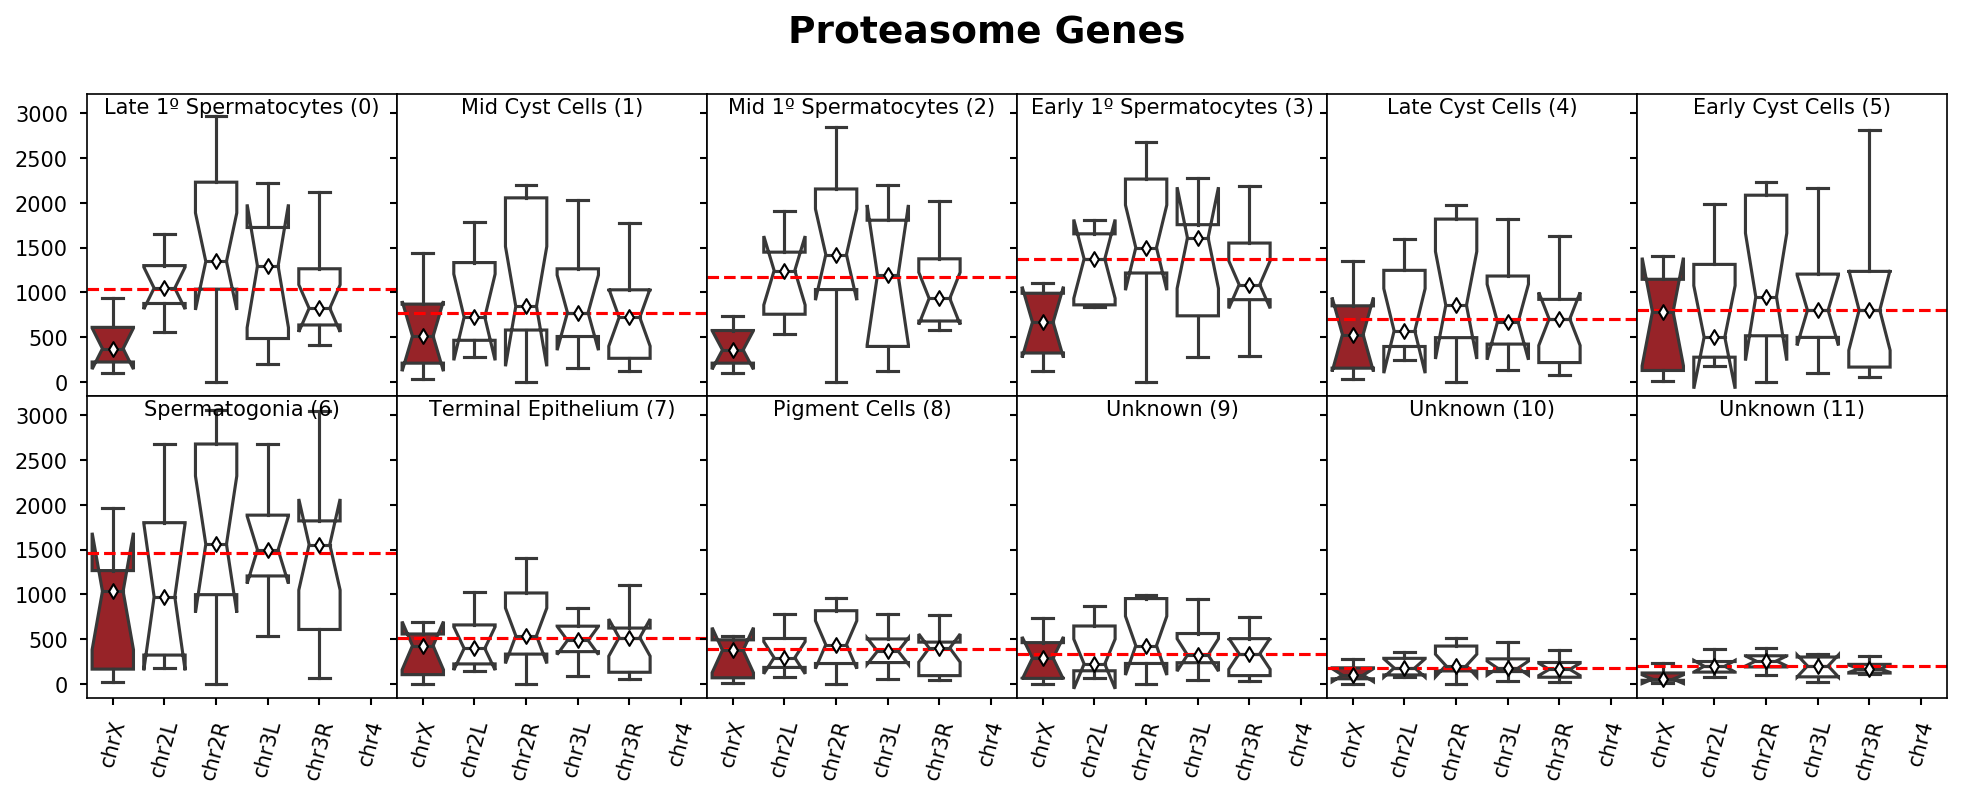

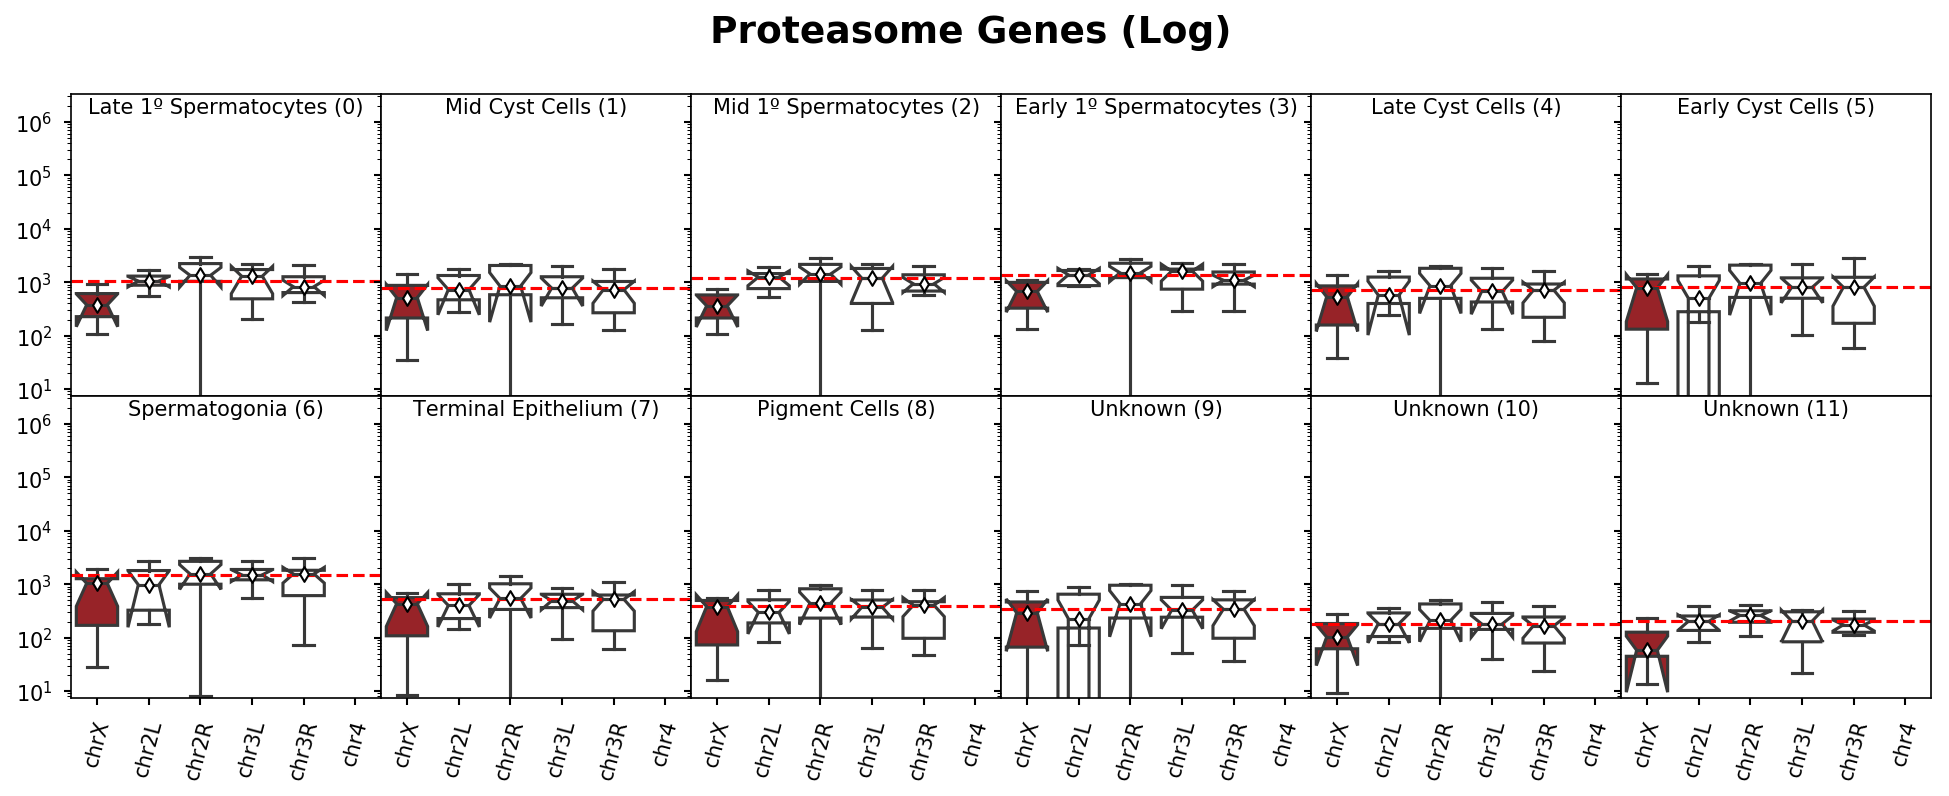

In [42]:
norm = norm_data(nbconfig.seurat_dir)
proteo_targets = norm.index[norm.index.isin(fb_proteo)].tolist()
print(len(proteo_targets))

fig, axes = plt.subplots(2, 6, figsize=plt.figaspect(1/3), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
figLog, axesLog = plt.subplots(2, 6, figsize=plt.figaspect(1/3), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
_xtoa = []
_pvals = []
_pvalsSample = []
for c, ax, axLog in zip(range(12), axes.flatten(), axesLog.flatten()):
    cnts = agg_all('norm', seurat_dir=nbconfig.seurat_dir, cluster=c)
    data = cnts.to_frame().join(nbconfig.fbgn2chrom).loc[proteo_targets]
                        
    # Regular boxplot
    ax = fe_chrom_boxplot(c, data=data, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.text(0.5, .99, nbconfig.CLUSTER_ANNOT[c], ha='center', va='top', transform=ax.transAxes, fontsize=10)
                        
    # Log boxplot
    axLog = fe_chrom_boxplot(c, data=data, ax=axLog)
    axLog.set_yscale('log')
    axLog.set_xlabel('')
    axLog.set_ylabel('')
    axLog.text(0.5, .99, nbconfig.CLUSTER_ANNOT[c], ha='center', va='top', transform=axLog.transAxes, fontsize=10)
                        
    # Chrom to A ratios
    _df = x_to_a(c, data=data)
    _df.columns = [c]
    _xtoa.append(_df)
 
    # P-values for Chrom : A comparison
    _pvals.append(mann_whitney_by_arm(c, data=data))
    _pvalsSample.append(mann_whitney_by_arm(c, data=data, sample=True))
                        
for ax in axes[1, :]:
    for l in ax.get_xticklabels():
        l.set_rotation(75)
        
fig.suptitle('Proteasome Genes')
                        
for axLog in axesLog[1, :]:
    for l in axLog.get_xticklabels():
        l.set_rotation(75)
                        
figLog.suptitle('Proteasome Genes (Log)')

df_xtoa = pd.concat(_xtoa, axis=1)
df_pvals = pd.concat(_pvals)
df_pvalsSample = pd.concat(_pvalsSample)

In [43]:
df_xtoa

0         1         2         3         4         5         6   \
chrom                                                                         
chrX   0.360238  0.669624  0.306519  0.487465  0.757982  0.980466  0.707127   
chr2L  1.006136  0.944765  1.057776  1.000000  0.816297  0.627447  0.664713   
chr2R  1.290987  1.101402  1.208883  1.091561  1.223117  1.186940  1.063798   
chr3L  1.241803  1.010638  1.015470  1.171150  0.957679  1.001291  1.021700   
chr3R  0.790487  0.941449  0.793803  0.791851  1.006112  1.002695  1.061761   
chr4        NaN       NaN       NaN       NaN       NaN       NaN       NaN   

             7         8         9         10        11  
chrom                                                    
chrX   0.827182  0.960838  0.857556  0.563954  0.283099  
chr2L  0.767839  0.748548  0.667198  1.005587  0.985242  
chr2R  1.039772  1.115320  1.266568  1.154713  1.271635  
chr3L  0.939319  0.932928  0.961046  0.995479  1.001248  
chr3R  1.000000  1.020363  1.000000  0.917717  0.847130  
chr4        NaN       NaN       NaN       NaN       NaN

In [44]:
df_pvals.loc[[6, 3, 2, 0], ['chrX', 'chr4', 'chr2L']]

/home/fearjm/miniconda3/envs/larval_gonad/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  if __name__ == '__main__':


chrX  chr4     chr2L
cluster                          
6        0.034817   NaN  0.241527
3        0.002915   NaN  0.380419
2        0.001703   NaN  0.463096
0        0.001172   NaN  0.494721

In [45]:
df_pvalsSample.loc[[6, 3, 2, 0], ['chrX', 'chr4', 'chr2L']]

/home/fearjm/miniconda3/envs/larval_gonad/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  if __name__ == '__main__':


chrX  chr4     chr2L
cluster                          
6        0.079932   NaN  0.376269
3        0.014921   NaN  0.172104
2        0.007597   NaN  0.299621
0        0.007597   NaN  0.230960

/data/fearjm/Projects/larval_gonad/larval_gonad/x_to_a.py:529: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  med_by_chrom = data.groupby('chrom').median().loc[CHROMS_CHR[:-1]].reset_index()


Text(0.5,0.98,'Proteasome Genes (Log)')

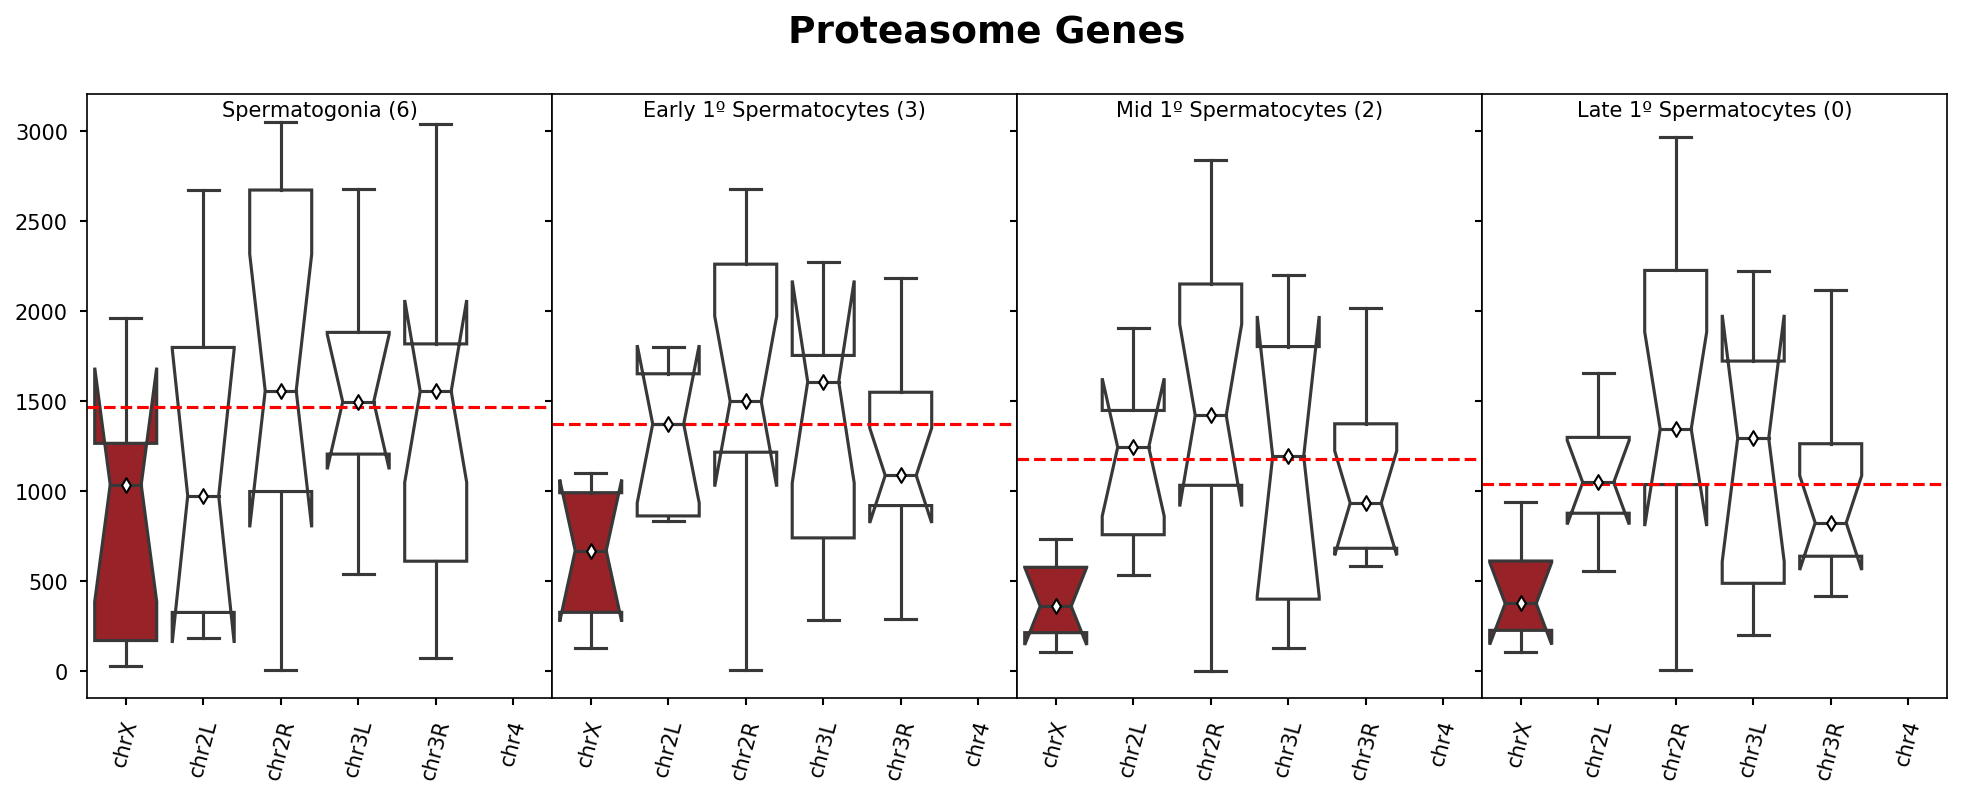

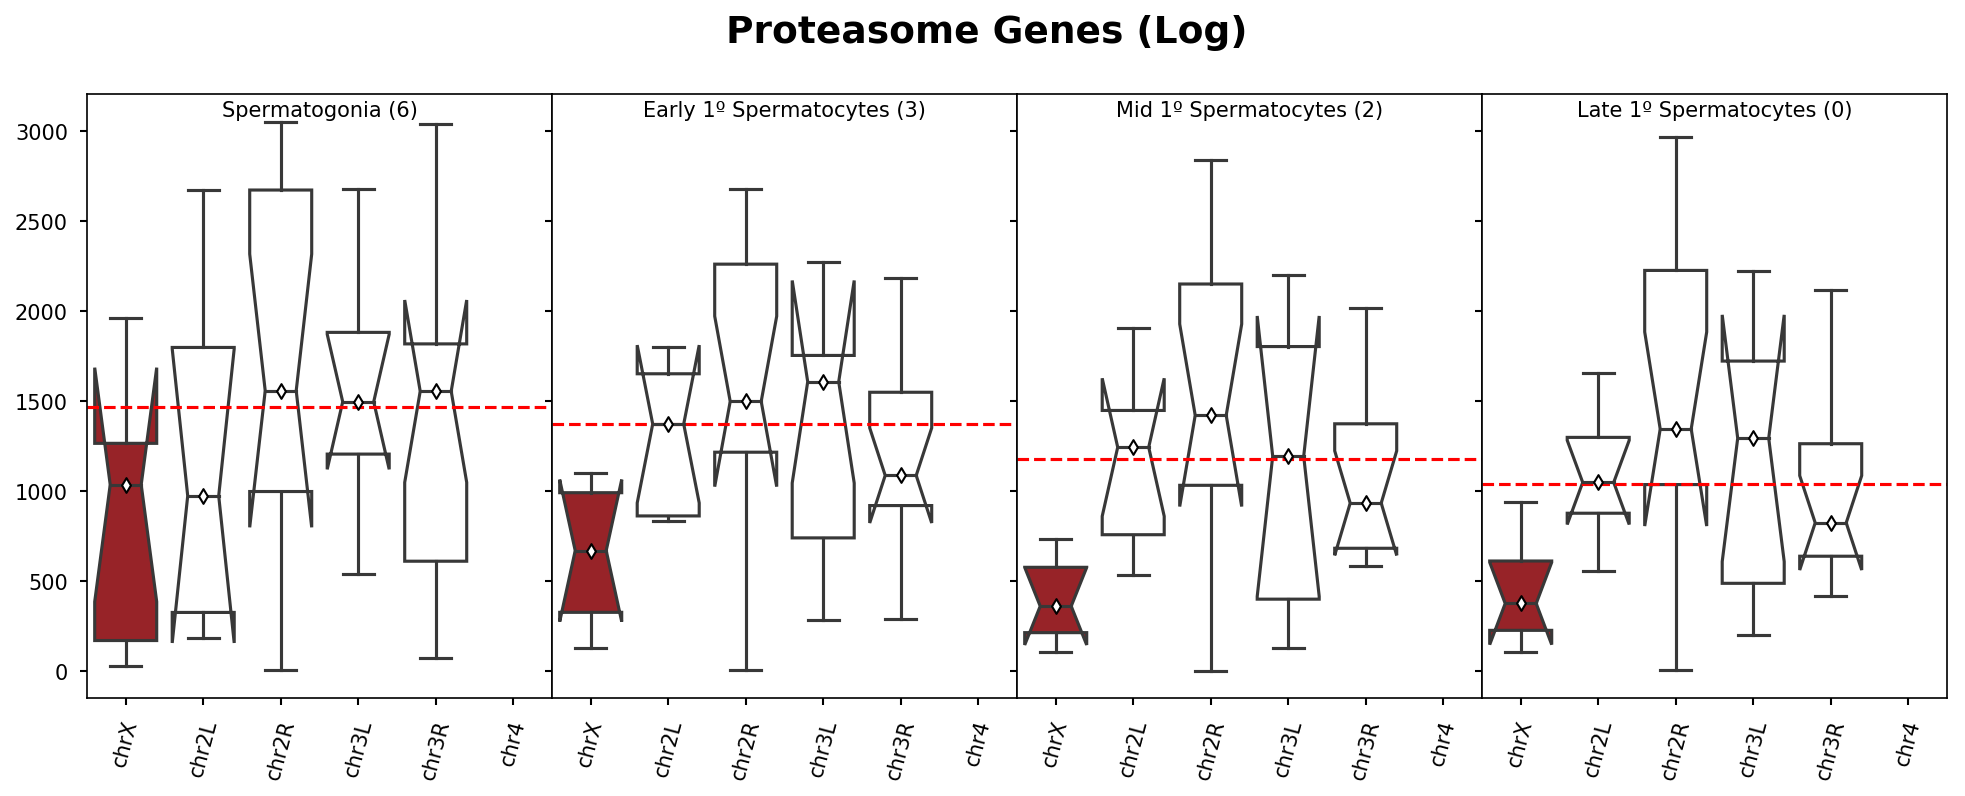

In [46]:
fig, axes = plt.subplots(1, 4, figsize=plt.figaspect(1/3), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
figLog, axesLog = plt.subplots(1, 4, figsize=plt.figaspect(1/3), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
for c, ax, axLog in zip([6, 3, 2, 0], axes.flatten(), axesLog.flatten()):
    cnts = agg_all('norm', seurat_dir=nbconfig.seurat_dir, cluster=c)
    data = cnts.to_frame().join(nbconfig.fbgn2chrom).loc[proteo_targets]
                        
    # Regular boxplot
    ax = fe_chrom_boxplot(c, data=data, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.text(0.5, .99, nbconfig.CLUSTER_ANNOT[c], ha='center', va='top', transform=ax.transAxes, fontsize=10)
                        
    # Log boxplot
    axLog = fe_chrom_boxplot(c, data=data, ax=axLog)
    axLog.set_xlabel('')
    axLog.set_ylabel('')
    axLog.text(0.5, .99, nbconfig.CLUSTER_ANNOT[c], ha='center', va='top', transform=axLog.transAxes, fontsize=10)
    
for ax in axes:
    for l in ax.get_xticklabels():
        l.set_rotation(75)
                        
fig.suptitle('Proteasome Genes')

for axLog in axesLog:
    for l in axLog.get_xticklabels():
        l.set_rotation(75)

figLog.suptitle('Proteasome Genes (Log)')

## Spliceosome

In [47]:
# FBgns generated looking up SPLICEOSOMAL COMPLEXES gene group
fb = [
    'FBgn0016978', 'FBgn0003449', 'FBgn0261792', 'FBgn0003916', 'FBgn0004183', 'FBgn0004185', 'FBgn0004186', 'FBgn0004187', 'FBgn0031492', 'FBgn0028474',
    'FBgn0262601', 'FBgn0261933', 'FBgn0261789', 'FBgn0023167', 'FBgn0261790', 'FBgn0000426', 'FBgn0261791', 'FBgn0033210', 'FBgn0266917', 'FBgn0036314',
    'FBgn0014366', 'FBgn0031266', 'FBgn0031493', 'FBgn0035162', 'FBgn0015818', 'FBgn0035692', 'FBgn0031822', 'FBgn0040534', 'FBgn0003922', 'FBgn0004191',
    'FBgn0041720', 'FBgn0004192', 'FBgn0003923', 'FBgn0003920', 'FBgn0036733', 'FBgn0036915', 'FBgn0033089', 'FBgn0036487', 'FBgn0015393', 'FBgn0041719',
    'FBgn0003931', 'FBgn0003930', 'FBgn0004188', 'FBgn0004189', 'FBgn0004190', 'FBgn0033688', 'FBgn0263599', 'FBgn0039566', 'FBgn0036828', 'FBgn0032690',
    'FBgn0032250', 'FBgn0031229', 'FBgn0031601', 'FBgn0003935', 'FBgn0003938', 'FBgn0003933', 'FBgn0003934', 'FBgn0003936', 'FBgn0043022', 'FBgn0043021',
    'FBgn0032240', 'FBgn0036277', 'FBgn0034564', 'FBgn0261068', 'FBgn0051184', 'FBgn0035271', 'FBgn0032388', 'FBgn0030969', 'FBgn0035675', 'FBgn0005411',
    'FBgn0025571', 'FBgn0028577', 'FBgn0033160', 'FBgn0004237', 'FBgn0031318', 'FBgn0051550', 'FBgn0034572', 'FBgn0030631', 'FBgn0031319', 'FBgn0261872',
    'FBgn0039977', 'FBgn0017457', 'FBgn0263396', 'FBgn0001215', 'FBgn0086683', 'FBgn0039271', 'FBgn0028932', 'FBgn0037644', 'FBgn0027617', 'FBgn0031631',
    'FBgn0031603', 'FBgn0037220', 'FBgn0031114', 'FBgn0015331', 'FBgn0035141', 'FBgn0038772', 'FBgn0037550', 'FBgn0002736', 'FBgn0035027', 'FBgn0023506',
    'FBgn0033859', 'FBgn0033527', 'FBgn0039210', 'FBgn0004856', 'FBgn0024491', 'FBgn0051368', 'FBgn0086444', 'FBgn0039732', 'FBgn0038927', 'FBgn0036207',
    'FBgn0086707', 'FBgn0037809', 'FBgn0001491', 'FBgn0039557', 'FBgn0028382', 'FBgn0039626', 'FBgn0000377', 'FBgn0030915', 'FBgn0039943', 'FBgn0013435',
    'FBgn0033378', 'FBgn0261119', 'FBgn0033556', 'FBgn0037573', 'FBgn0001216', 'FBgn0043455', 'FBgn0027784', 'FBgn0036386', 'FBgn0028897', 'FBgn0039558',
    'FBgn0038454', 'FBgn0086895', 'FBgn0030365', 'FBgn0265574', 'FBgn0028919', 'FBgn0035254', 'FBgn0032822', 'FBgn0040235', 'FBgn0037660', 'FBgn0035520',
    'FBgn0024998', 'FBgn0050342', 'FBgn0038666', 'FBgn0024191', 'FBgn0035294', 'FBgn0031287',
]

In [48]:
_df = nbconfig.fbgn2chrom[nbconfig.fbgn2chrom.index.isin(fb)].chrom.value_counts().to_frame()
_df.columns = ['Number of Gene']
_df.index.name = 'chrom'
_df

Number of Gene
chrom                
chr2L              43
chr3R              41
chr3L              24
chr2R              19
chrX               19

126


/data/fearjm/Projects/larval_gonad/larval_gonad/x_to_a.py:529: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  med_by_chrom = data.groupby('chrom').median().loc[CHROMS_CHR[:-1]].reset_index()
/data/fearjm/Projects/larval_gonad/larval_gonad/x_to_a.py:56: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  med_by_chrom = data.groupby('chrom').median().loc[CHROMS_CHR[:-1]]


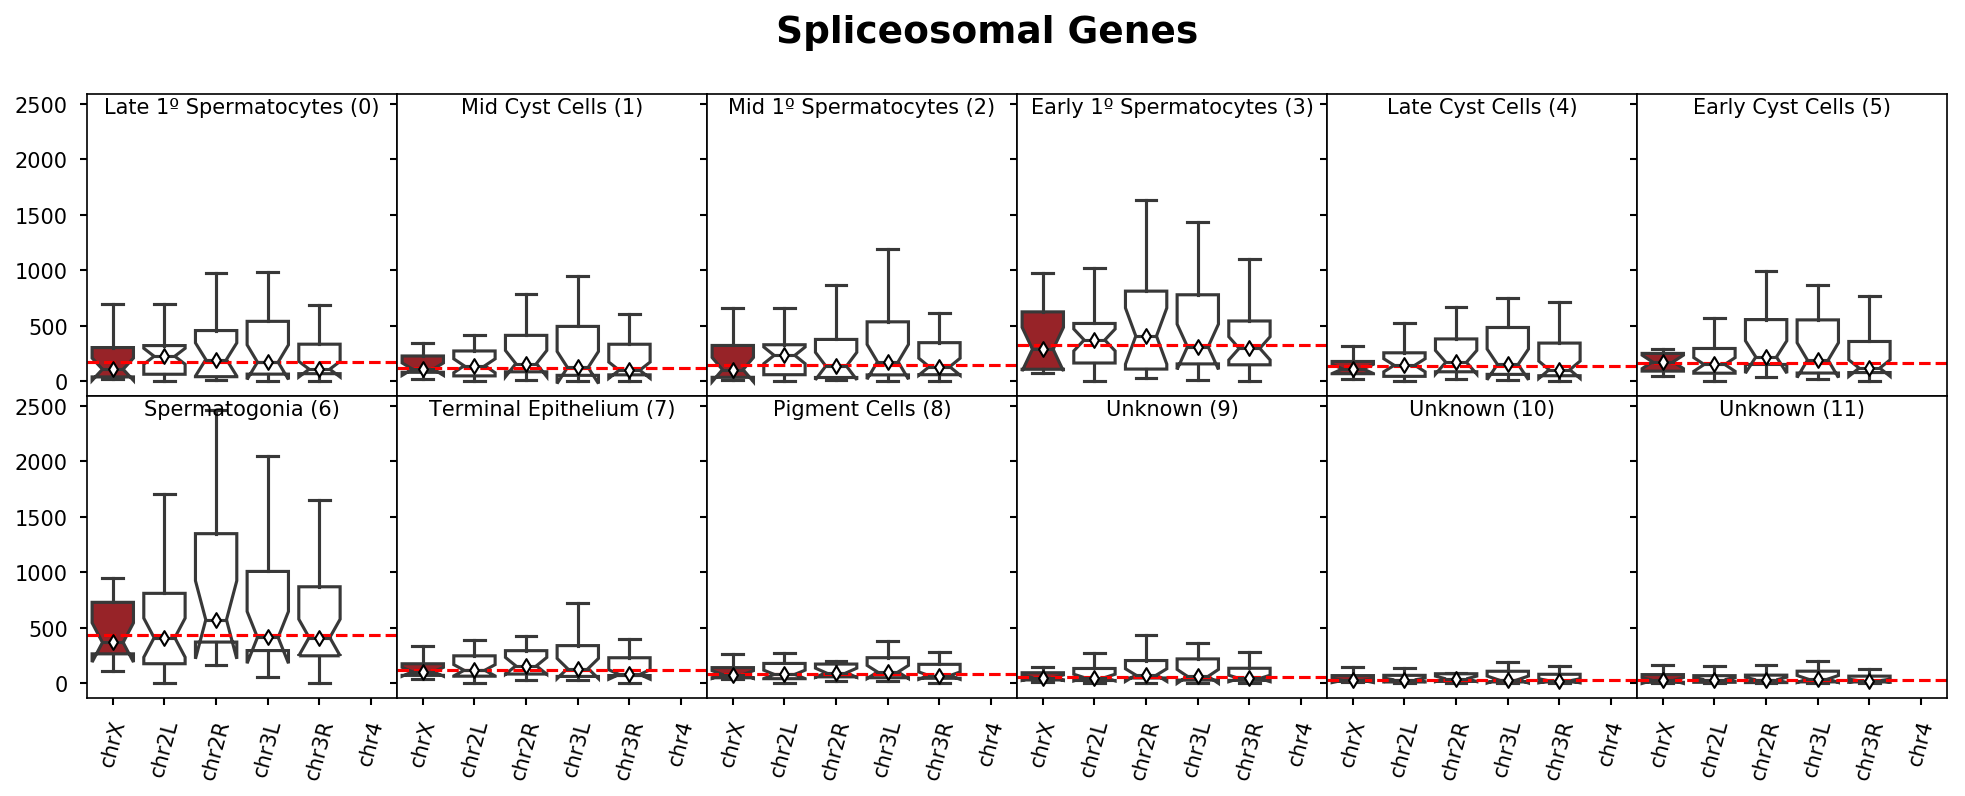

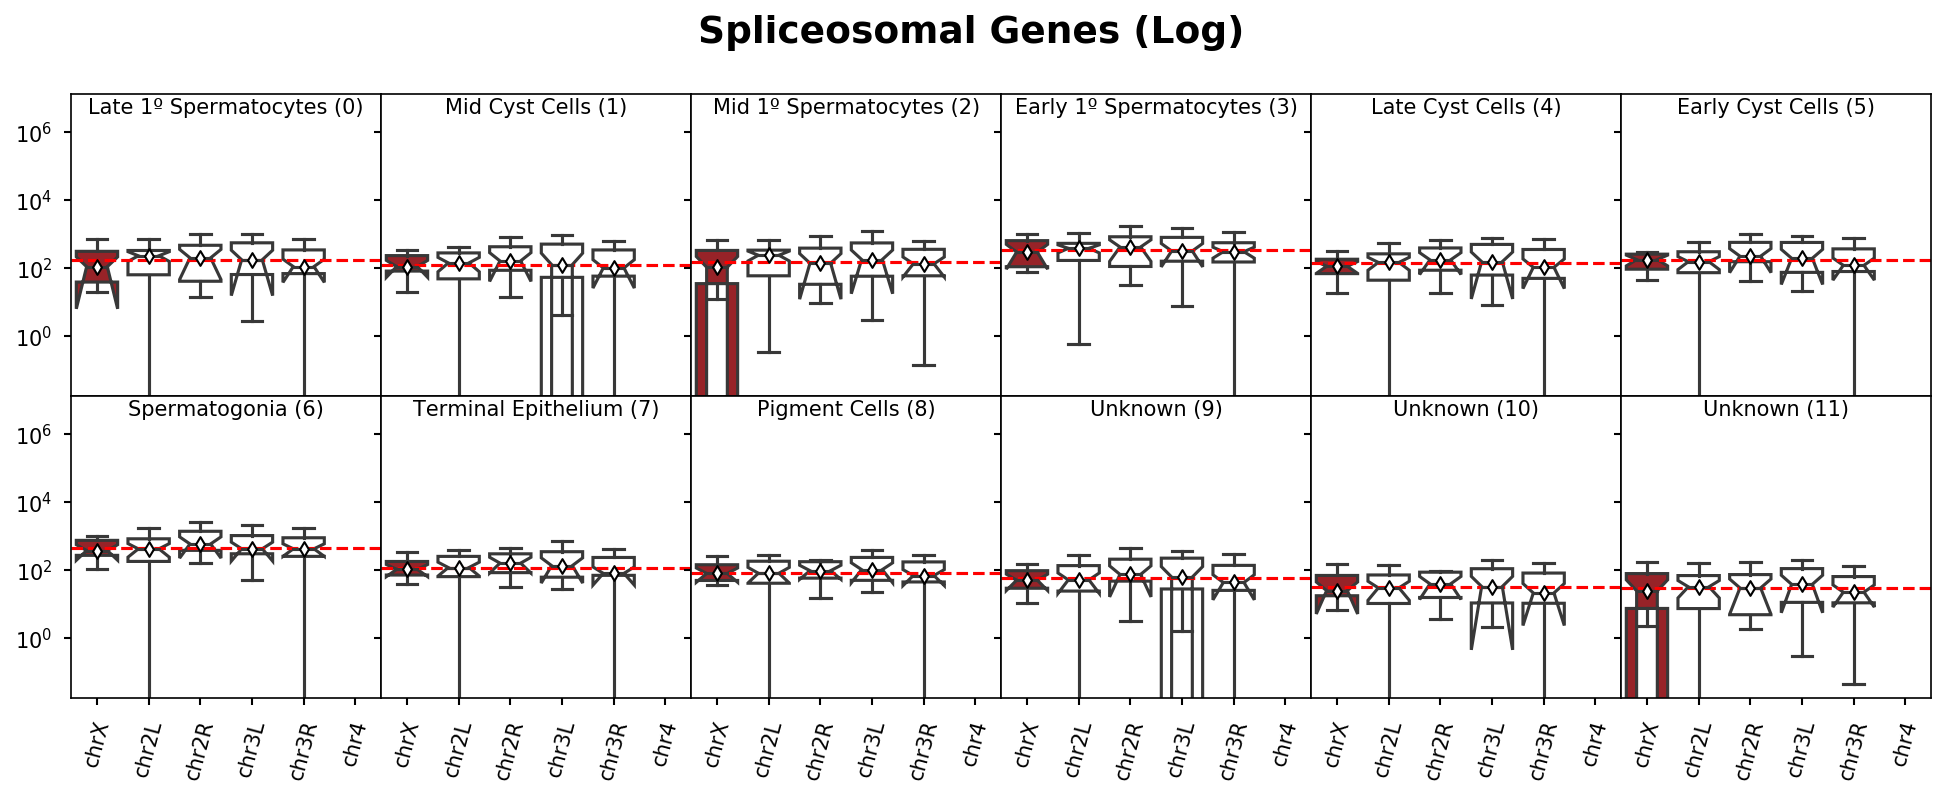

In [49]:
norm = norm_data(nbconfig.seurat_dir)
target_genes = norm.index[norm.index.isin(fb)].tolist()
print(len(target_genes))

fig, axes = plt.subplots(2, 6, figsize=plt.figaspect(1/3), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
figLog, axesLog = plt.subplots(2, 6, figsize=plt.figaspect(1/3), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
_xtoa = []
_pvals = []
_pvalsSample = []
for c, ax, axLog in zip(range(12), axes.flatten(), axesLog.flatten()):
    cnts = agg_all('norm', seurat_dir=nbconfig.seurat_dir, cluster=c)
    data = cnts.to_frame().join(nbconfig.fbgn2chrom).loc[target_genes]
                        
    # Regular boxplot
    ax = fe_chrom_boxplot(c, data=data, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.text(0.5, .99, nbconfig.CLUSTER_ANNOT[c], ha='center', va='top', transform=ax.transAxes, fontsize=10)
                        
    # Log boxplot
    axLog = fe_chrom_boxplot(c, data=data, ax=axLog)
    axLog.set_yscale('log')
    axLog.set_xlabel('')
    axLog.set_ylabel('')
    axLog.text(0.5, .99, nbconfig.CLUSTER_ANNOT[c], ha='center', va='top', transform=axLog.transAxes, fontsize=10)
                        
    # Chrom to A ratios
    _df = x_to_a(c, data=data)
    _df.columns = [c]
    _xtoa.append(_df)
 
    # P-values for Chrom : A comparison
    _pvals.append(mann_whitney_by_arm(c, data=data))
    _pvalsSample.append(mann_whitney_by_arm(c, data=data, sample=True))
                        
for ax in axes[1, :]:
    for l in ax.get_xticklabels():
        l.set_rotation(75)
        
fig.suptitle('Spliceosomal Genes')
                        
for axLog in axesLog[1, :]:
    for l in axLog.get_xticklabels():
        l.set_rotation(75)
                        
figLog.suptitle('Spliceosomal Genes (Log)')

df_xtoa = pd.concat(_xtoa, axis=1)
df_pvals = pd.concat(_pvals)
df_pvalsSample = pd.concat(_pvalsSample)

In [50]:
df_xtoa

0         1         2         3         4         5         6   \
chrom                                                                         
chrX   0.623812  0.894589  0.700454  0.873396  0.787545  1.059470  0.839648   
chr2L  1.306584  1.145447  1.571476  1.126853  1.023919  0.915754  0.938383   
chr2R  1.135757  1.307935  0.916856  1.233943  1.217435  1.328454  1.308954   
chr3L  0.996500  1.016958  1.175778  0.940500  1.079280  1.154388  0.944711   
chr3R  0.627073  0.815032  0.878107  0.897359  0.734611  0.717208  0.942344   
chr4        NaN       NaN       NaN       NaN       NaN       NaN       NaN   

             7         8         9         10        11  
chrom                                                    
chrX   0.898213  0.988699  0.859719  0.799489  0.820479  
chr2L  1.016308  1.003425  0.876887  0.961342  1.079915  
chr2R  1.369073  1.192631  1.271325  1.262092  1.000000  
chr3L  1.154994  1.280720  1.062801  1.055780  1.276301  
chr3R  0.684165  0.858922  0.735057  0.682059  0.750154  
chr4        NaN       NaN       NaN       NaN       NaN

In [51]:
df_pvals.loc[[6, 3, 2, 0], ['chrX', 'chr4', 'chr2L']]

/home/fearjm/miniconda3/envs/larval_gonad/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  if __name__ == '__main__':


chrX  chr4     chr2L
cluster                          
6        0.226690   NaN  0.230149
3        0.398562   NaN  0.355081
2        0.395808   NaN  0.436450
0        0.296129   NaN  0.433543

In [52]:
df_pvalsSample.loc[[6, 3, 2, 0], ['chrX', 'chr4', 'chr2L']]

/home/fearjm/miniconda3/envs/larval_gonad/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  if __name__ == '__main__':


chrX  chr4     chr2L
cluster                          
6        0.314829   NaN  0.366013
3        0.472540   NaN  0.435991
2        0.431633   NaN  0.521419
0        0.418137   NaN  0.486609

/data/fearjm/Projects/larval_gonad/larval_gonad/x_to_a.py:529: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  med_by_chrom = data.groupby('chrom').median().loc[CHROMS_CHR[:-1]].reset_index()


Text(0.5,0.98,'Spliceosomal Genes (Log)')

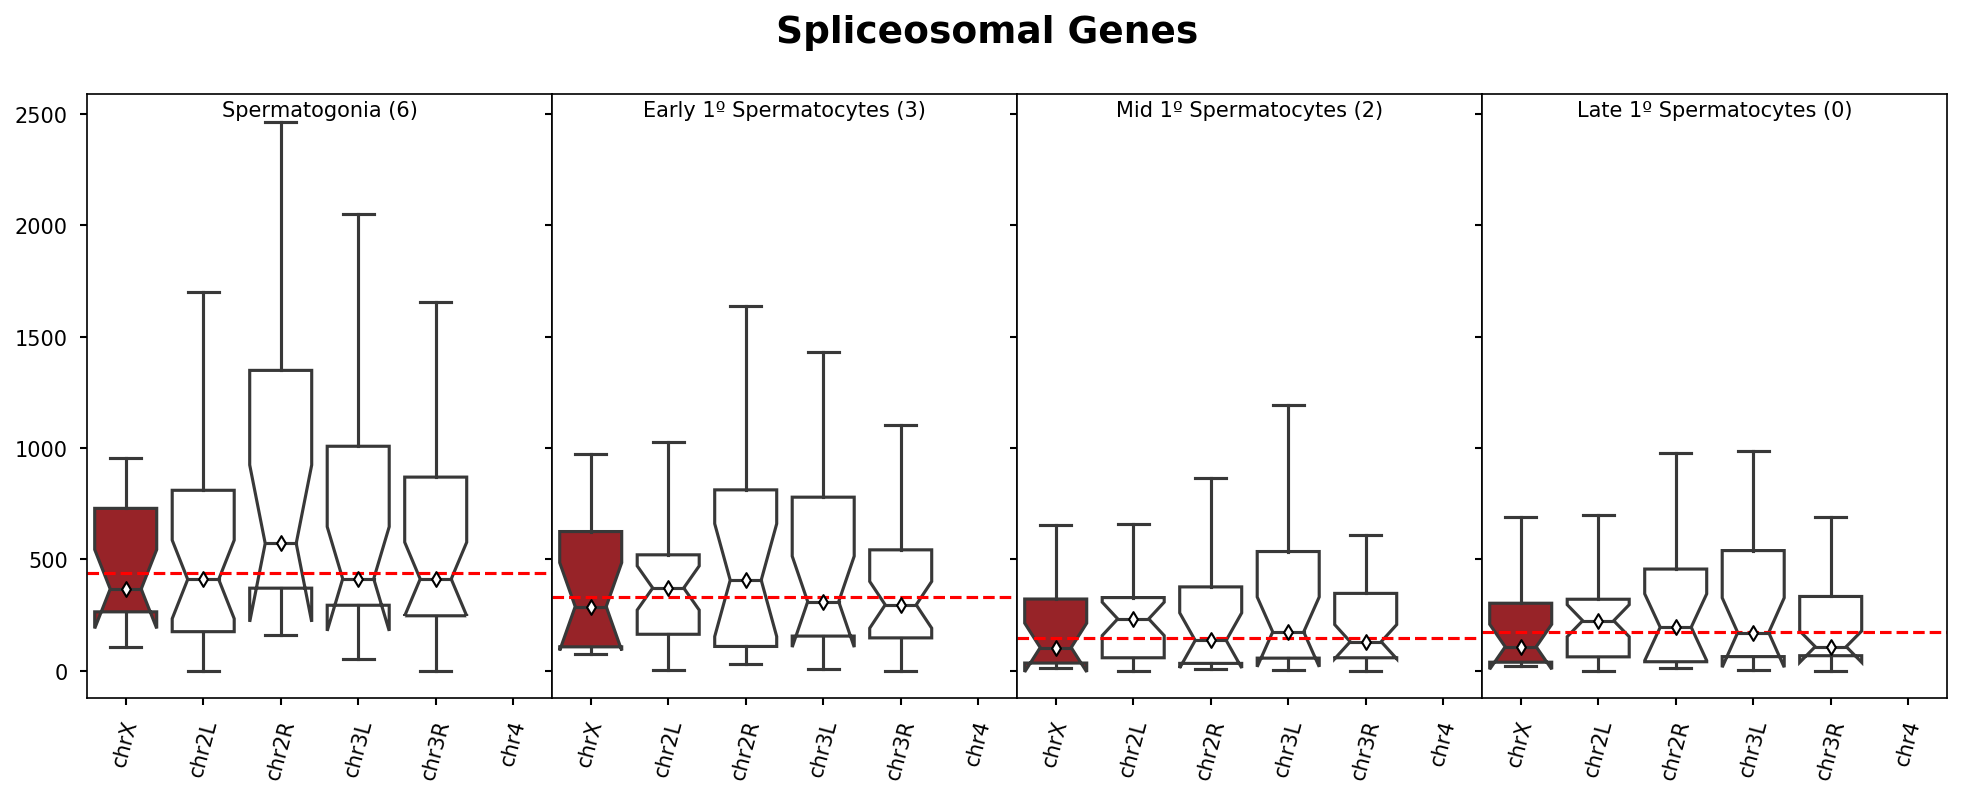

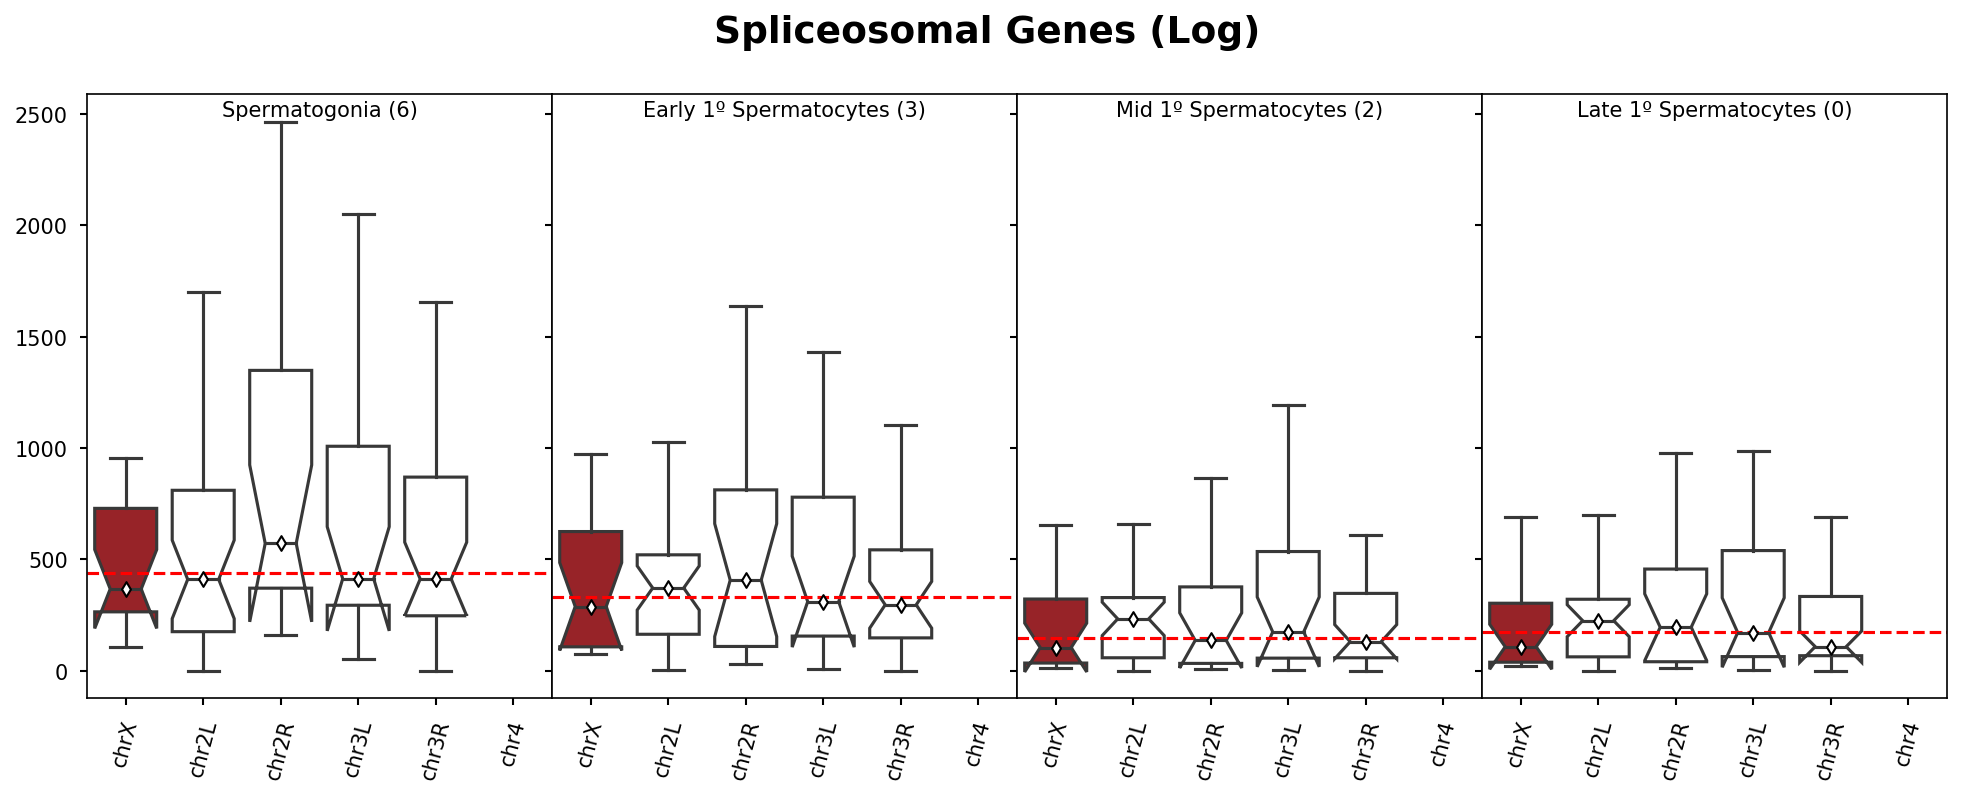

In [53]:
fig, axes = plt.subplots(1, 4, figsize=plt.figaspect(1/3), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
figLog, axesLog = plt.subplots(1, 4, figsize=plt.figaspect(1/3), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
for c, ax, axLog in zip([6, 3, 2, 0], axes.flatten(), axesLog.flatten()):
    cnts = agg_all('norm', seurat_dir=nbconfig.seurat_dir, cluster=c)
    data = cnts.to_frame().join(nbconfig.fbgn2chrom).loc[target_genes]
                        
    # Regular boxplot
    ax = fe_chrom_boxplot(c, data=data, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.text(0.5, .99, nbconfig.CLUSTER_ANNOT[c], ha='center', va='top', transform=ax.transAxes, fontsize=10)
                        
    # Log boxplot
    axLog = fe_chrom_boxplot(c, data=data, ax=axLog)
    axLog.set_xlabel('')
    axLog.set_ylabel('')
    axLog.text(0.5, .99, nbconfig.CLUSTER_ANNOT[c], ha='center', va='top', transform=axLog.transAxes, fontsize=10)
    
for ax in axes:
    for l in ax.get_xticklabels():
        l.set_rotation(75)
                        
fig.suptitle('Spliceosomal Genes')

for axLog in axesLog:
    for l in axLog.get_xticklabels():
        l.set_rotation(75)

figLog.suptitle('Spliceosomal Genes (Log)')

## Chromatin Remodelers

In [54]:
# FBgns generated looking up CHROMATIN REMODELING COMPLEXES (ATP-DEPENDENT) gene group
fb = [
    'FBgn0262519', 'FBgn0015805', 'FBgn0027950', 'FBgn0027951', 'FBgn0263979', 'FBgn0010762', 'FBgn0035357', 'FBgn0030269', 'FBgn0261885', 'FBgn0000212',
    'FBgn0011715', 'FBgn0000042', 'FBgn0000043', 'FBgn0025716', 'FBgn0025463', 'FBgn0002783', 'FBgn0030093', 'FBgn0000541', 'FBgn0016687', 'FBgn0011604',
    'FBgn0020306', 'FBgn0040075', 'FBgn0040078', 'FBgn0000046', 'FBgn0031873', 'FBgn0034537', 'FBgn0032321', 'FBgn0039654', 'FBgn0053554', 'FBgn0026080',
    'FBgn0027378', 'FBgn0035624', 'FBgn0033341', 'FBgn0000581', 'FBgn0030945', 'FBgn0086613', 'FBgn0038576', 'FBgn0030877', 'FBgn0002521', 'FBgn0039227',
    'FBgn0042085', 'FBgn0087008', 'FBgn0033636', 'FBgn0027620', 'FBgn0043002', 'FBgn0043001', 'FBgn0020496', 
]

In [55]:
_df = nbconfig.fbgn2chrom[nbconfig.fbgn2chrom.index.isin(fb)].chrom.value_counts().to_frame()
_df.columns = ['Number of Gene']
_df.index.name = 'chrom'
_df

Number of Gene
chrom                
chr3R              15
chr2R              11
chrX                9
chr3L               8
chr2L               3
chr4                1

47


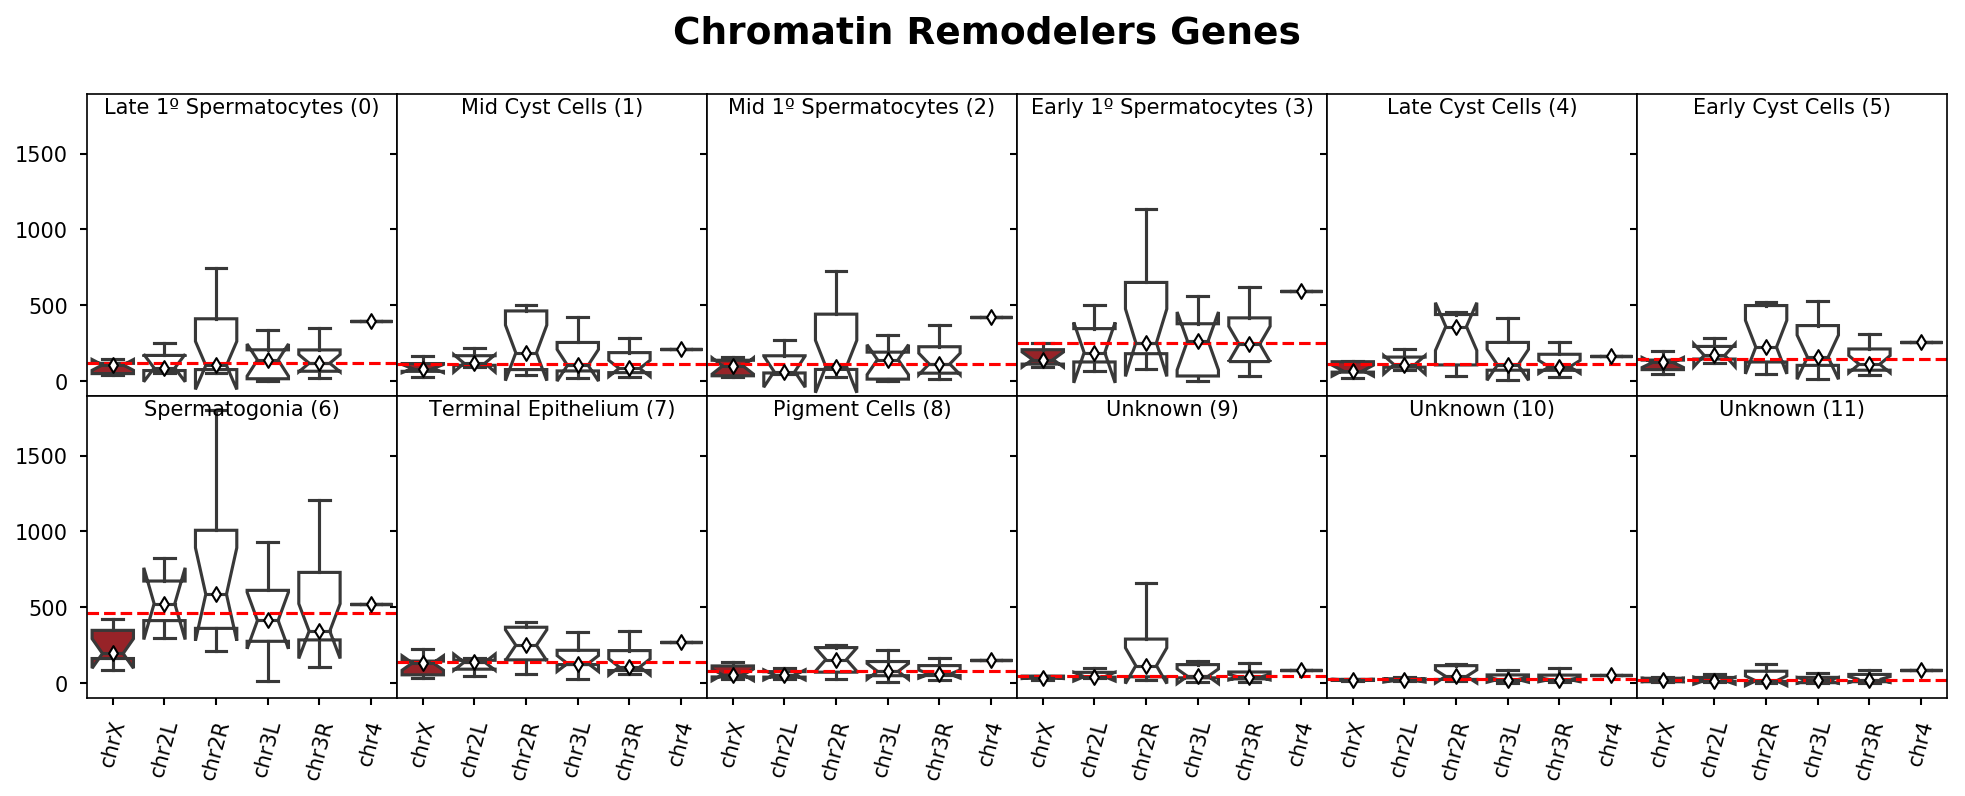

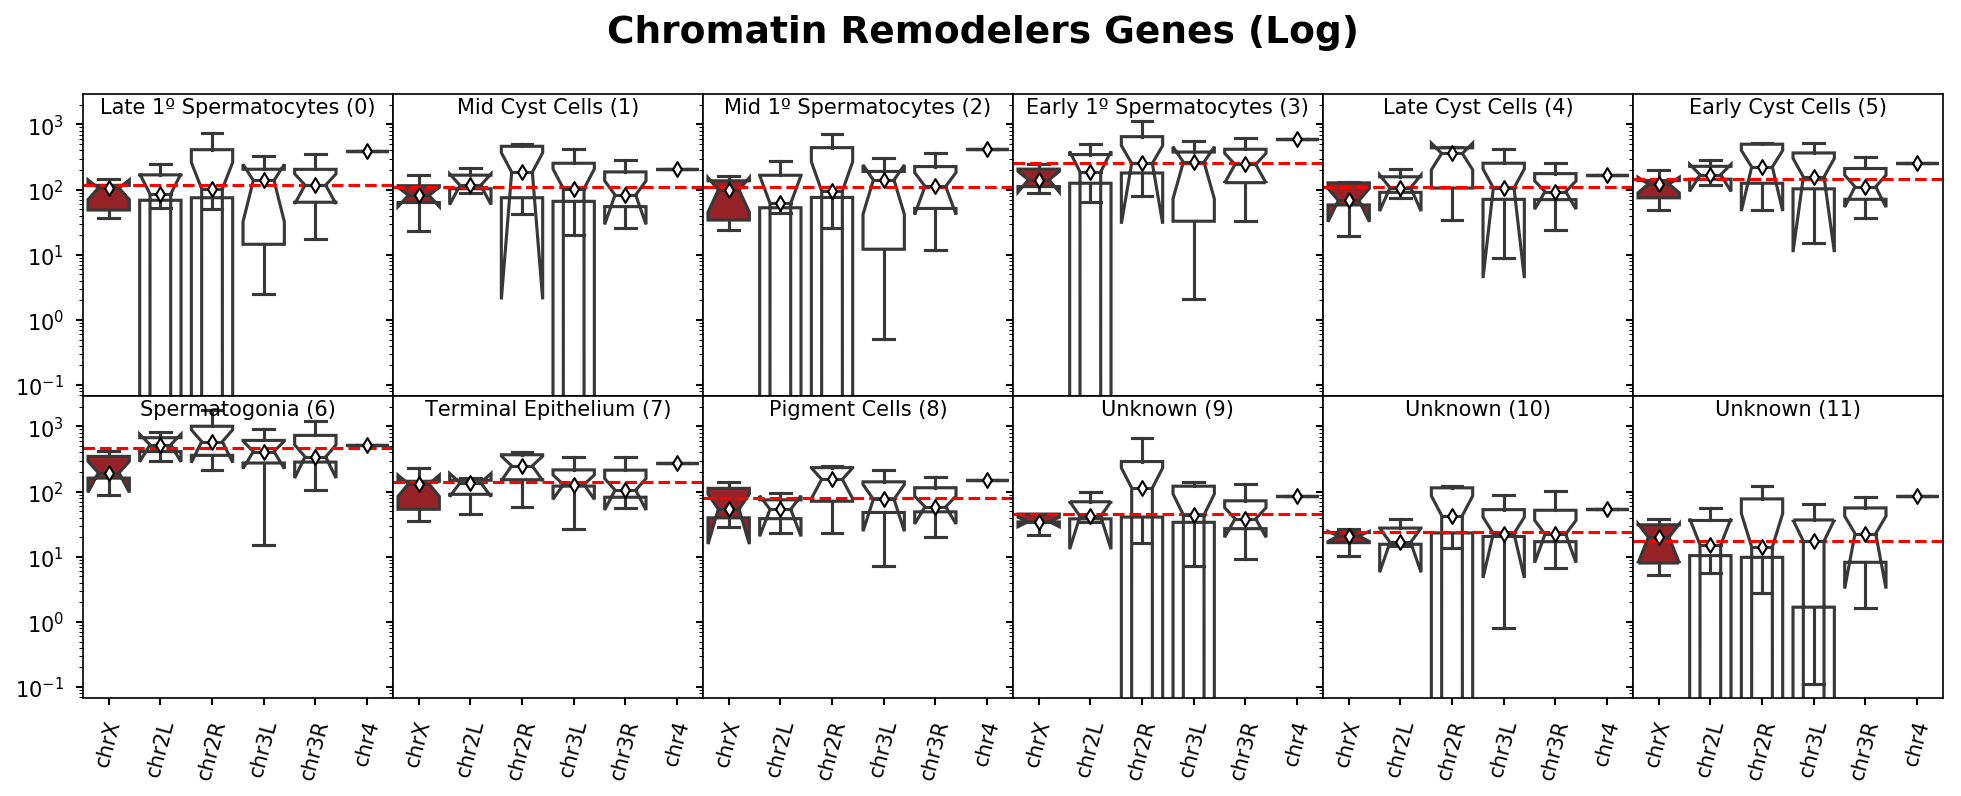

In [56]:
norm = norm_data(nbconfig.seurat_dir)
target_genes = norm.index[norm.index.isin(fb)].tolist()
print(len(target_genes))

fig, axes = plt.subplots(2, 6, figsize=plt.figaspect(1/3), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
figLog, axesLog = plt.subplots(2, 6, figsize=plt.figaspect(1/3), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
_xtoa = []
_pvals = []
_pvalsSample = []
for c, ax, axLog in zip(range(12), axes.flatten(), axesLog.flatten()):
    cnts = agg_all('norm', seurat_dir=nbconfig.seurat_dir, cluster=c)
    data = cnts.to_frame().join(nbconfig.fbgn2chrom).loc[target_genes]
                        
    # Regular boxplot
    ax = fe_chrom_boxplot(c, data=data, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.text(0.5, .99, nbconfig.CLUSTER_ANNOT[c], ha='center', va='top', transform=ax.transAxes, fontsize=10)
                        
    # Log boxplot
    axLog = fe_chrom_boxplot(c, data=data, ax=axLog)
    axLog.set_yscale('log')
    axLog.set_xlabel('')
    axLog.set_ylabel('')
    axLog.text(0.5, .99, nbconfig.CLUSTER_ANNOT[c], ha='center', va='top', transform=axLog.transAxes, fontsize=10)
                        
    # Chrom to A ratios
    _df = x_to_a(c, data=data)
    _df.columns = [c]
    _xtoa.append(_df)
 
    # P-values for Chrom : A comparison
    _pvals.append(mann_whitney_by_arm(c, data=data))
    _pvalsSample.append(mann_whitney_by_arm(c, data=data, sample=True))
                        
for ax in axes[1, :]:
    for l in ax.get_xticklabels():
        l.set_rotation(75)
        
fig.suptitle('Chromatin Remodelers Genes')
                        
for axLog in axesLog[1, :]:
    for l in axLog.get_xticklabels():
        l.set_rotation(75)
                        
figLog.suptitle('Chromatin Remodelers Genes (Log)')

df_xtoa = pd.concat(_xtoa, axis=1)
df_pvals = pd.concat(_pvals)
df_pvalsSample = pd.concat(_pvalsSample)

In [57]:
df_xtoa

0         1         2         3         4         5         6   \
chrom                                                                         
chrX   0.907801  0.750809  0.888904  0.559847  0.624155  0.823972  0.421266   
chr2L  0.732731  1.068736  0.553560  0.740651  0.982223  1.144101  1.133441   
chr2R  0.881113  1.701254  0.856297  1.000000  3.290058  1.509288  1.267642   
chr3L  1.186530  0.949592  1.264266  1.044695  0.973109  1.060027  0.892718   
chr3R  1.007795  0.760689  1.009190  0.964445  0.852168  0.748104  0.740930   
chr4   3.397061  1.931289  3.794462  2.341562  1.510469  1.748643  1.126471   

             7         8         9         10        11  
chrom                                                    
chrX   0.941190  0.671467  0.775571  0.873292  1.162416  
chr2L  0.978039  0.669388  0.934701  0.696813  0.886050  
chr2R  1.778649  1.935237  2.544929  1.794967  0.824311  
chr3L  0.916732  0.957845  0.980347  0.950434  1.009531  
chr3R  0.753649  0.733109  0.855735  0.927379  1.319680  
chr4   1.944992  1.871890  1.908089  2.262497  4.920513

In [58]:
df_pvals.loc[[6, 3, 2, 0], ['chrX', 'chr4', 'chr2L']]

chrX      chr4     chr2L
cluster                              
6        0.011587  0.642358  0.611206
3        0.106375  0.882090  0.369258
2        0.244392  0.882090  0.312814
0        0.195340  0.882090  0.388794

In [59]:
df_pvalsSample.loc[[6, 3, 2, 0], ['chrX', 'chr4', 'chr2L']]

chrX     chr4     chr2L
cluster                             
6        0.031845  0.50000  0.095215
3        0.038694  0.97725  0.095215
2        0.055981  0.97725  0.095215
0        0.046699  0.97725  0.095215

Text(0.5,0.98,'Chromatin Remodelers Genes (Log)')

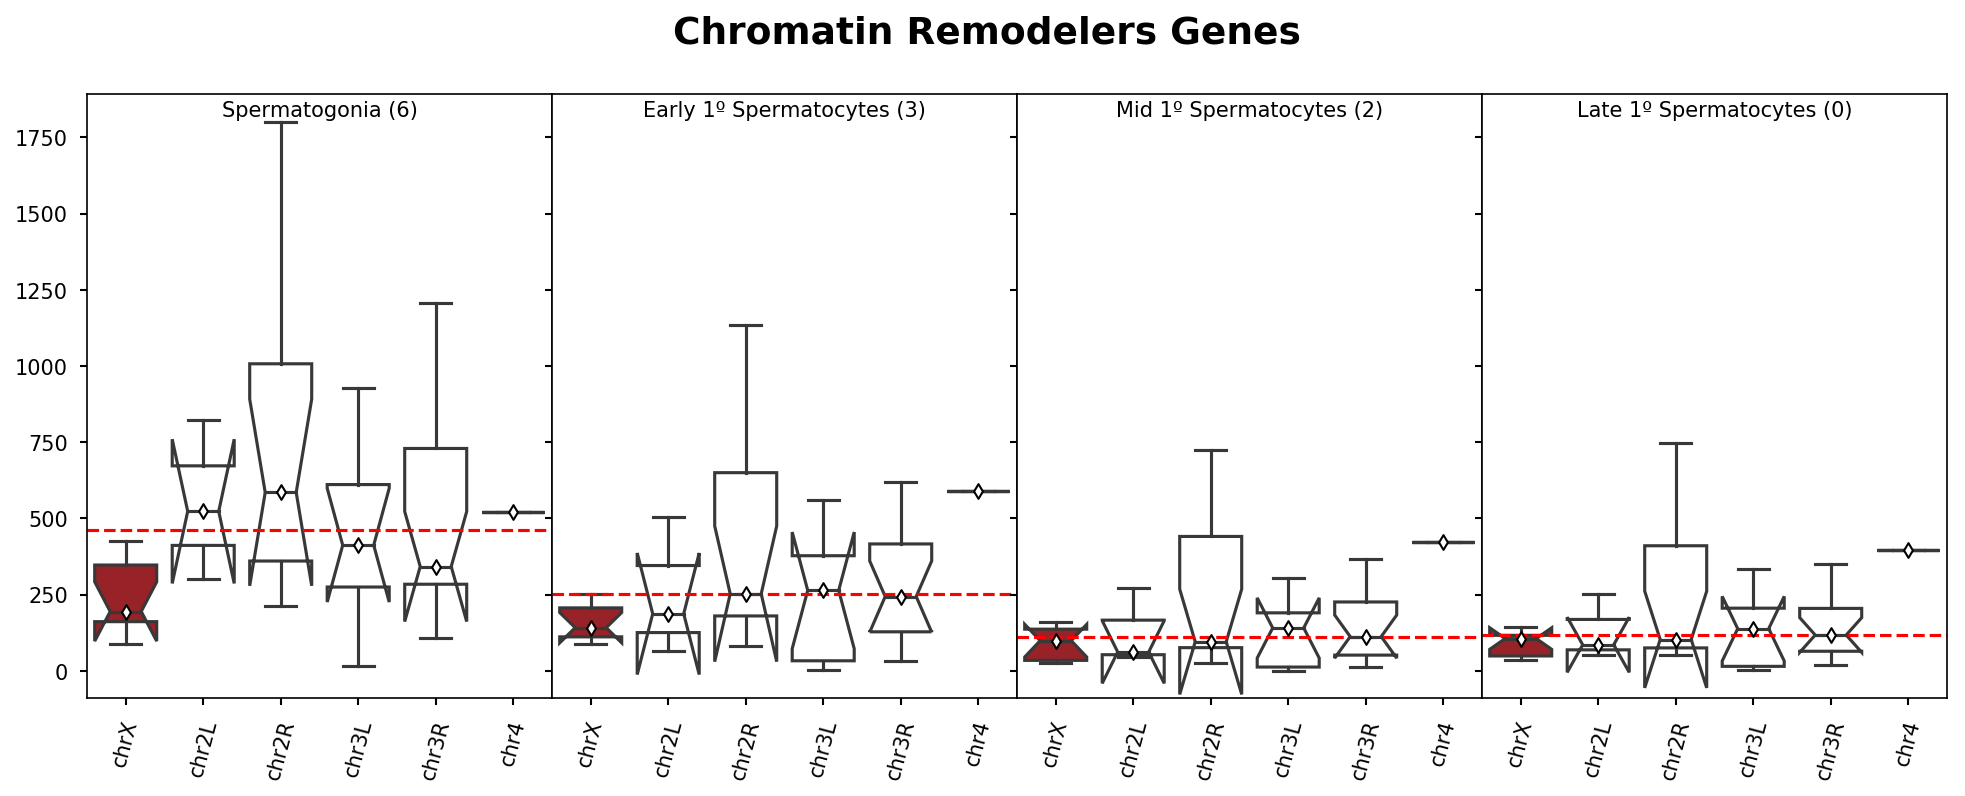

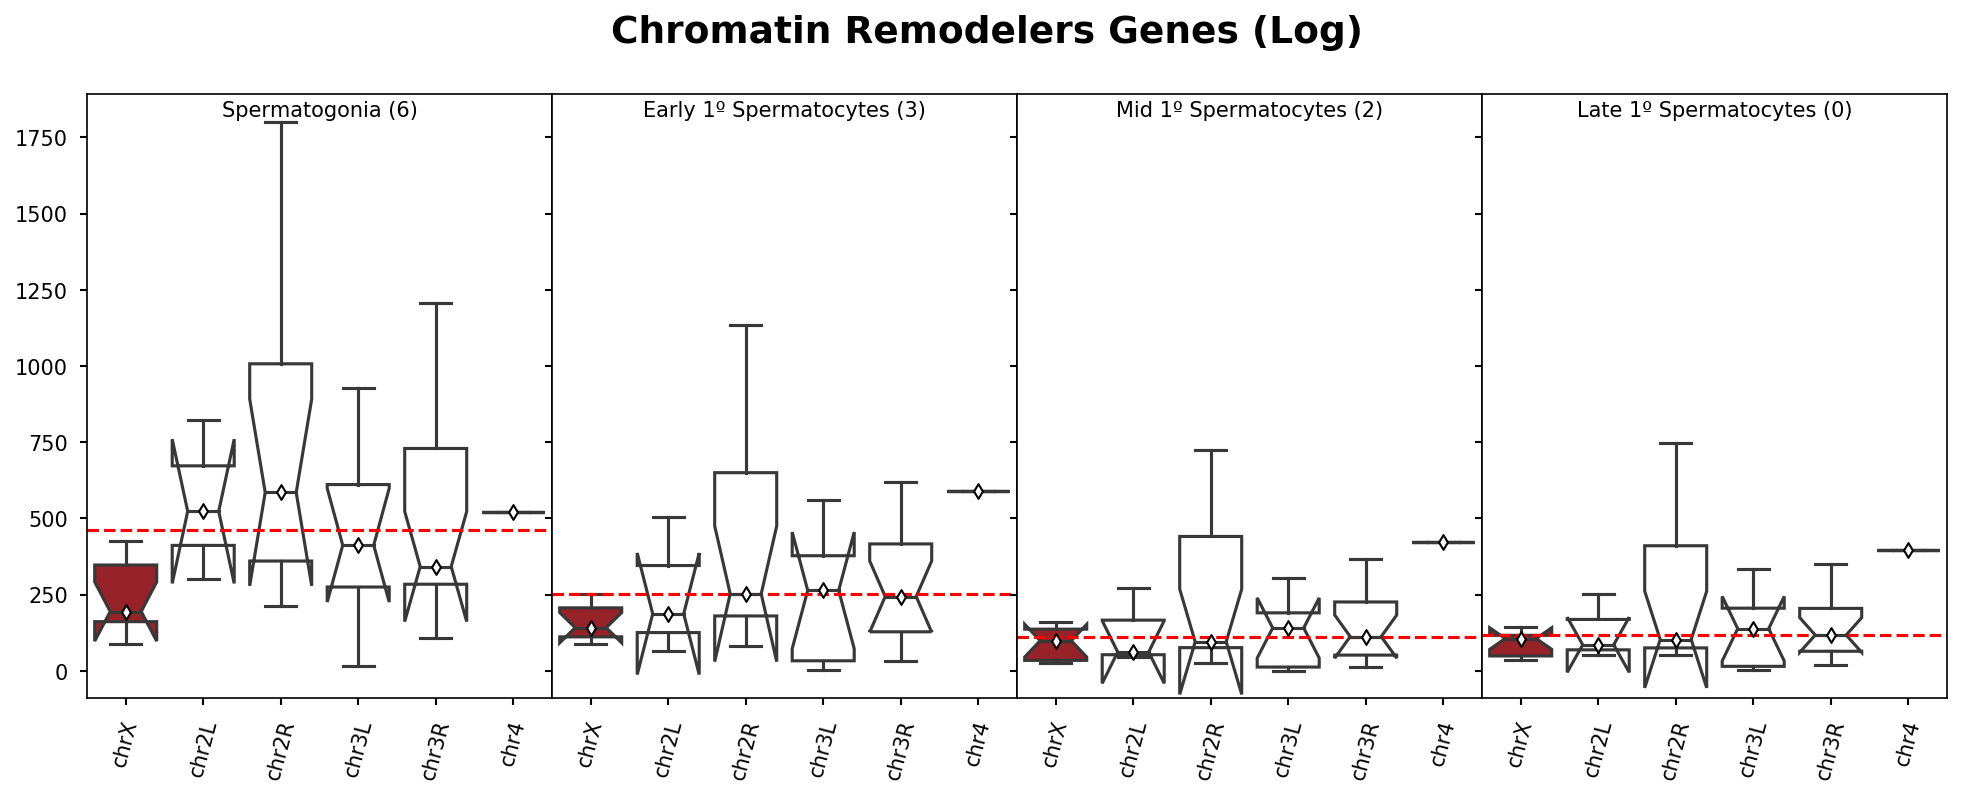

In [60]:
fig, axes = plt.subplots(1, 4, figsize=plt.figaspect(1/3), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
figLog, axesLog = plt.subplots(1, 4, figsize=plt.figaspect(1/3), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
for c, ax, axLog in zip([6, 3, 2, 0], axes.flatten(), axesLog.flatten()):
    cnts = agg_all('norm', seurat_dir=nbconfig.seurat_dir, cluster=c)
    data = cnts.to_frame().join(nbconfig.fbgn2chrom).loc[target_genes]
                        
    # Regular boxplot
    ax = fe_chrom_boxplot(c, data=data, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.text(0.5, .99, nbconfig.CLUSTER_ANNOT[c], ha='center', va='top', transform=ax.transAxes, fontsize=10)
                        
    # Log boxplot
    axLog = fe_chrom_boxplot(c, data=data, ax=axLog)
    axLog.set_xlabel('')
    axLog.set_ylabel('')
    axLog.text(0.5, .99, nbconfig.CLUSTER_ANNOT[c], ha='center', va='top', transform=axLog.transAxes, fontsize=10)
    
for ax in axes:
    for l in ax.get_xticklabels():
        l.set_rotation(75)
                        
fig.suptitle('Chromatin Remodelers Genes')

for axLog in axesLog:
    for l in axLog.get_xticklabels():
        l.set_rotation(75)

figLog.suptitle('Chromatin Remodelers Genes (Log)')

## CDF

In [142]:
clusters = nbconfig.seurat.get_clusters('res.0.6')
norm = norm_data(nbconfig.seurat_dir)

xa_chrom = nbconfig.fbgn2chrom.copy()
xa_chrom.chrom.replace(
    {
        'chr2L': 'chrA',
        'chr2R': 'chrA',
        'chr3L': 'chrA',
        'chr3R': 'chrA',
    },
inplace=True)

data = norm.join(xa_chrom).groupby('chrom').sum()

num_genes = xa_chrom.groupby('chrom').size()
num_genes.name = 'cnt'

data_std = data.div(num_genes, axis='index')

xtoa_data = data_std.loc['chrX'] / data_std.loc['chrA']
fourtoa_data = data_std.loc['chrX'] / data_std.loc['chrA']

_df = pd.concat([xtoa_data, clusters], axis=1).sort_values(by=0, ascending=False)
_df.columns = ['xtoa', 'cluster']
_df['idx'] = range(_df.index.size)

In [143]:
_df.head()

xtoa  cluster  idx
rep1_GTTCATTTCTGGTATG  1.607062        8    0
rep1_GCGCCAACACAGTCGC  1.453387        5    1
rep1_GCAATCATCATCTGTT  1.414784        7    2
rep1_TTGAACGAGGCTAGCA  1.403911        7    3
rep1_ATGGGAGGTTCCACAA  1.396374       10    4

Text(0.5,0.95,'All Genes')

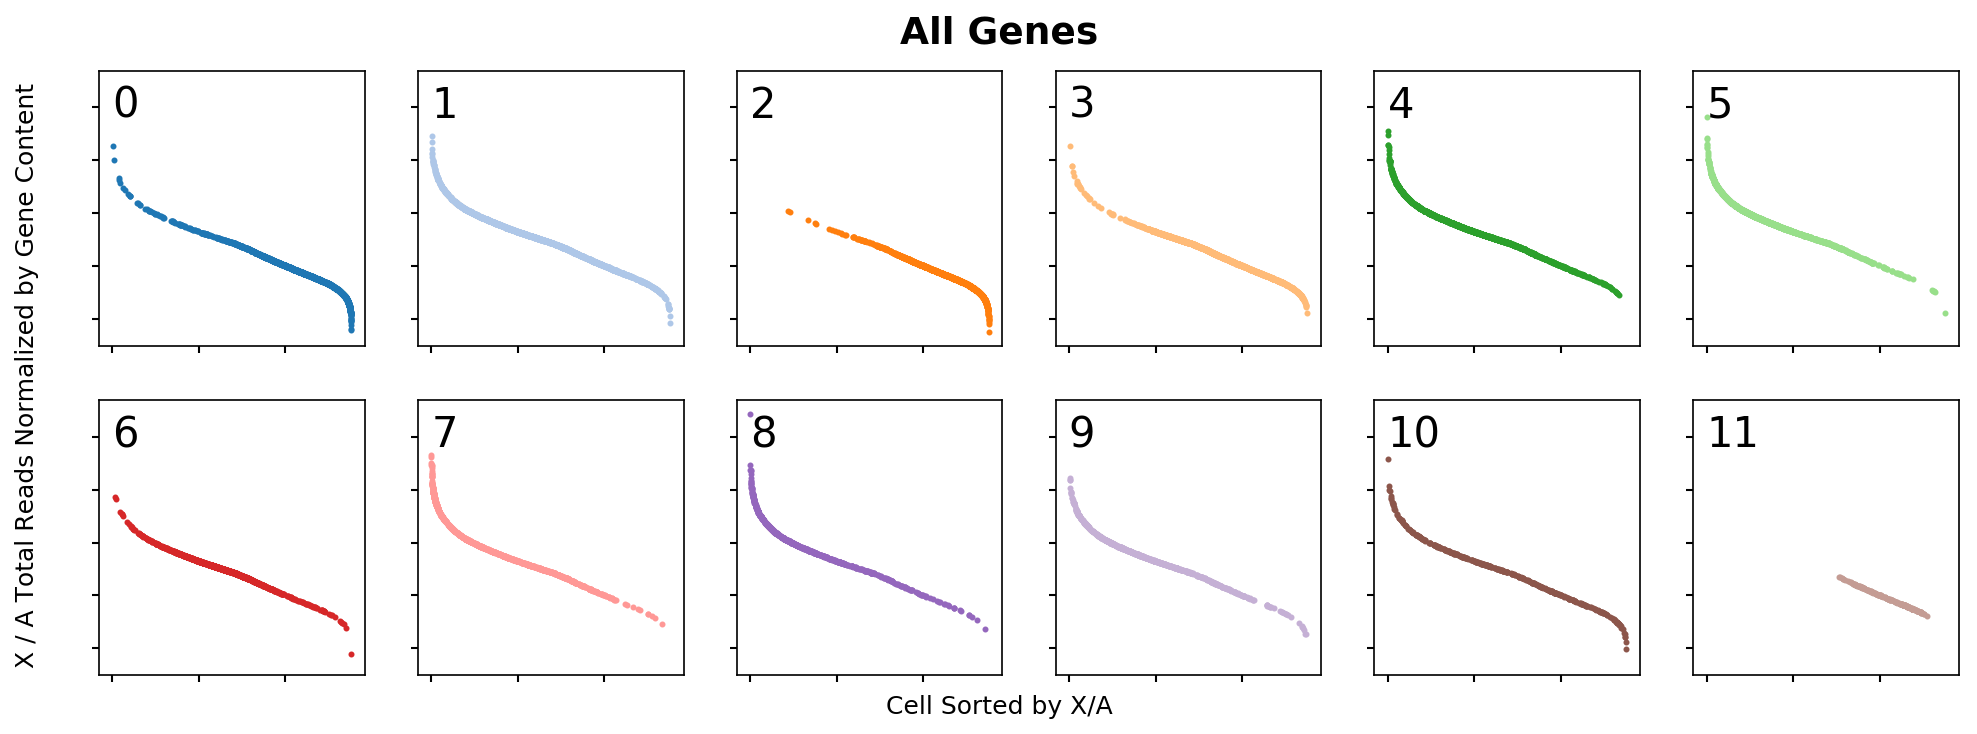

In [199]:
fig, axes = plt.subplots(2, 6, figsize=plt.figaspect(1/3), sharey=True, sharex=True)
for (c, dd), ax in zip(_df.groupby('cluster'), axes.flatten()):
    color = nbconfig.colors['clusters'][c]
    ax.scatter(dd.idx, dd.xtoa, s=8, color=color)
    ax.text(0.05, .95, c, va='top', transform=ax.transAxes)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
fig.text(0.1, 0.5, 'X / A Total Reads Normalized by Gene Content', ha='right', va='center', fontsize=12, rotation=90)
fig.text(0.5, 0.1, 'Cell Sorted by X/A', ha='center', va='top', fontsize=12)
fig.suptitle('All Genes', y=.95)

## DEG

In [27]:
from wordcloud import WordCloud
from collections import defaultdict
from goatools import GOEnrichmentStudy
from goatools.obo_parser import GODag
from goatools.mapslim import mapslim
from goatools.godag_plot import plot_gos, plot_results, plot_goid2goobj

norm = norm_data(seurat_dir=nbconfig.seurat_dir)
bg = norm.index[((norm > 0).sum(axis=1) > 3)].tolist()

In [28]:
oboDag = GODag('../data/external/go-basic.obo')
slimDag = GODag("../data/external/goslim_generic.obo")

# Import fly associations
association = '../data/external/gene_association.fb'
fly = defaultdict(set)
with open(association) as fh:
    for row in fh.readlines():
        if row.startswith('!'):
            continue
        cols = row.split('\t')
        fbgn = cols[1]
        goterm = cols[4]
        gtype = cols[11]
        #if gtype != 'protein':
        #    continue
        if goterm not in oboDag:
            continue
        fly[fbgn].add(goterm)

# Convert from fly2go to go2fly
go2fly = defaultdict(set)
for k, v in fly.items():
    for t in v:
        if oboDag[t].namespace != 'biological_process':
            continue
            
        go2fly[t].add(k)
        

load obo file ../data/external/go-basic.obo
../data/external/go-basic.obo: fmt(1.2) rel(2018-02-02) 47,109 GO Terms
load obo file ../data/external/goslim_generic.obo
../data/external/goslim_generic.obo: fmt(1.2) rel(None) 228 GO Terms


In [29]:
# map them to a slim set
flyslim = defaultdict(set)
for fbgn, goterms in fly.items():
    all_direct_anc = set()
    all_covered_anc = set()
    all_all_anc = set()
    for goterm in goterms:
        direct_anc, all_anc = mapslim(goterm, oboDag, slimDag)
        all_all_anc |= all_anc
        # collect all covered ancestors, so the direct ancestors
        # can be calculated afterwards
        all_covered_anc |= (all_anc - direct_anc)
    all_direct_anc = all_all_anc - all_covered_anc
    flyslim[fbgn] |= (all_direct_anc)

In [30]:
goObj = GOEnrichmentStudy(
    bg,
    flyslim,
    slimDag,
    propagate_counts=False,
    alpha=0.001,
    methods=['fdr_bh']
)

fisher module not installed.  Falling back on scipy.stats.fisher_exact
10,991 out of 14,182 population items found in association


### Early

In [4]:
early = pd.read_csv('../output/2018-06-15_scrnaseq_spermatogonia_vs_early_biomarkers.tsv', sep='\t', index_col=[0,1])
early_sig = early[early.p_val_adj < 0.01]

early_gonia = early_sig[early_sig.avg_logFC > 0].index.get_level_values(0).tolist()
early_cytes = early_sig[early_sig.avg_logFC < 0].index.get_level_values(0).tolist()

Calculating uncorrected p-values using fisher_scipy_stats
 1,072 out of  1,121 study items found in association
Running multitest correction: statsmodels fdr_bh
  135 GO terms are associated with 1,072 of 1,121 study items
  143 GO terms are associated with 10,991 of 14,182 population items
GO:0042254 ribosome biogenesis 10
GO:0065003 macromolecular complex assembly 14
GO:0009790 embryo development 14
GO:0000228 nuclear chromosome 20
GO:0005576 extracellular region 5
GO:0005615 extracellular space 9
GO:0005635 nuclear envelope 13
GO:0019843 rRNA binding 15
GO:0042393 histone binding 15
GO:0004871 signal transducer activity 8
GO:0051082 unfolded protein binding 18


Text(0.5,0.75,'Gonia Biased')

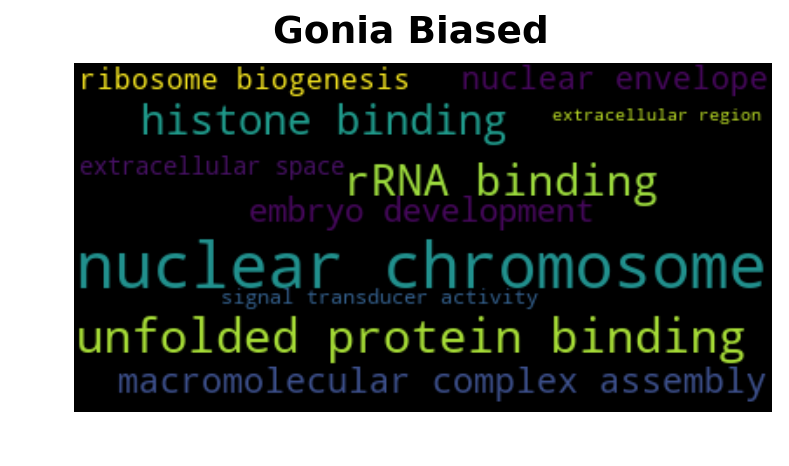

In [45]:
results = [res for res in goObj.run_study(early_gonia) if res.p_fdr_bh < 0.001]

freqs = {}
for r in results:
    if r.name in ['biological_process', 'cellular_component', 'molecular_function']:
        continue

    if r.study_count > 20:
        continue 

    freqs[r.name] = r.study_count
    print(r.GO, r.name, r.study_count)

wc = WordCloud(max_font_size=40).generate_from_frequencies(freqs)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off");
plt.suptitle('Gonia Biased', y=0.75)

Calculating uncorrected p-values using fisher_scipy_stats
 1,678 out of  2,109 study items found in association
Running multitest correction: statsmodels fdr_bh
  132 GO terms are associated with 1,678 of 2,109 study items
  143 GO terms are associated with 10,991 of 14,182 population items
GO:0006412 translation 5
GO:0002376 immune system process 12
GO:0007155 cell adhesion 5
GO:0000902 cell morphogenesis 4
GO:0034330 cell junction organization 1
GO:0040007 growth 11
GO:0006259 DNA metabolic process 19
GO:0000278 mitotic cell cycle 8
GO:0005576 extracellular region 14
GO:0005840 ribosome 0
GO:0004871 signal transducer activity 8
GO:0003700 DNA binding transcription factor activity 14
GO:0003735 structural constituent of ribosome 3
GO:0004386 helicase activity 2
GO:0008134 transcription factor binding 6


Text(0.5,0.75,'Early Cytes Biased')

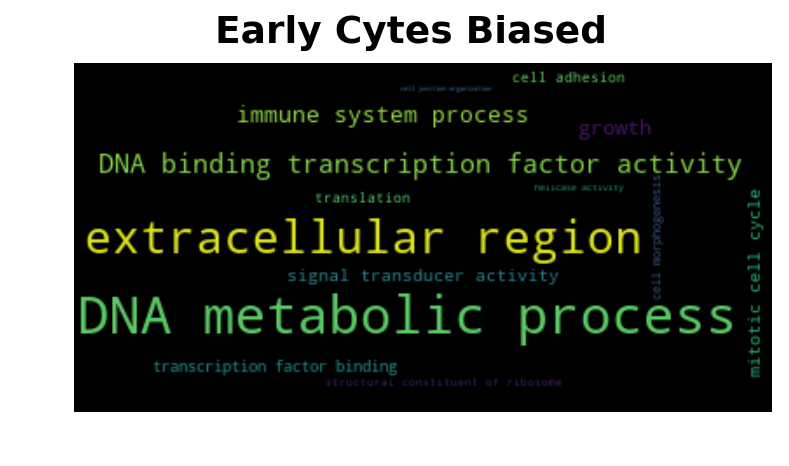

In [44]:
results = [res for res in goObj.run_study(early_cytes) if res.p_fdr_bh < 0.001]

freqs = {}
for r in results:
    if r.name in ['biological_process', 'cellular_component', 'molecular_function']:
        continue

    if r.study_count > 20:
        continue 

    freqs[r.name] = r.study_count
    print(r.GO, r.name, r.study_count)

wc = WordCloud(max_font_size=40).generate_from_frequencies(freqs)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off");
plt.suptitle('Early Cytes Biased', y=0.75)

### Mid

In [46]:
mid = pd.read_csv('../output/2018-06-15_scrnaseq_spermatogonia_vs_mid_biomarkers.tsv', sep='\t', index_col=[0,1])
mid_sig = mid[mid.p_val_adj < 0.01]

mid_gonia = mid_sig[mid_sig.avg_logFC > 0].index.get_level_values(0).tolist()
mid_cytes = mid_sig[mid_sig.avg_logFC < 0].index.get_level_values(0).tolist()

Calculating uncorrected p-values using fisher_scipy_stats
 1,730 out of  1,823 study items found in association
Running multitest correction: statsmodels fdr_bh
  138 GO terms are associated with 1,730 of 1,823 study items
  143 GO terms are associated with 10,991 of 14,182 population items
GO:0042254 ribosome biogenesis 11
GO:0009790 embryo development 19
GO:0005576 extracellular region 9
GO:0005615 extracellular space 20
GO:0005635 nuclear envelope 19
GO:0042393 histone binding 20
GO:0004871 signal transducer activity 16


Text(0.5,0.75,'Gonia Biased')

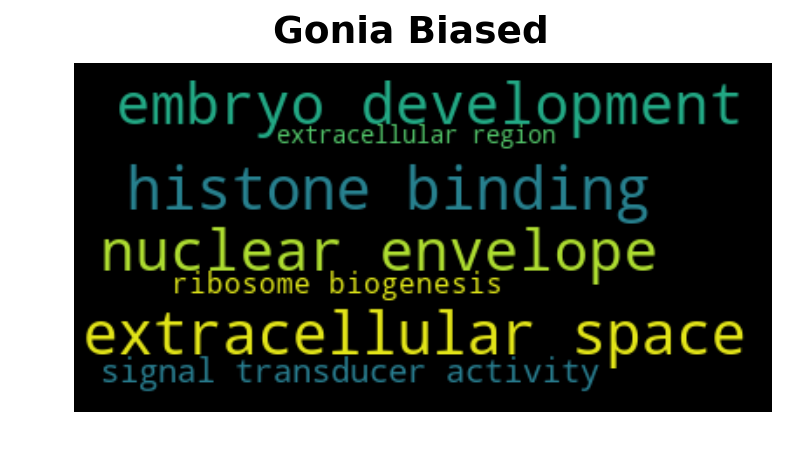

In [47]:
results = [res for res in goObj.run_study(mid_gonia) if res.p_fdr_bh < 0.001]

freqs = {}
for r in results:
    if r.name in ['biological_process', 'cellular_component', 'molecular_function']:
        continue

    if r.study_count > 20:
        continue 

    freqs[r.name] = r.study_count
    print(r.GO, r.name, r.study_count)

wc = WordCloud(max_font_size=40).generate_from_frequencies(freqs)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off");
plt.suptitle('Gonia Biased', y=0.75)

Calculating uncorrected p-values using fisher_scipy_stats
 1,520 out of  1,987 study items found in association
Running multitest correction: statsmodels fdr_bh
  128 GO terms are associated with 1,520 of 1,987 study items
  143 GO terms are associated with 10,991 of 14,182 population items
GO:0007267 cell-cell signaling 16
GO:0002376 immune system process 10
GO:0006412 translation 7
GO:0007155 cell adhesion 4
GO:0006259 DNA metabolic process 14
GO:0000902 cell morphogenesis 2
GO:0040007 growth 8
GO:0006397 mRNA processing 14
GO:0030154 cell differentiation 11
GO:0034330 cell junction organization 1
GO:0008283 cell proliferation 5
GO:0051276 chromosome organization 13
GO:0005576 extracellular region 15
GO:0005730 nucleolus 3
GO:0005840 ribosome 0
GO:0005694 chromosome 5
GO:0005794 Golgi apparatus 5
GO:0005654 nucleoplasm 5
GO:0005768 endosome 6
GO:0003677 DNA binding 20
GO:0003700 DNA binding transcription factor activity 7
GO:0004871 signal transducer activity 10
GO:0003735 structural

Text(0.5,0.75,'Mid Cytes Biased')

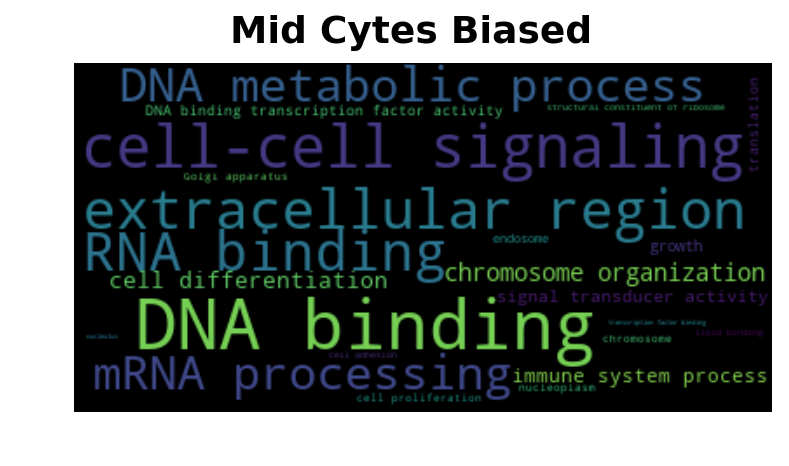

In [49]:
results = [res for res in goObj.run_study(mid_cytes) if res.p_fdr_bh < 0.001]

freqs = {}
for r in results:
    if r.name in ['biological_process', 'cellular_component', 'molecular_function']:
        continue

    if r.study_count > 20:
        continue 

    freqs[r.name] = r.study_count
    print(r.GO, r.name, r.study_count)

wc = WordCloud(max_font_size=40).generate_from_frequencies(freqs)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off");
plt.suptitle('Mid Cytes Biased', y=0.75)

### Late

In [53]:
late = pd.read_csv('../output/2018-06-15_scrnaseq_spermatogonia_vs_late_biomarkers.tsv', sep='\t', index_col=[0,1])
late_sig = late[late.p_val_adj < 0.01]

late_gonia = late_sig[late_sig.avg_logFC > 0].index.get_level_values(0).tolist()
late_cytes = late_sig[late_sig.avg_logFC < 0].index.get_level_values(0).tolist()

Calculating uncorrected p-values using fisher_scipy_stats
 1,589 out of  1,671 study items found in association
Running multitest correction: statsmodels fdr_bh
  138 GO terms are associated with 1,589 of 1,671 study items
  143 GO terms are associated with 10,991 of 14,182 population items
GO:0042254 ribosome biogenesis 12
GO:0065003 macromolecular complex assembly 19
GO:0009790 embryo development 19
GO:0005576 extracellular region 9
GO:0005615 extracellular space 18
GO:0005635 nuclear envelope 18
GO:0019843 rRNA binding 20
GO:0042393 histone binding 19
GO:0004871 signal transducer activity 15


Text(0.5,0.75,'Gonia Biased')

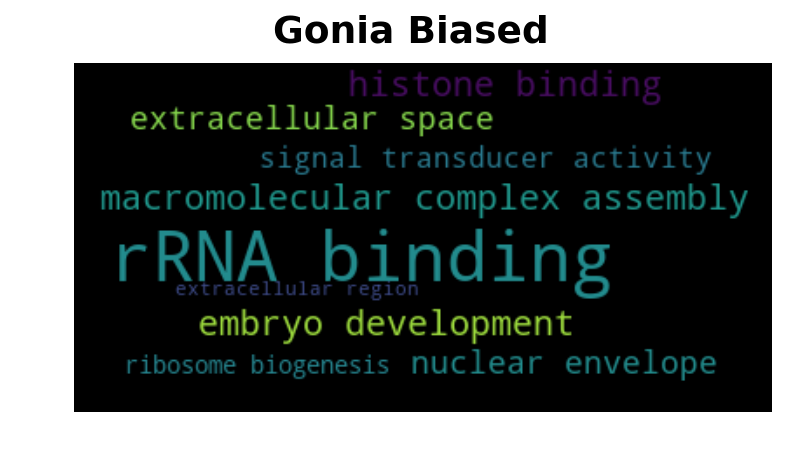

In [54]:
results = [res for res in goObj.run_study(late_gonia) if res.p_fdr_bh < 0.001]

freqs = {}
for r in results:
    if r.name in ['biological_process', 'cellular_component', 'molecular_function']:
        continue

    if r.study_count > 20:
        continue 

    freqs[r.name] = r.study_count
    print(r.GO, r.name, r.study_count)

wc = WordCloud(max_font_size=40).generate_from_frequencies(freqs)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off");
plt.suptitle('Gonia Biased', y=0.75)

Calculating uncorrected p-values using fisher_scipy_stats
   888 out of  1,123 study items found in association
Running multitest correction: statsmodels fdr_bh
  122 GO terms are associated with 888 of 1,123 study items
  143 GO terms are associated with 10,991 of 14,182 population items
GO:0002376 immune system process 2
GO:0030154 cell differentiation 2
GO:0016192 vesicle-mediated transport 18
GO:0050877 nervous system process 15
GO:0040007 growth 2
GO:0006629 lipid metabolic process 10
GO:0007155 cell adhesion 1
GO:0006810 transport 14
GO:0006259 DNA metabolic process 6
GO:0048870 cell motility 7
GO:0005886 plasma membrane 7
GO:0005576 extracellular region 8
GO:0005694 chromosome 1
GO:0003677 DNA binding 6
GO:0004871 signal transducer activity 0
GO:0003700 DNA binding transcription factor activity 3


Text(0.5,0.75,'Late Cytes Biased')

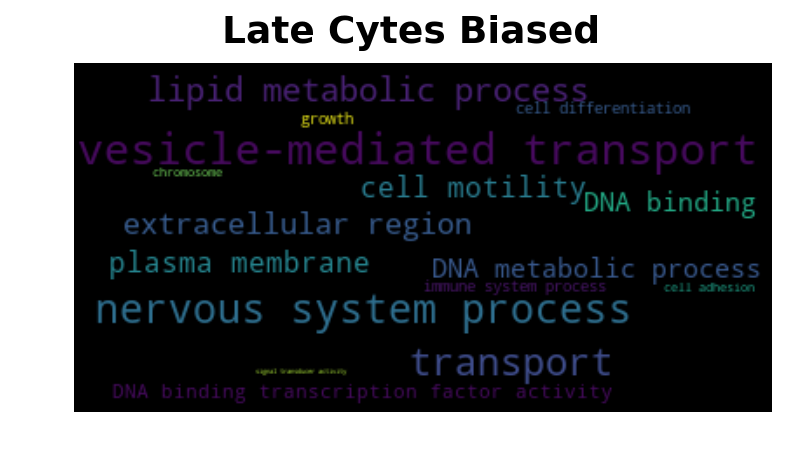

In [55]:
results = [res for res in goObj.run_study(late_cytes) if res.p_fdr_bh < 0.001]

freqs = {}
for r in results:
    if r.name in ['biological_process', 'cellular_component', 'molecular_function']:
        continue

    if r.study_count > 20:
        continue 

    freqs[r.name] = r.study_count
    print(r.GO, r.name, r.study_count)

wc = WordCloud(max_font_size=40).generate_from_frequencies(freqs)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off");
plt.suptitle('Late Cytes Biased', y=0.75)